In [1]:
import pandas as pd

df = pd.read_csv('/content/voting-survey_response.csv')

# Display the first few rows of the dataframe
df.head()

RespId  weight  age            Education   race  gender     income_cat  \
0  470001  0.7516   73              College  White  Female       $75-125k   
1  470002  1.0267   90              College  White  Female  $125k or more   
2  470003  1.0844   53              College  White    Male  $125k or more   
3  470007  0.6817   58         Some college  Black  Female        $40-75k   
4  480008  0.9910   81  High school or less  White    Male        $40-75k   

  voter_category  Q1  Q2_1  ...  Q29_1  Q29_2  Q29_3  Q29_4  Q29_5  Q29_6  \
0         always   1     1  ...    NaN    NaN    NaN    NaN    NaN    NaN   
1         always   1     1  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2       sporadic   1     1  ...    NaN    NaN    NaN    NaN    NaN    NaN   
3       sporadic   1     1  ...    NaN    NaN    NaN    NaN    NaN    NaN   
4         always   1     1  ...    NaN    NaN    NaN    NaN    NaN    NaN   

   Q29_7  Q29_8  Q29_9  Q29_10  
0    NaN    NaN    NaN     NaN  
1    NaN    NaN    NaN     NaN  
2    NaN    NaN    NaN     NaN  
3    NaN    NaN    NaN     NaN  
4    NaN    NaN    NaN     NaN  

[5 rows x 115 columns]

The dataset contains the following columns:

RespId: Respondent ID

weight: Weight assigned to each respondent

age: Age of the respondent

Education: Educational level of the respondent

race: Race of the respondent

gender: Gender of the respondent

income_cat: Income category of the respondent

voter_category: Voting frequency category of the respondent

Q1: Membership in the worker community

Q2_1 to Q29_10: Responses to the various survey questions

Task #1 - creating Bins for the age column

In [2]:
# Define bins and labels
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Bin the age values
df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df['age_binned'] = df['age_binned'].astype('object')
df

RespId  weight  age            Education         race  gender  \
0     470001  0.7516   73              College        White  Female   
1     470002  1.0267   90              College        White  Female   
2     470003  1.0844   53              College        White    Male   
3     470007  0.6817   58         Some college        Black  Female   
4     480008  0.9910   81  High school or less        White    Male   
...      ...     ...  ...                  ...          ...     ...   
5831  477662  1.1916   27         Some college     Hispanic    Male   
5832  477663  1.4623   59  High school or less        White  Female   
5833  488322  0.9252   51              College  Other/Mixed    Male   
5834  488325  2.6311   22  High school or less        Black  Female   
5835  477666  1.6218   22  High school or less        Black  Female   

          income_cat voter_category  Q1  Q2_1  ...  Q29_2  Q29_3  Q29_4  \
0           $75-125k         always   1     1  ...    NaN    NaN    NaN   
1      $125k or more         always   1     1  ...    NaN    NaN    NaN   
2      $125k or more       sporadic   1     1  ...    NaN    NaN    NaN   
3            $40-75k       sporadic   1     1  ...    NaN    NaN    NaN   
4            $40-75k         always   1     1  ...    NaN    NaN    NaN   
...              ...            ...  ..   ...  ...    ...    ...    ...   
5831         $40-75k         always   1     1  ...    NaN    NaN    NaN   
5832   $125k or more   rarely/never   1     1  ...    NaN    NaN    NaN   
5833   $125k or more       sporadic   1     1  ...    NaN    NaN    NaN   
5834  Less than $40k         always   1     2  ...    NaN    NaN    NaN   
5835  Less than $40k         always   1     1  ...    NaN    NaN    NaN   

      Q29_5  Q29_6  Q29_7  Q29_8  Q29_9  Q29_10  age_binned  
0       NaN    NaN    NaN    NaN    NaN     NaN       71-80  
1       NaN    NaN    NaN    NaN    NaN     NaN      91-100  
2       NaN    NaN    NaN    NaN    NaN     NaN       51-60  
3       NaN    NaN    NaN    NaN    NaN     NaN       51-60  
4       NaN    NaN    NaN    NaN    NaN     NaN       81-90  
...     ...    ...    ...    ...    ...     ...         ...  
5831    NaN    NaN    NaN    NaN    NaN     NaN       19-30  
5832    NaN    NaN    NaN    NaN    NaN     NaN       51-60  
5833    NaN    NaN    NaN    NaN    NaN     NaN       51-60  
5834    NaN    NaN    NaN    NaN    NaN     NaN       19-30  
5835    NaN    NaN    NaN    NaN    NaN     NaN       19-30  

[5836 rows x 116 columns]

Q24. Most eligible members don’t vote in every union elections. In general, which of the following categories do you think best describes you?(voter category)

(1) I always, or almost always, vote in union elections

(2) I sometimes vote in union elections

(3) I rarely vote in union elections

(4) I don’t vote


In [3]:
df.shape

(5836, 116)

Task #2 - Finding %age of missing values

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100

# Create a DataFrame to display columns with missing values and their percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data


Missing Values  Percentage
Q20               5350   91.672378
Q26_1              534    9.150103
Q26_2              534    9.150103
Q26_3              534    9.150103
Q26_4              534    9.150103
Q26_5              534    9.150103
Q26_6              534    9.150103
Q26_7              534    9.150103
Q26_8              534    9.150103
Q29_1             4494   77.004798
Q29_2             4494   77.004798
Q29_3             4494   77.004798
Q29_4             4494   77.004798
Q29_5             4494   77.004798
Q29_6             4494   77.004798
Q29_7             4494   77.004798
Q29_8             4494   77.004798
Q29_9             4494   77.004798
Q29_10            4494   77.004798

In [5]:
# Remove specified columns
columns_to_remove = ['Q20'] + [f'Q29_{i}' for i in range(1, 11)]
df_cleaned = df.drop(columns=columns_to_remove)

# Verify that the columns have been removed
df_cleaned.columns


Index(['RespId', 'weight', 'age', 'Education', 'race', 'gender', 'income_cat',
       'voter_category', 'Q1', 'Q2_1',
       ...
       'Q25_6', 'Q26_1', 'Q26_2', 'Q26_3', 'Q26_4', 'Q26_5', 'Q26_6', 'Q26_7',
       'Q26_8', 'age_binned'],
      dtype='object', length=105)

In [6]:
columns_to_impute = [
    'Q26_1', 'Q26_2', 'Q26_3', 'Q26_4', 'Q26_5', 'Q26_6',
    'Q26_7', 'Q26_8'
]
# Impute missing values with 0
df_cleaned[columns_to_impute] = df_cleaned[columns_to_impute].fillna(0)

The dataset contains several columns with missing values. Notably:

Q20 has 5,350 missing values.

Q26_1 to Q26_8 each have 534 missing values.

Q29_1 to Q29_10 each have 4,494 missing values.

Now, I'll check for any outliers or inconsistencies in the dataset. This will involve a statistical summary of the numeric columns and a categorical summary of the categorical columns.

In [7]:
# Statistical summary of numeric columns
numeric_summary = df_cleaned.describe()

# Categorical summary of categorical columns
categorical_summary = df_cleaned.describe(include=['object'])
# Calculate the percentage row
percentage_row = (categorical_summary.loc['freq'] / len(df_cleaned)) * 100

# Add the percentage row to the summary
categorical_summary.loc['percentage'] = percentage_row


numeric_summary.loc[:,["Q2_1","Q2_2","Q2_3","Q2_4","Q2_5","Q2_6","Q2_7","Q2_8","Q2_9","Q2_10"]]

Q2_1         Q2_2         Q2_3         Q2_4         Q2_5  \
count  5836.000000  5836.000000  5836.000000  5836.000000  5836.000000   
mean      1.246402     1.705106     1.638280     2.175977     1.277245   
std       0.660253     0.866346     0.765741     1.091391     0.626386   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       1.000000     2.000000     2.000000     2.000000     1.000000   
75%       1.000000     2.000000     2.000000     3.000000     1.000000   
max       4.000000     4.000000     4.000000     4.000000     4.000000   

              Q2_6         Q2_7         Q2_8         Q2_9        Q2_10  
count  5836.000000  5836.000000  5836.000000  5836.000000  5836.000000  
mean      1.805517     1.491604     1.464016     2.093557     2.019363  
std       1.011524     0.808120     0.674857     1.245036     0.946632  
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000  
25%       1.000000     1.000000     1.000000     1.000000     1.000000  
50%       1.000000     1.000000     1.000000     2.000000     2.000000  
75%       2.000000     2.000000     2.000000     3.000000     3.000000  
max       4.000000     4.000000     4.000000     4.000000     4.000000

In [8]:
categorical_summary


Education       race     gender income_cat voter_category  \
count            5836       5836       5836       5836           5836   
unique              3          4          2          4              3   
top           College      White       Male   $75-125k       sporadic   
freq             2330       3710       2940       1628           2574   
percentage  39.924606  63.570939  50.376971  27.895819      44.105552   

           age_binned  
count            5836  
unique              8  
top             61-70  
freq             1233  
percentage  21.127485

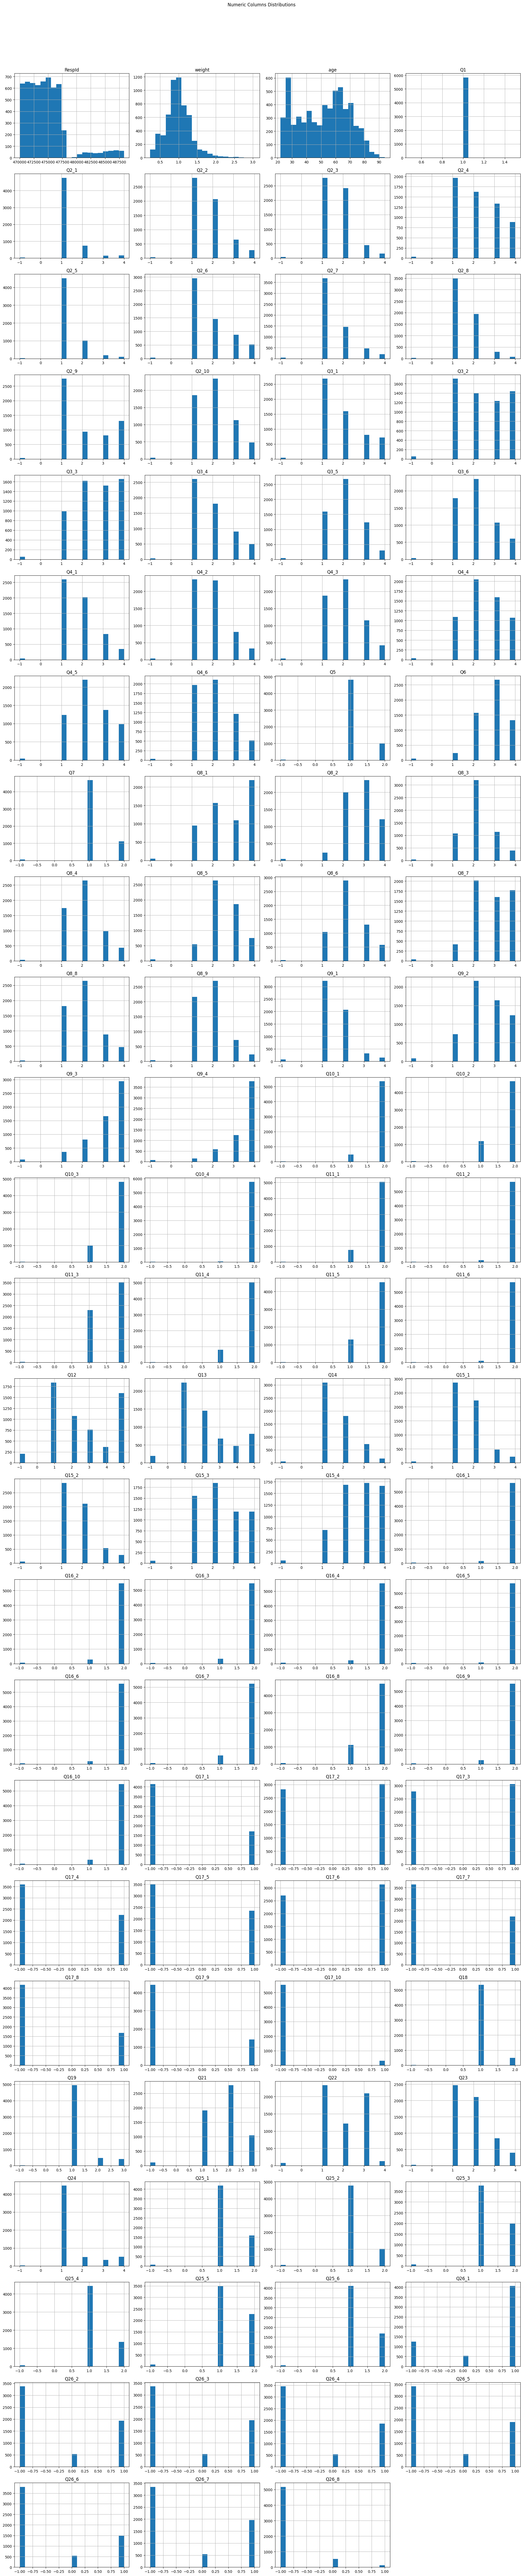

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Visualize the distribution of numeric columns to identify outliers
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Calculate the layout dynamically
n_cols = 4  # Number of columns in the plot
n_rows = math.ceil(len(numeric_columns) / n_cols)  # Calculate the required number of rows

# Create the histogram plots
df_cleaned[numeric_columns].hist(bins=20, figsize=(n_cols * 5, n_rows * 4), layout=(n_rows, n_cols))
plt.suptitle('Numeric Columns Distributions')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.show()


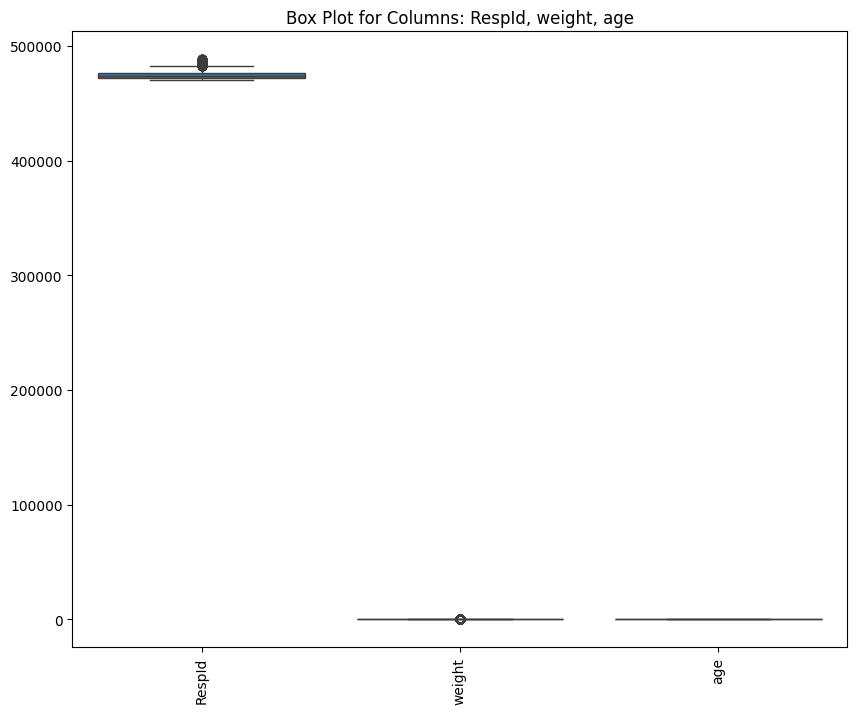

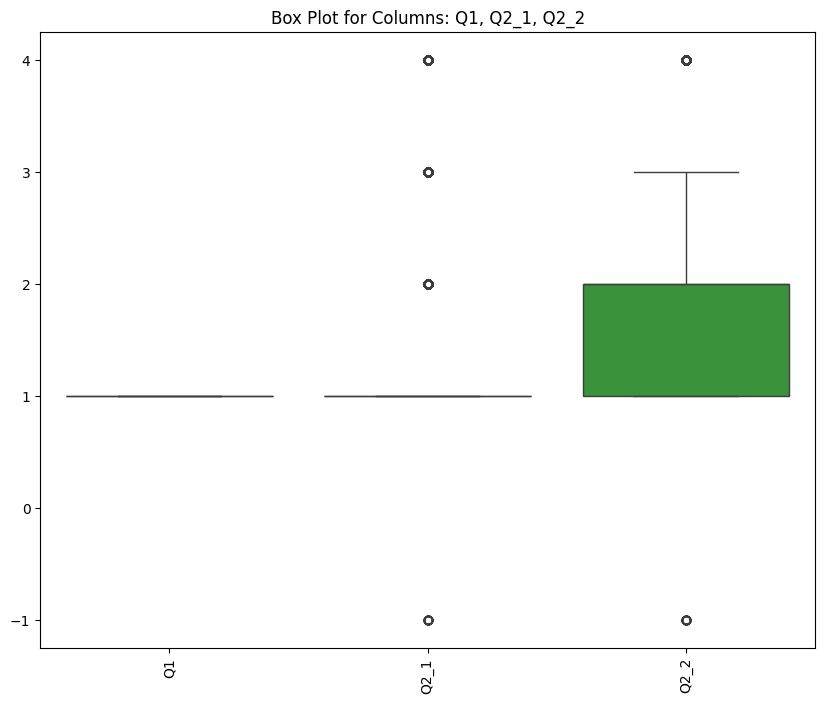

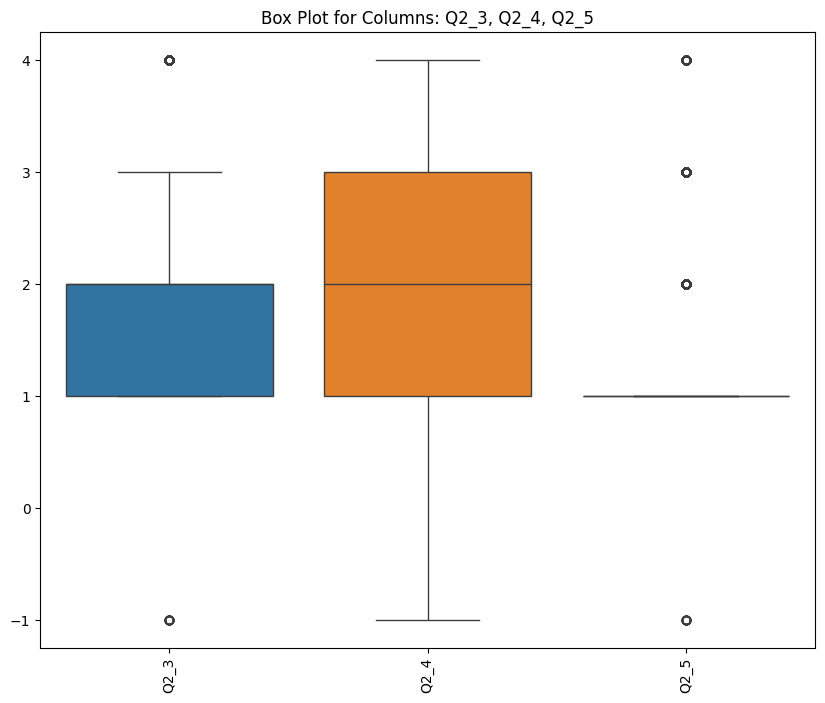

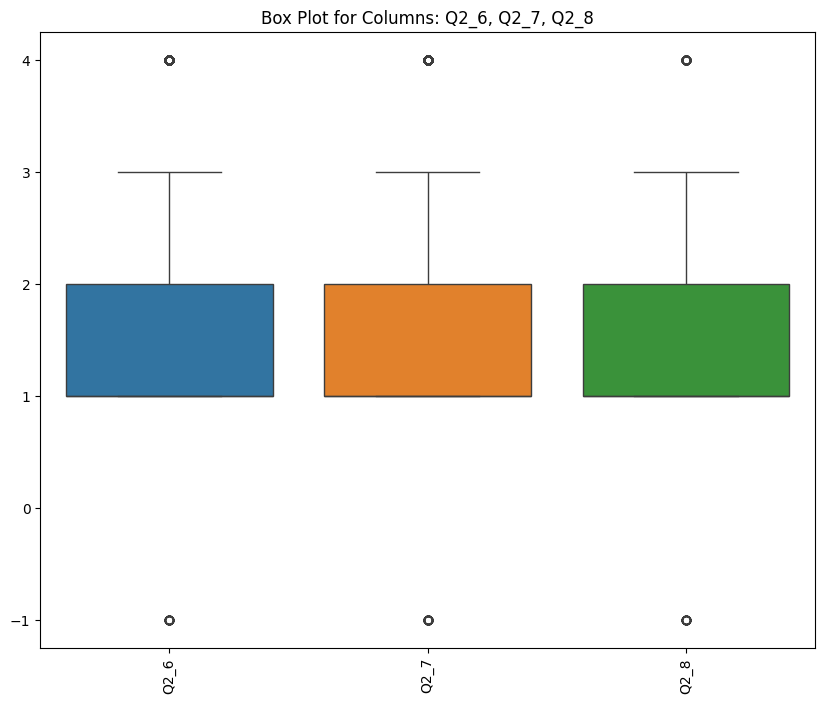

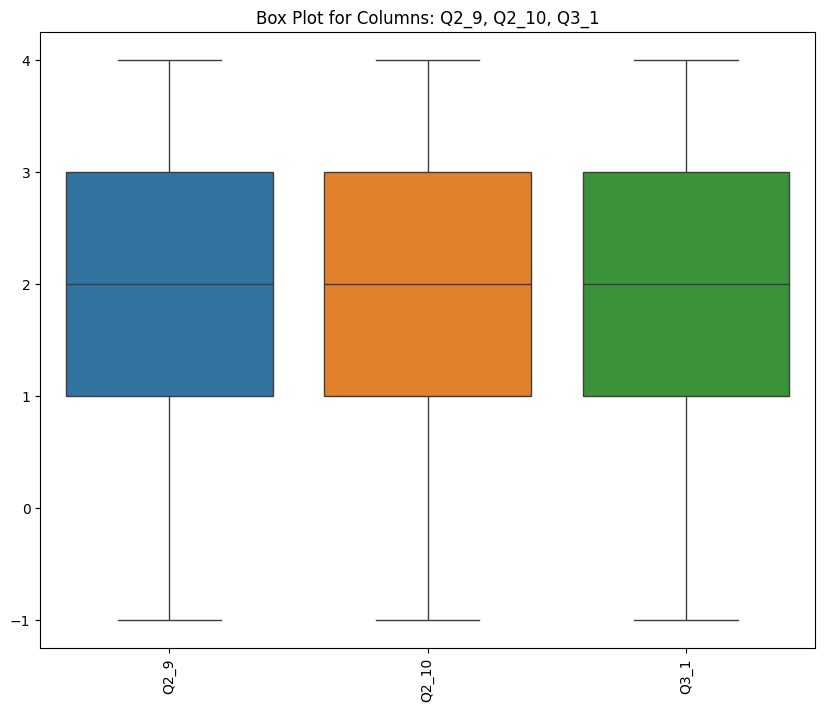

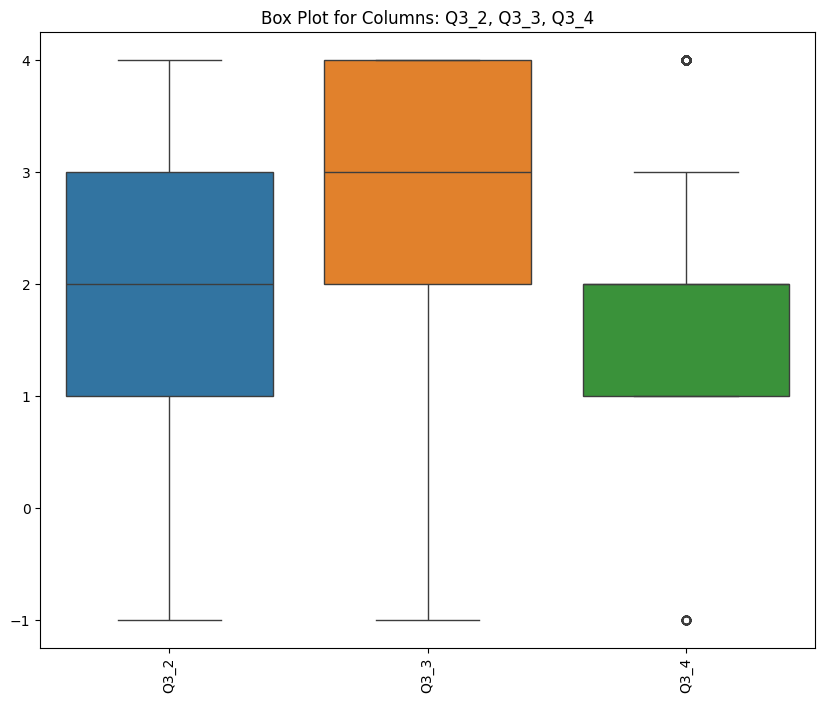

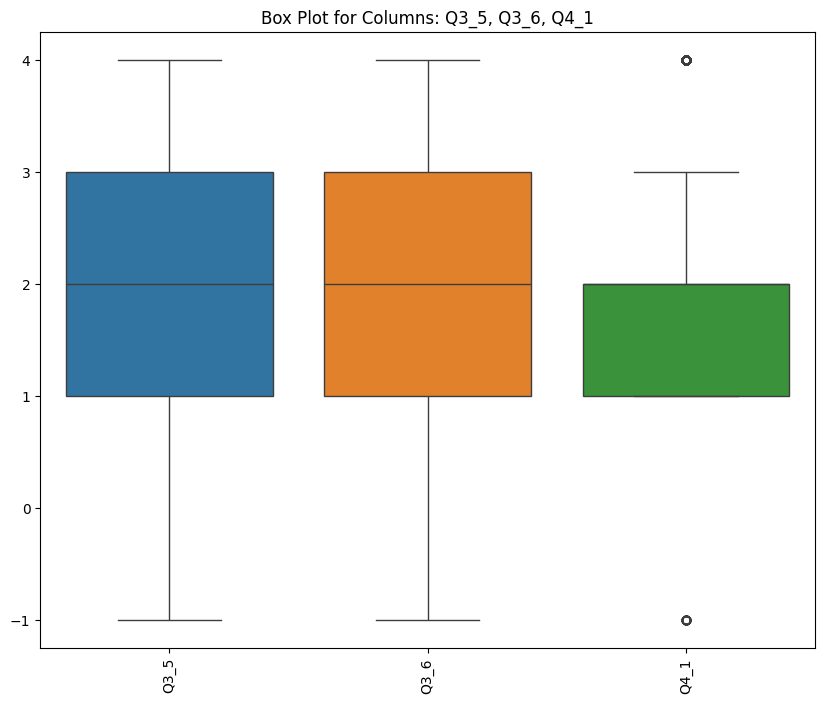

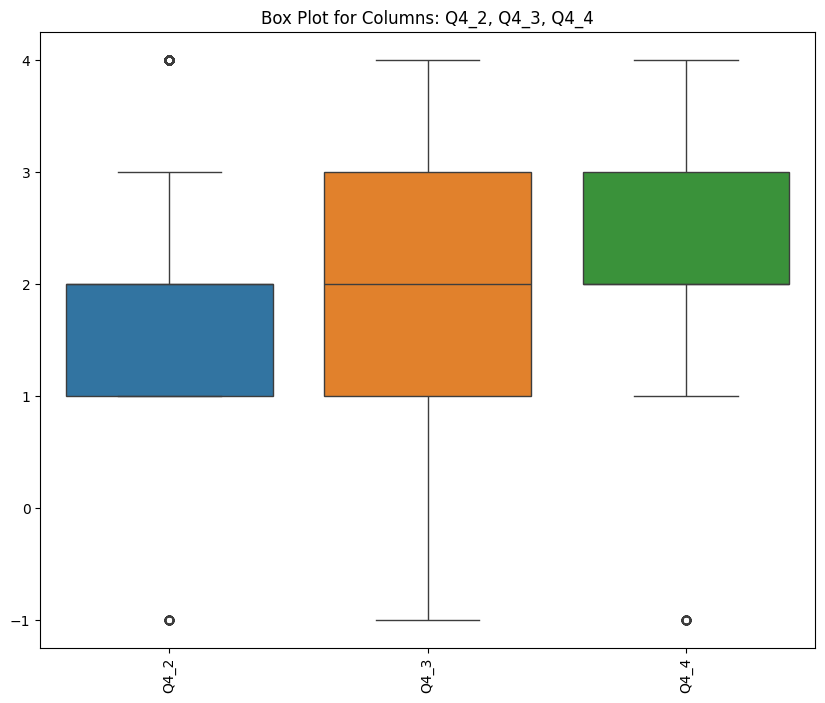

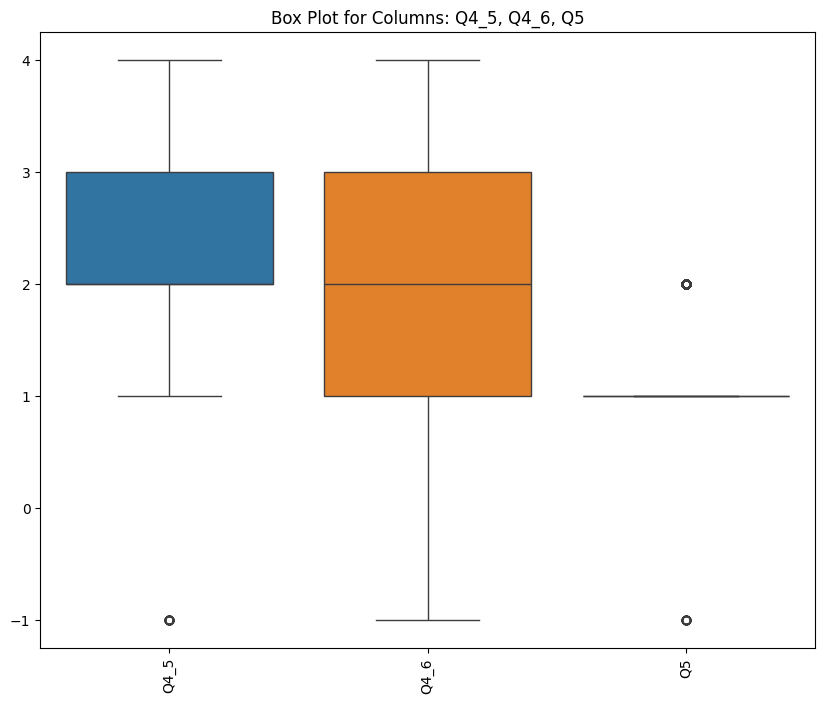

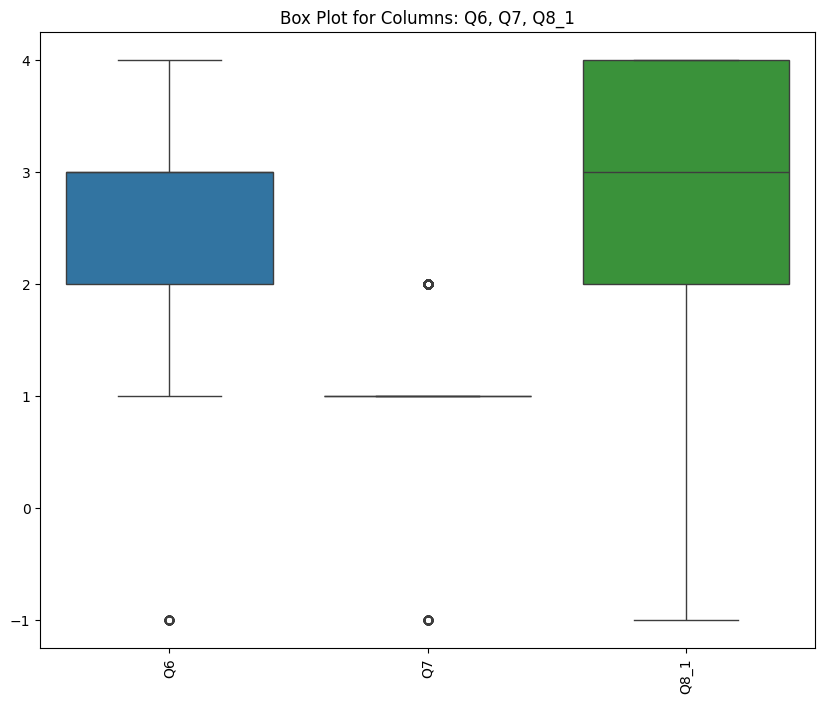

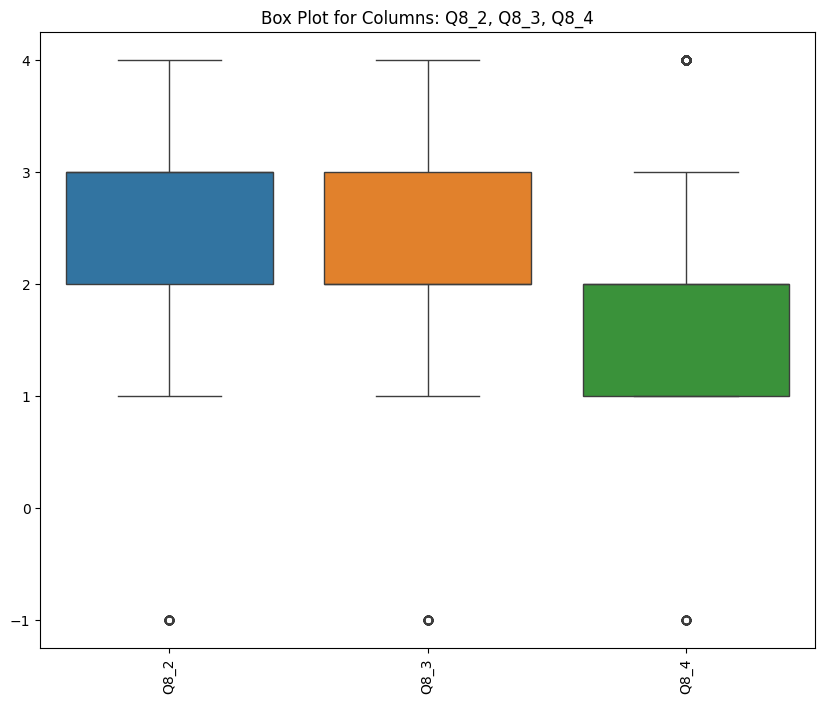

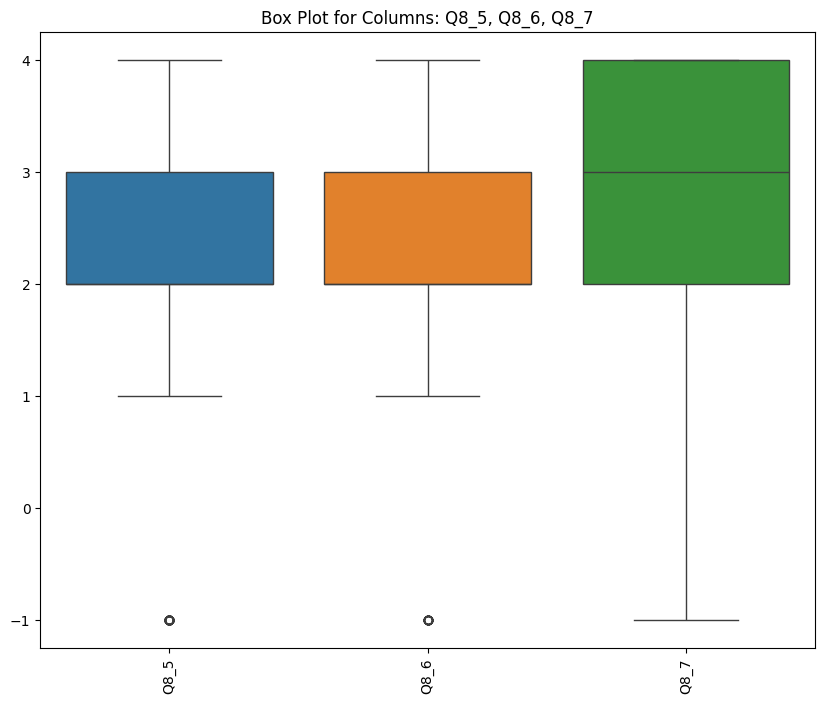

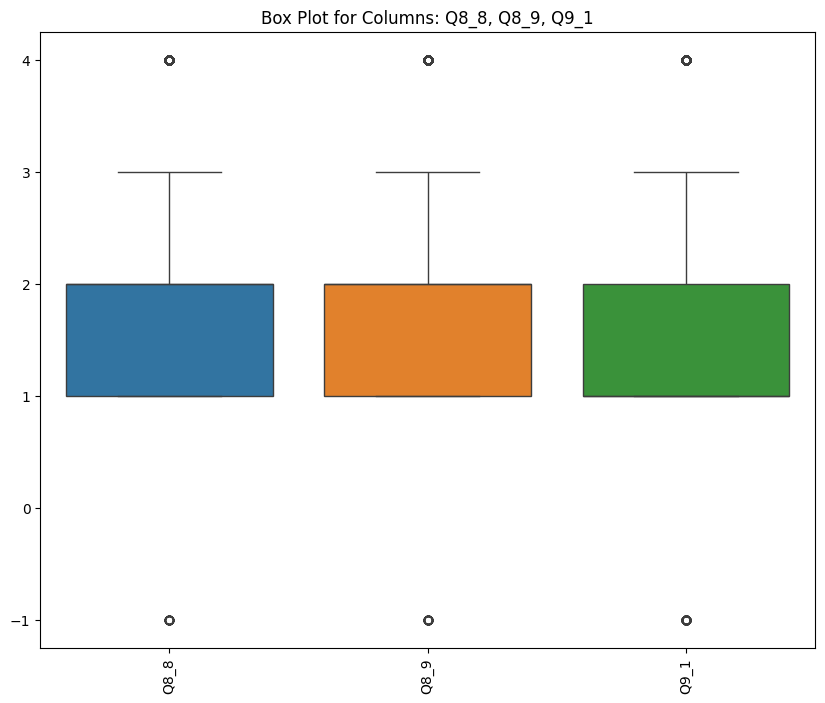

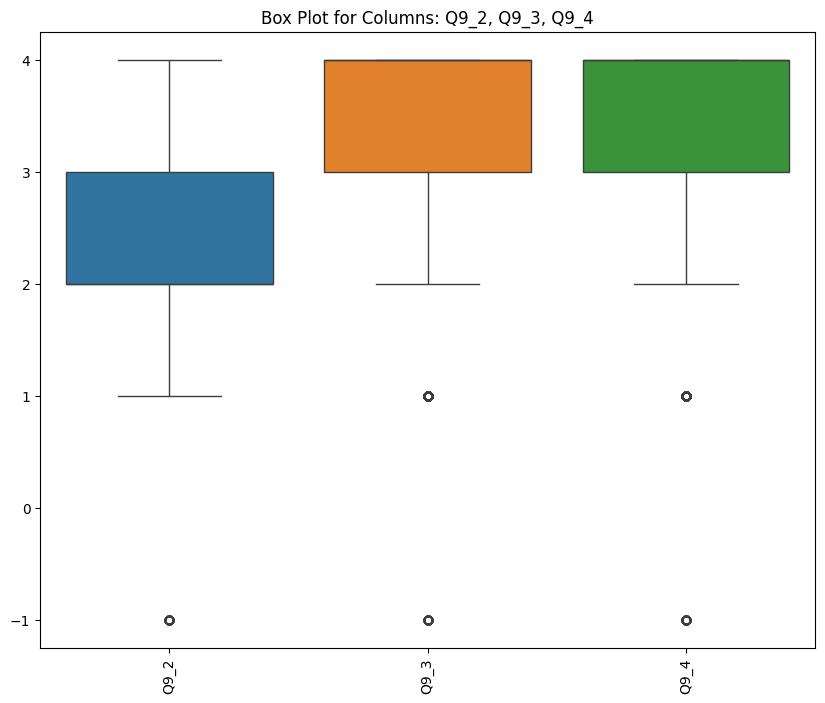

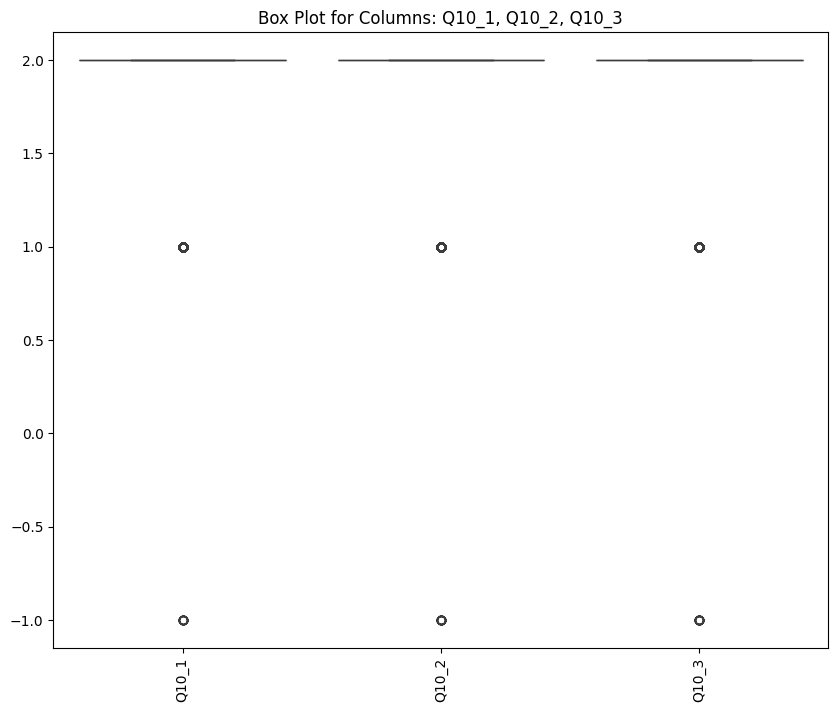

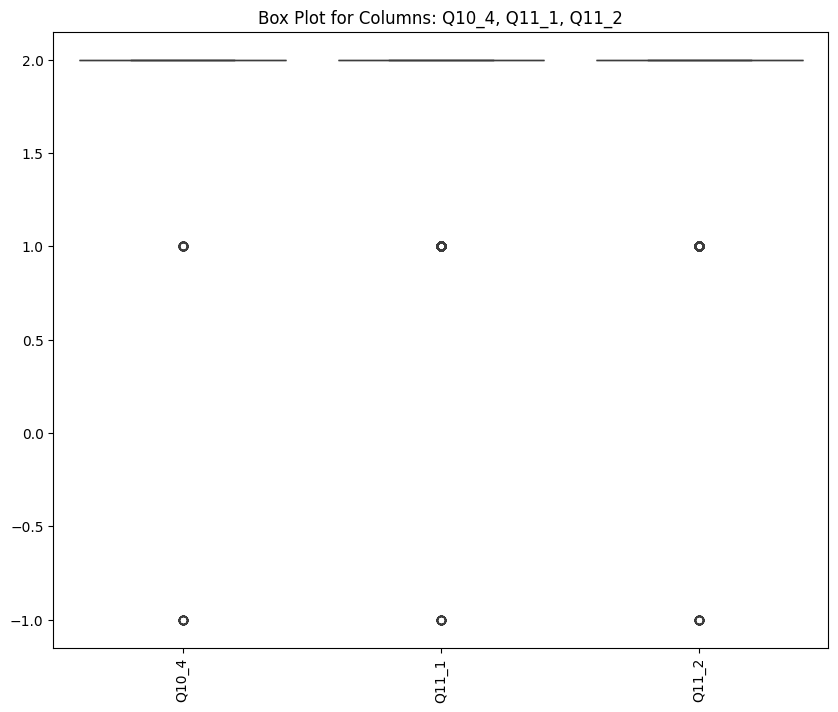

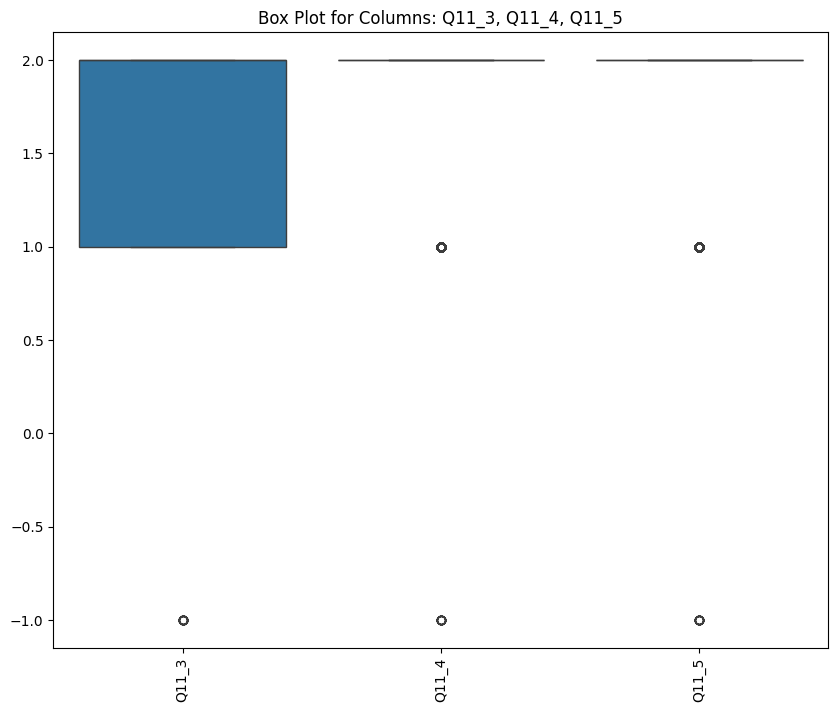

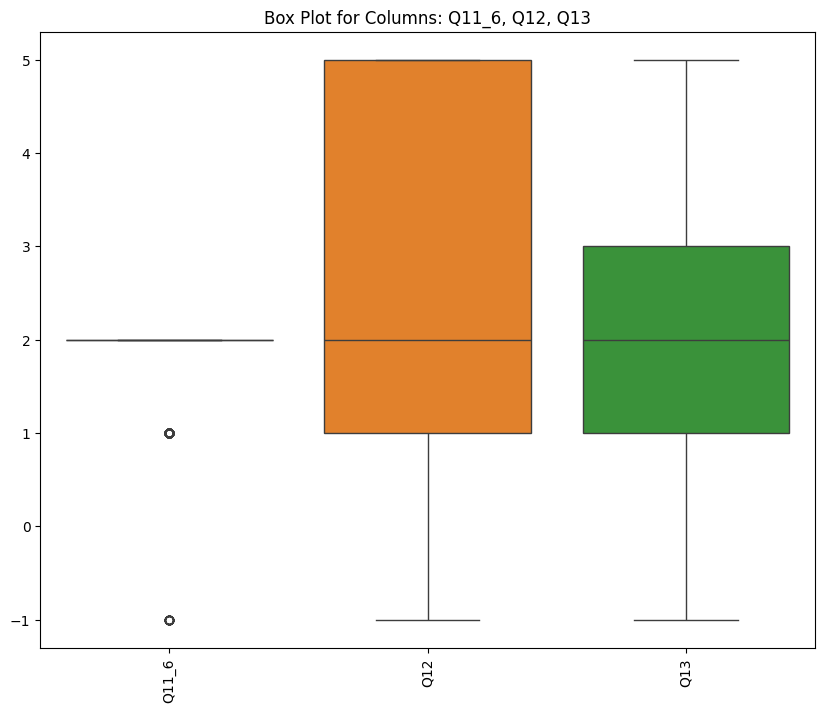

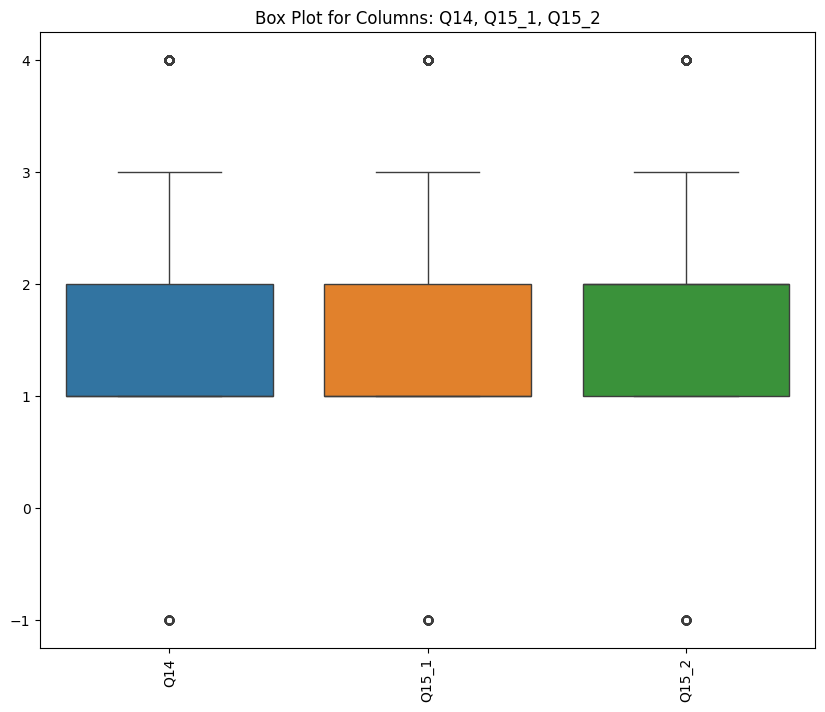

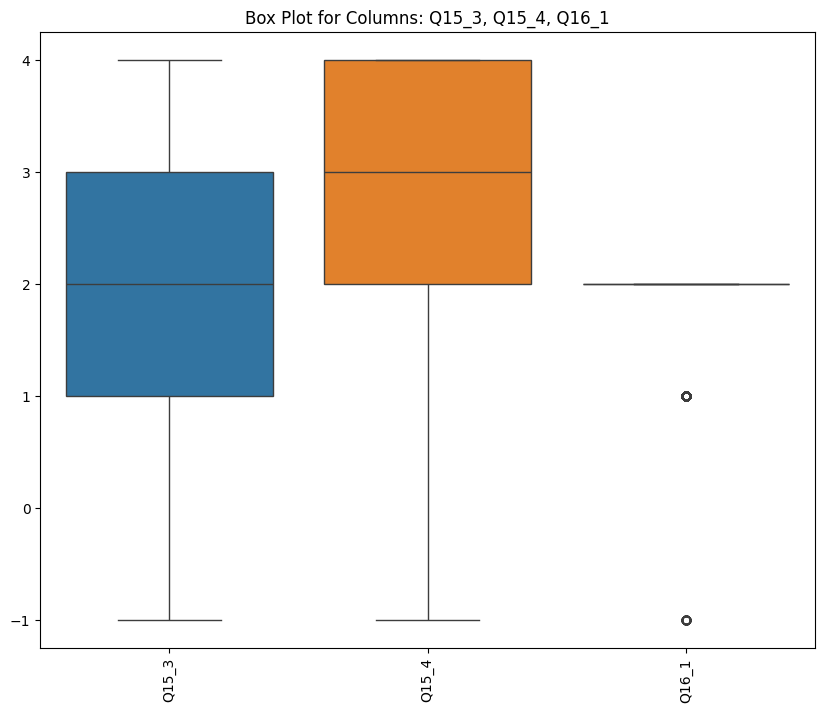

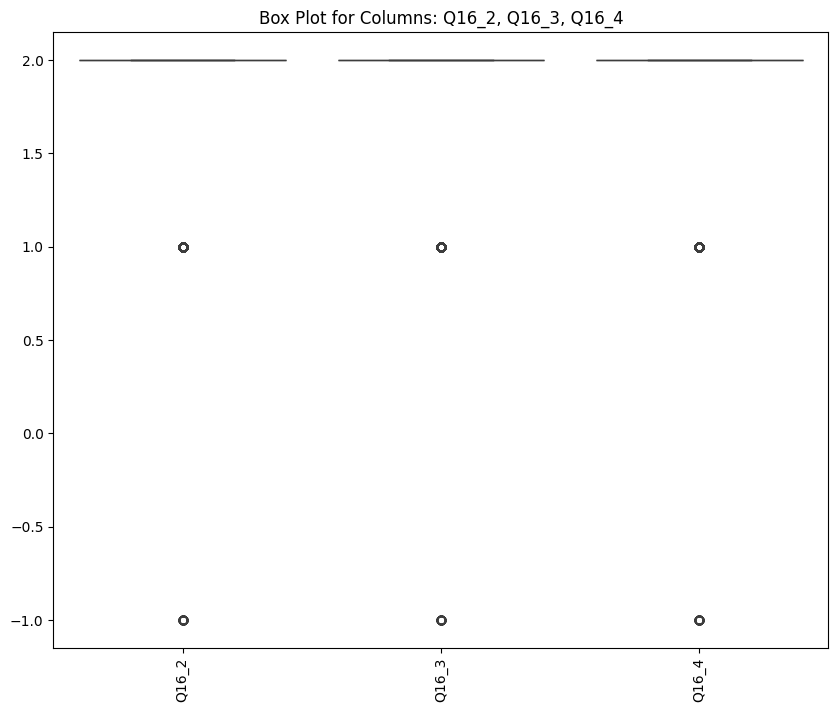

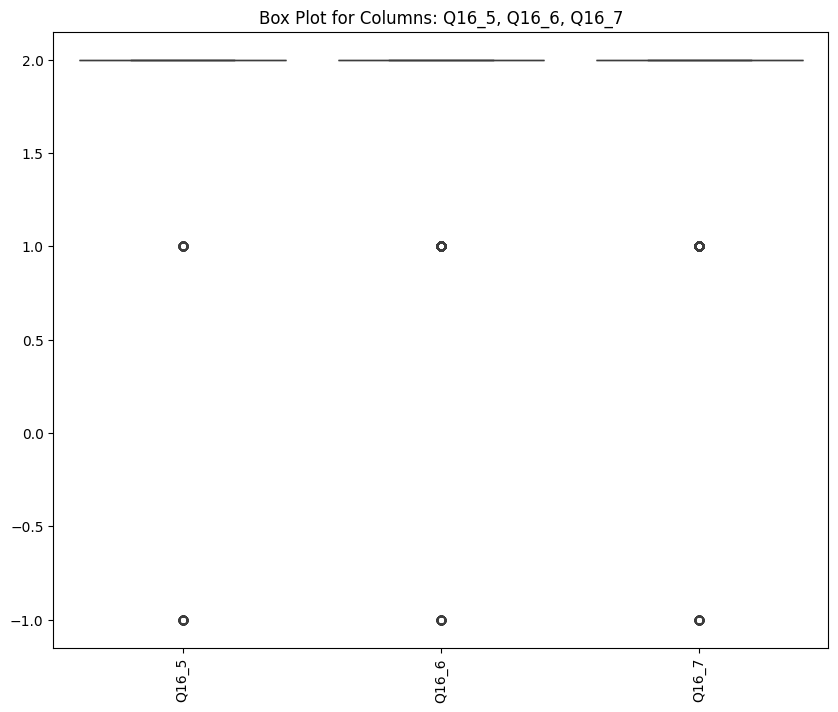

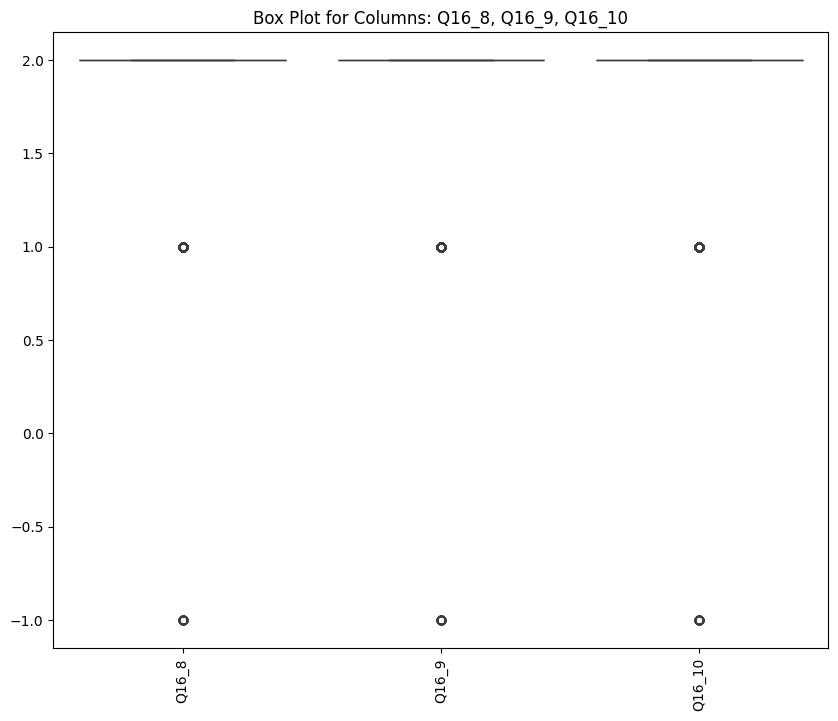

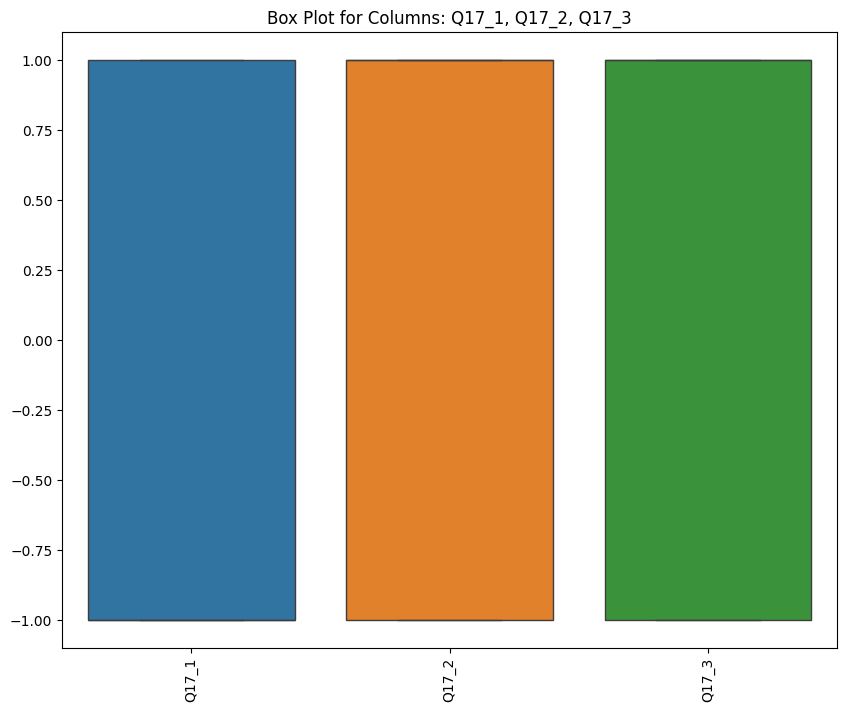

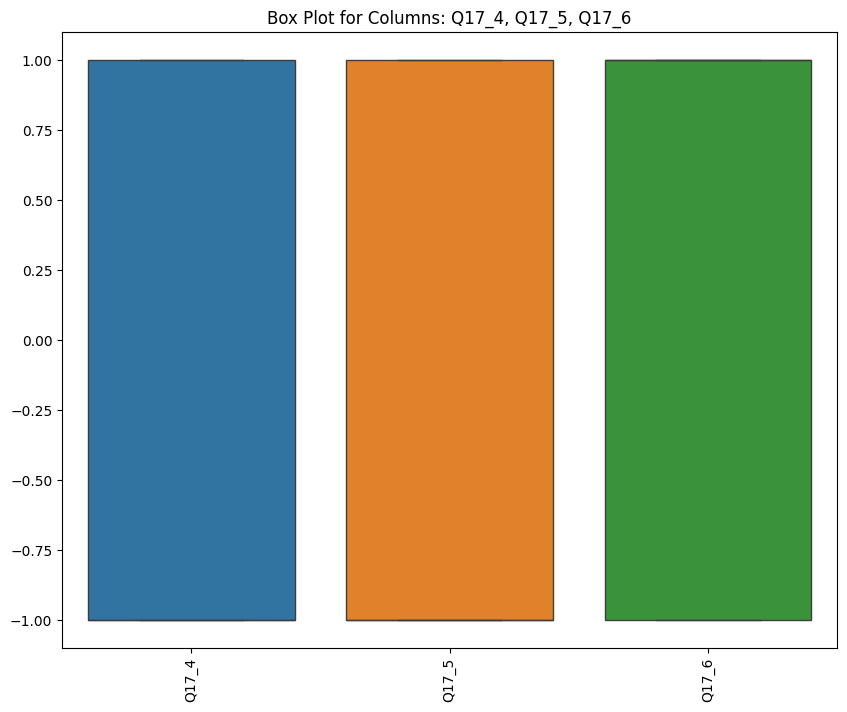

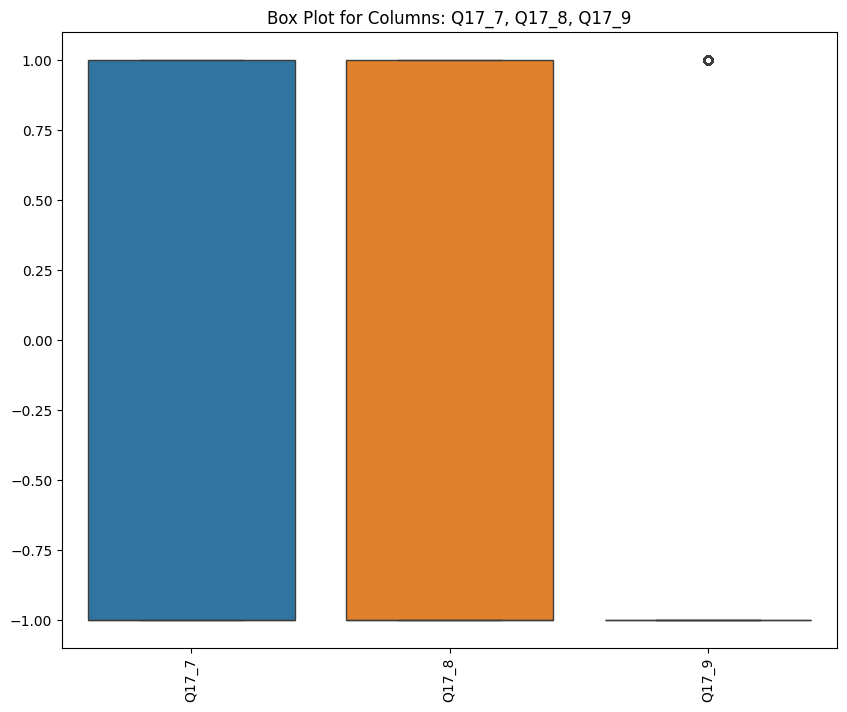

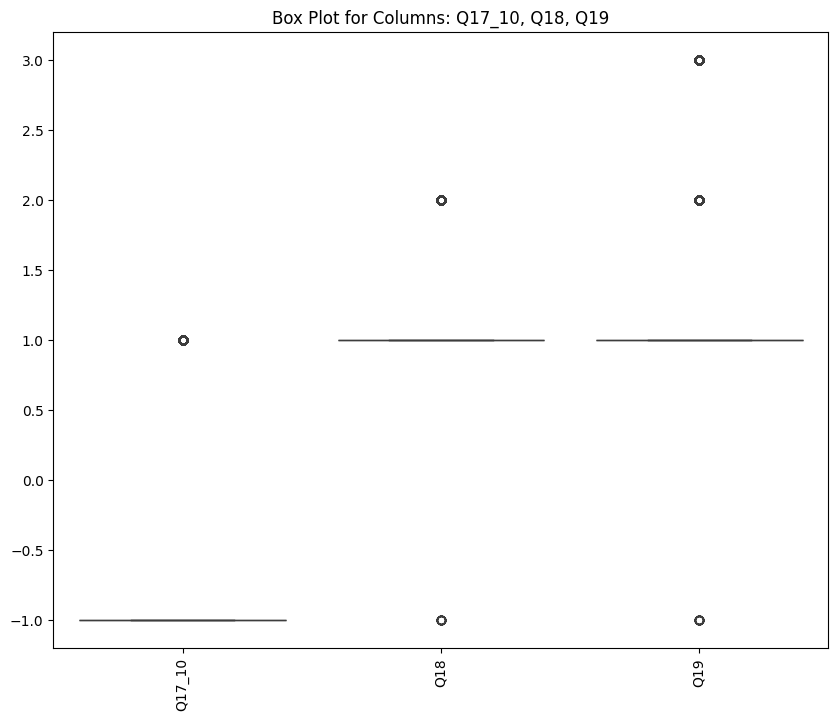

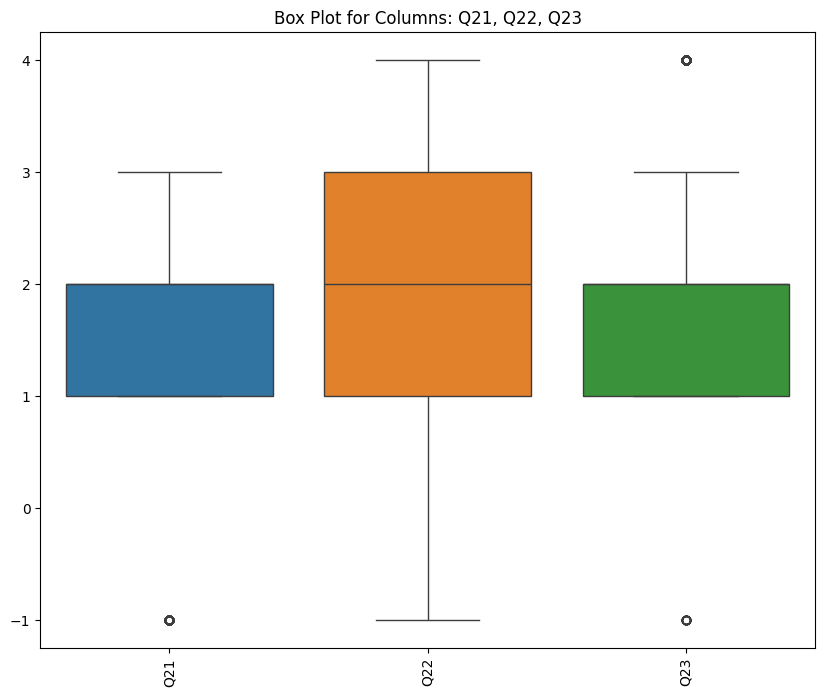

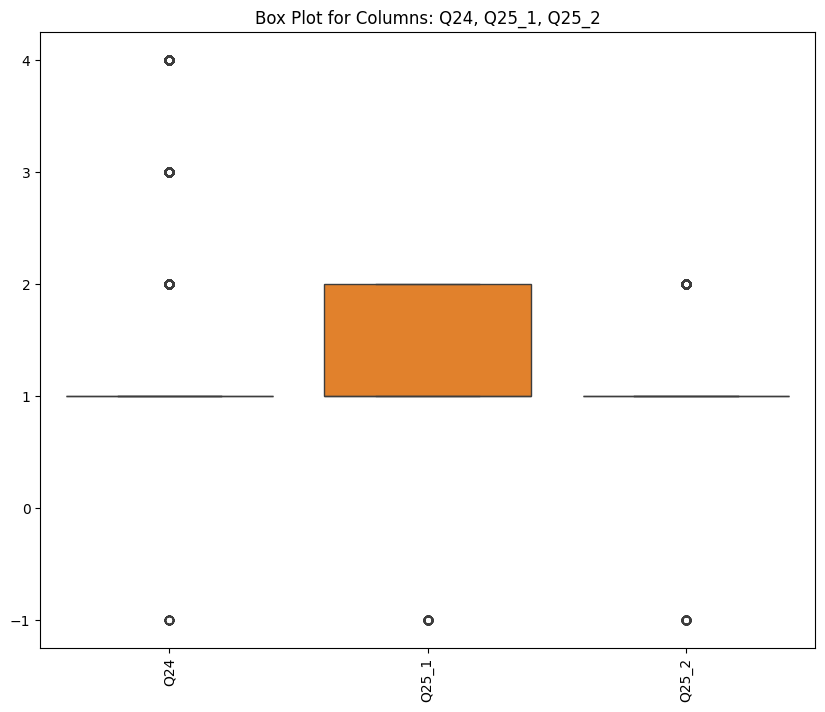

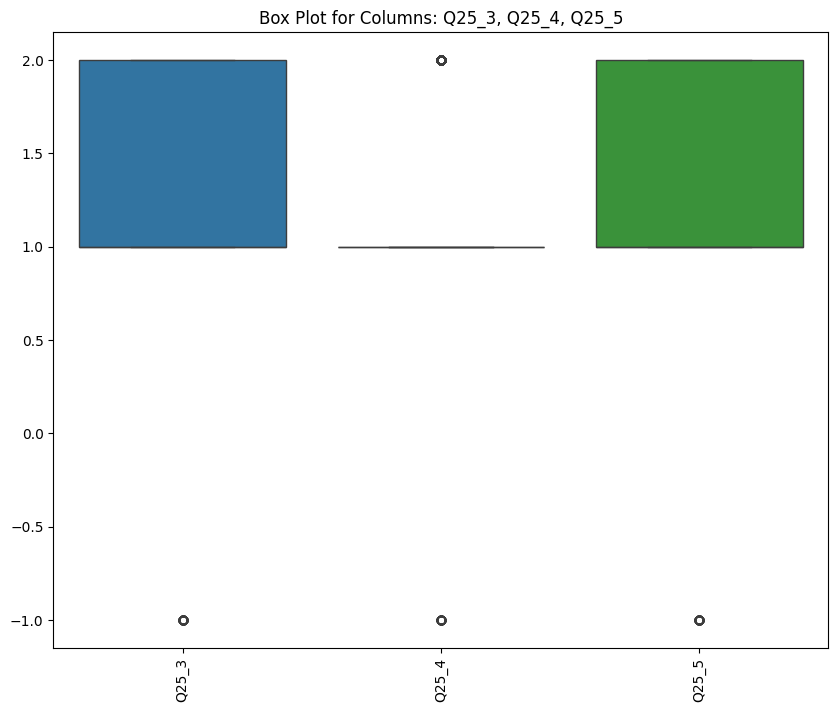

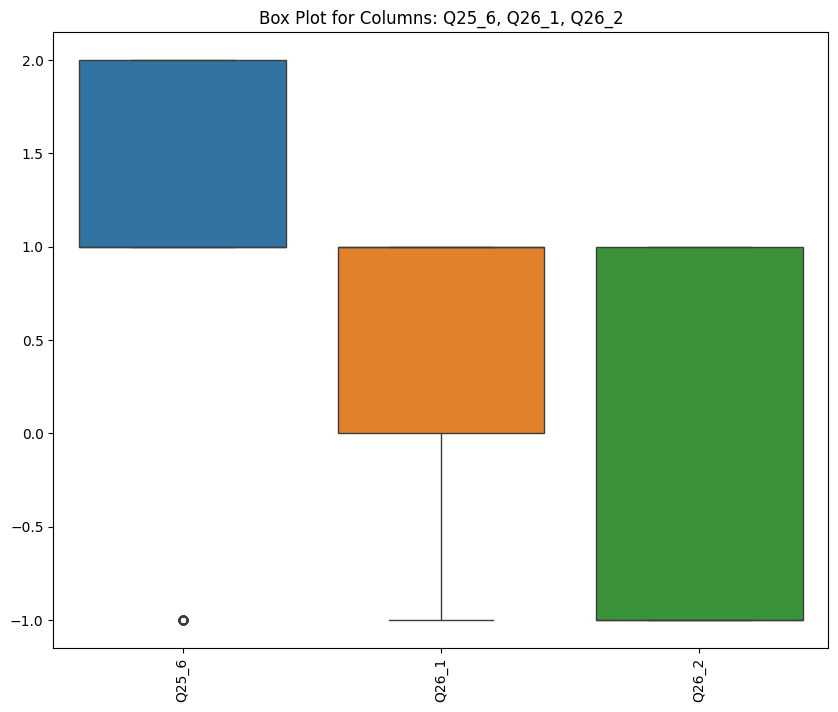

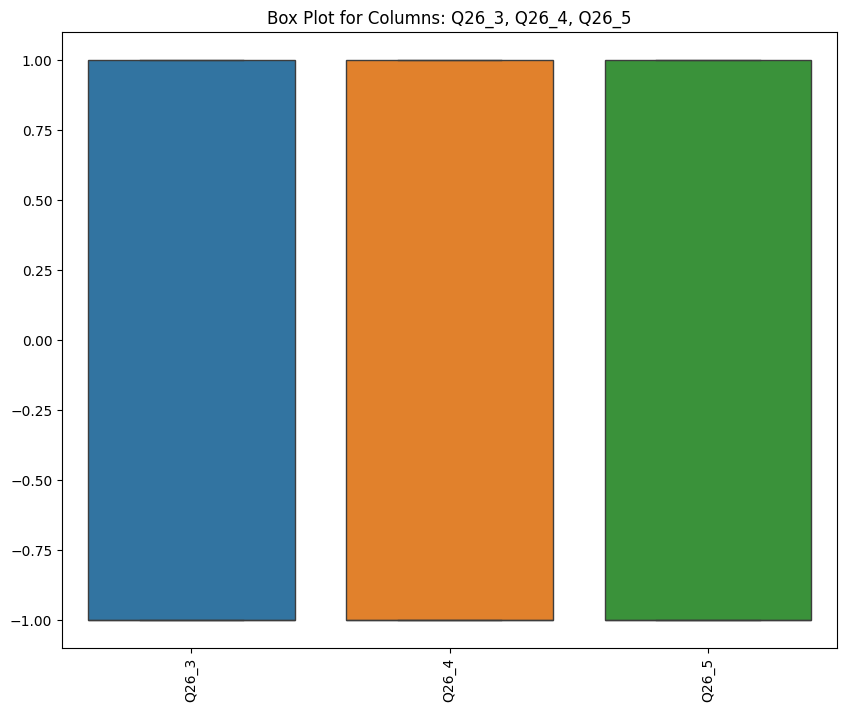

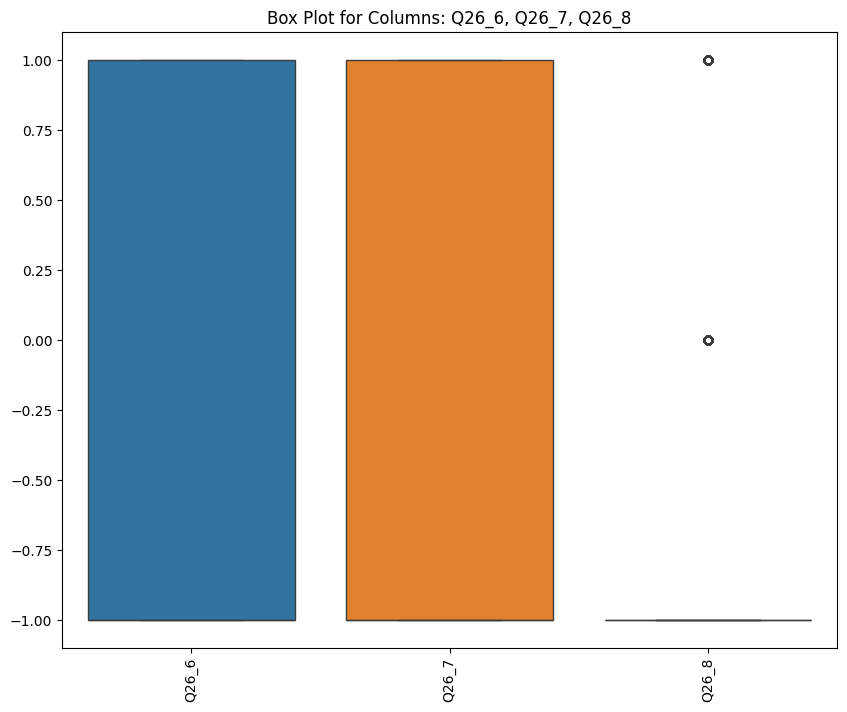

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of columns per plot
columns_per_plot = 3

# Split the numeric columns into chunks of at most 5 columns
chunks = [numeric_columns[i:i + columns_per_plot] for i in range(0, len(numeric_columns), columns_per_plot)]

# Create box plots for each chunk
for chunk in chunks:
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=df_cleaned[chunk])
    plt.xticks(rotation=90)
    plt.title(f'Box Plot for Columns: {", ".join(chunk)}')
    plt.show()


From the above charts
Brief Analysis :- https://docs.google.com/document/d/1eucsWB_PdJ1vplMvpaSWZq5rBRP3qOE6TwvK44yRRLA/edit?usp=sharing

In [11]:
# investigating the question 25
# List comprehension to create the list of column names
column_names = [f'Q25_{i}' for i in range(1, 7)]

# Use the list of column names to access the unique values in those columns
unique_values = df_cleaned[column_names].apply(lambda col: col.unique())
unique_values


Q25_1  Q25_2  Q25_3  Q25_4  Q25_5  Q25_6
0      1      1      1      1      1      1
1      2      2      2      2      2      2
2     -1     -1     -1     -1     -1     -1

We'll assume

1: The respondent voted in that particular election.

2: The respondent did not vote in that particular election.

-1: The respondent does not remember or preferred not to answer regarding that particular election.

In [12]:
import plotly.express as px

# Create a dictionary mapping numeric values to text descriptions
voter_turnout_mapping = {
    1: "I always, or almost always, vote in union elections",
    2: "I sometimes vote in union elections",
    3: "I rarely vote in union elections",
    4: "I don’t vote",
    -1 : "No comments"
}

# Replace the numeric values in the Q24 column with the corresponding text descriptions
df_cleaned['Q24'] = df_cleaned['Q24'].map(voter_turnout_mapping)

# Example visualization: Relationship between voter turnout and gender
fig = px.histogram(df_cleaned, x='Q24', color='gender', barmode='group',
                   title='Voter Turnout by Gender',
                   labels={'Q24': 'Voter Turnout', 'gender': 'Gender'})
fig.show()
# Voter Turnout and Gender

In [13]:
import plotly.express as px

# Example visualization: Relationship between voter turnout and gender
fig = px.histogram(df_cleaned, x='Q24', color='Education', barmode='group',
                   title='Voter Turnout by Education',
                   labels={'Q24': 'Voter Turnout', 'Education': 'Education'})
fig.show()
# Voter turnout and Education

In [14]:
import plotly.express as px

# Example visualization: Relationship between voter turnout and gender
fig = px.histogram(df_cleaned, x='Q24', color='race', barmode='group',
                   title='Voter Turnout by race',
                   labels={'Q24': 'Voter Turnout', 'race': 'race'})
fig.show()
# Voter turnout and Race

In [15]:
import plotly.express as px

# Example visualization: Relationship between voter turnout and gender
fig = px.histogram(df_cleaned, x='Q24', color='age_binned', barmode='group',
                   title='Voter Turnout by age',
                   labels={'Q24': 'Voter Turnout', 'age_binned': 'age_binned'})
fig.show()
# Voter Turnout and Age

In [16]:
gender_turnout = df.groupby('Education')['Q24']
gender_turnout.value_counts()

Education            Q24
College               1     2050
                      2      143
                      3       76
                      4       57
                     -1        4
High school or less   1     1095
                      4      325
                      2      191
                      3      171
                     -1       14
Some college          1     1324
                      2      158
                      4      127
                      3       94
                     -1        7
Name: count, dtype: int64

Understanding Membership and Voting Patterns
Membership in the Worker Community:

What percentage of respondents are members of the worker community?
How does membership status correlate with voting patterns in union elections?

In [17]:
# Calculate the percentage of respondents who are members of the worker community
total_respondents = df.shape[0]
members_count = df[df['Q1'] == 1].shape[0]

# Calculate the percentage
membership_percentage = (members_count / total_respondents) * 100

print(f"Percentage of respondents who are members of the worker community: {membership_percentage:.2f}%")

Percentage of respondents who are members of the worker community: 100.00%


Which aspects of being a good member of the employee community are deemed most important by respondents?


In [18]:
# # Separate voters and non-voters
df_cleaned['Q24'].unique()
# voters - 1,2
# non voters - 3,4
voters = df_cleaned[(df_cleaned['Q24'] == 1) | (df_cleaned['Q24'] == 2)]
non_voters = df_cleaned[(df_cleaned['Q24'] == 3) | (df_cleaned['Q24'] == 4)]
voters.shape, non_voters.shape

((0, 105), (0, 105))

Analyzing perception of voters

In [19]:
# Create a dictionary mapping numeric values to text descriptions
voter_view_mapping = {
    1: "very important",
    2: "somewhat important",
    3: "not so important",
    4: "not at all important",
    -1 : "No comments"
}
columns_to_map = [f"Q2_{i}" for i in range(1, 11)]
# Replace the numeric values in the specified columns with the corresponding text descriptions
for column in columns_to_map:
    voters.loc[:, column] = voters.loc[:, column].map(voter_view_mapping)




In [20]:
# Function to generate count and percentage table
def generate_summary_table(df, columns):
    summary_tables = {}
    for column in columns:
        # Count the occurrences of each response
        counts = voters[column].value_counts().sort_index()

        # Calculate the percentage of each response
        percentages = (counts / counts.sum()) * 100

        # Combine counts and percentages into a DataFrame
        summary_table = pd.DataFrame({
            'Count': counts,
            'Percentage': percentages
        }).round(2)  # Round percentages to 2 decimal places

        # Store the summary table in the dictionary
        summary_tables[column] = summary_table

    return summary_tables


In [21]:
summary_tables_voters = generate_summary_table(voters, columns_to_map)

In [22]:
summary_tables_voters

{'Q2_1': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_2': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_3': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_4': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_5': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_6': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_7': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_8': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_9': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_10': Empty DataFrame
 Columns: [Count, Percentage]
 Index: []}

Display perception of non voters

In [23]:
# Create a dictionary mapping numeric values to text descriptions
voter_view_mapping = {
    1: "very important",
    2: "somewhat important",
    3: "not so important",
    4: "not at all important",
    -1 : "No comments"
}
columns_to_map = [f"Q2_{i}" for i in range(1, 11)]
# Replace the numeric values in the specified columns with the corresponding text descriptions
for column in columns_to_map:
    non_voters.loc[:, column] = non_voters.loc[:, column].map(voter_view_mapping)


In [24]:
# Function to generate count and percentage table
def generate_summary_table(df, columns):
    summary_tables = {}
    for column in columns:
        # Count the occurrences of each response
        counts = non_voters[column].value_counts().sort_index()

        # Calculate the percentage of each response
        percentages = (counts / counts.sum()) * 100

        # Combine counts and percentages into a DataFrame
        summary_table = pd.DataFrame({
            'Count': counts,
            'Percentage': percentages
        }).round(2)  # Round percentages to 2 decimal places

        # Store the summary table in the dictionary
        summary_tables[column] = summary_table

    return summary_tables
summary_tables_non_voters = generate_summary_table(non_voters, columns_to_map)


In [25]:
summary_tables_non_voters

{'Q2_1': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_2': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_3': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_4': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_5': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_6': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_7': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_8': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_9': Empty DataFrame
 Columns: [Count, Percentage]
 Index: [],
 'Q2_10': Empty DataFrame
 Columns: [Count, Percentage]
 Index: []}

EDA Question - 6
“Aspects of being a good member of the employee community” Is there a difference in perceived importance of these aspects between those who vote and those who do not?


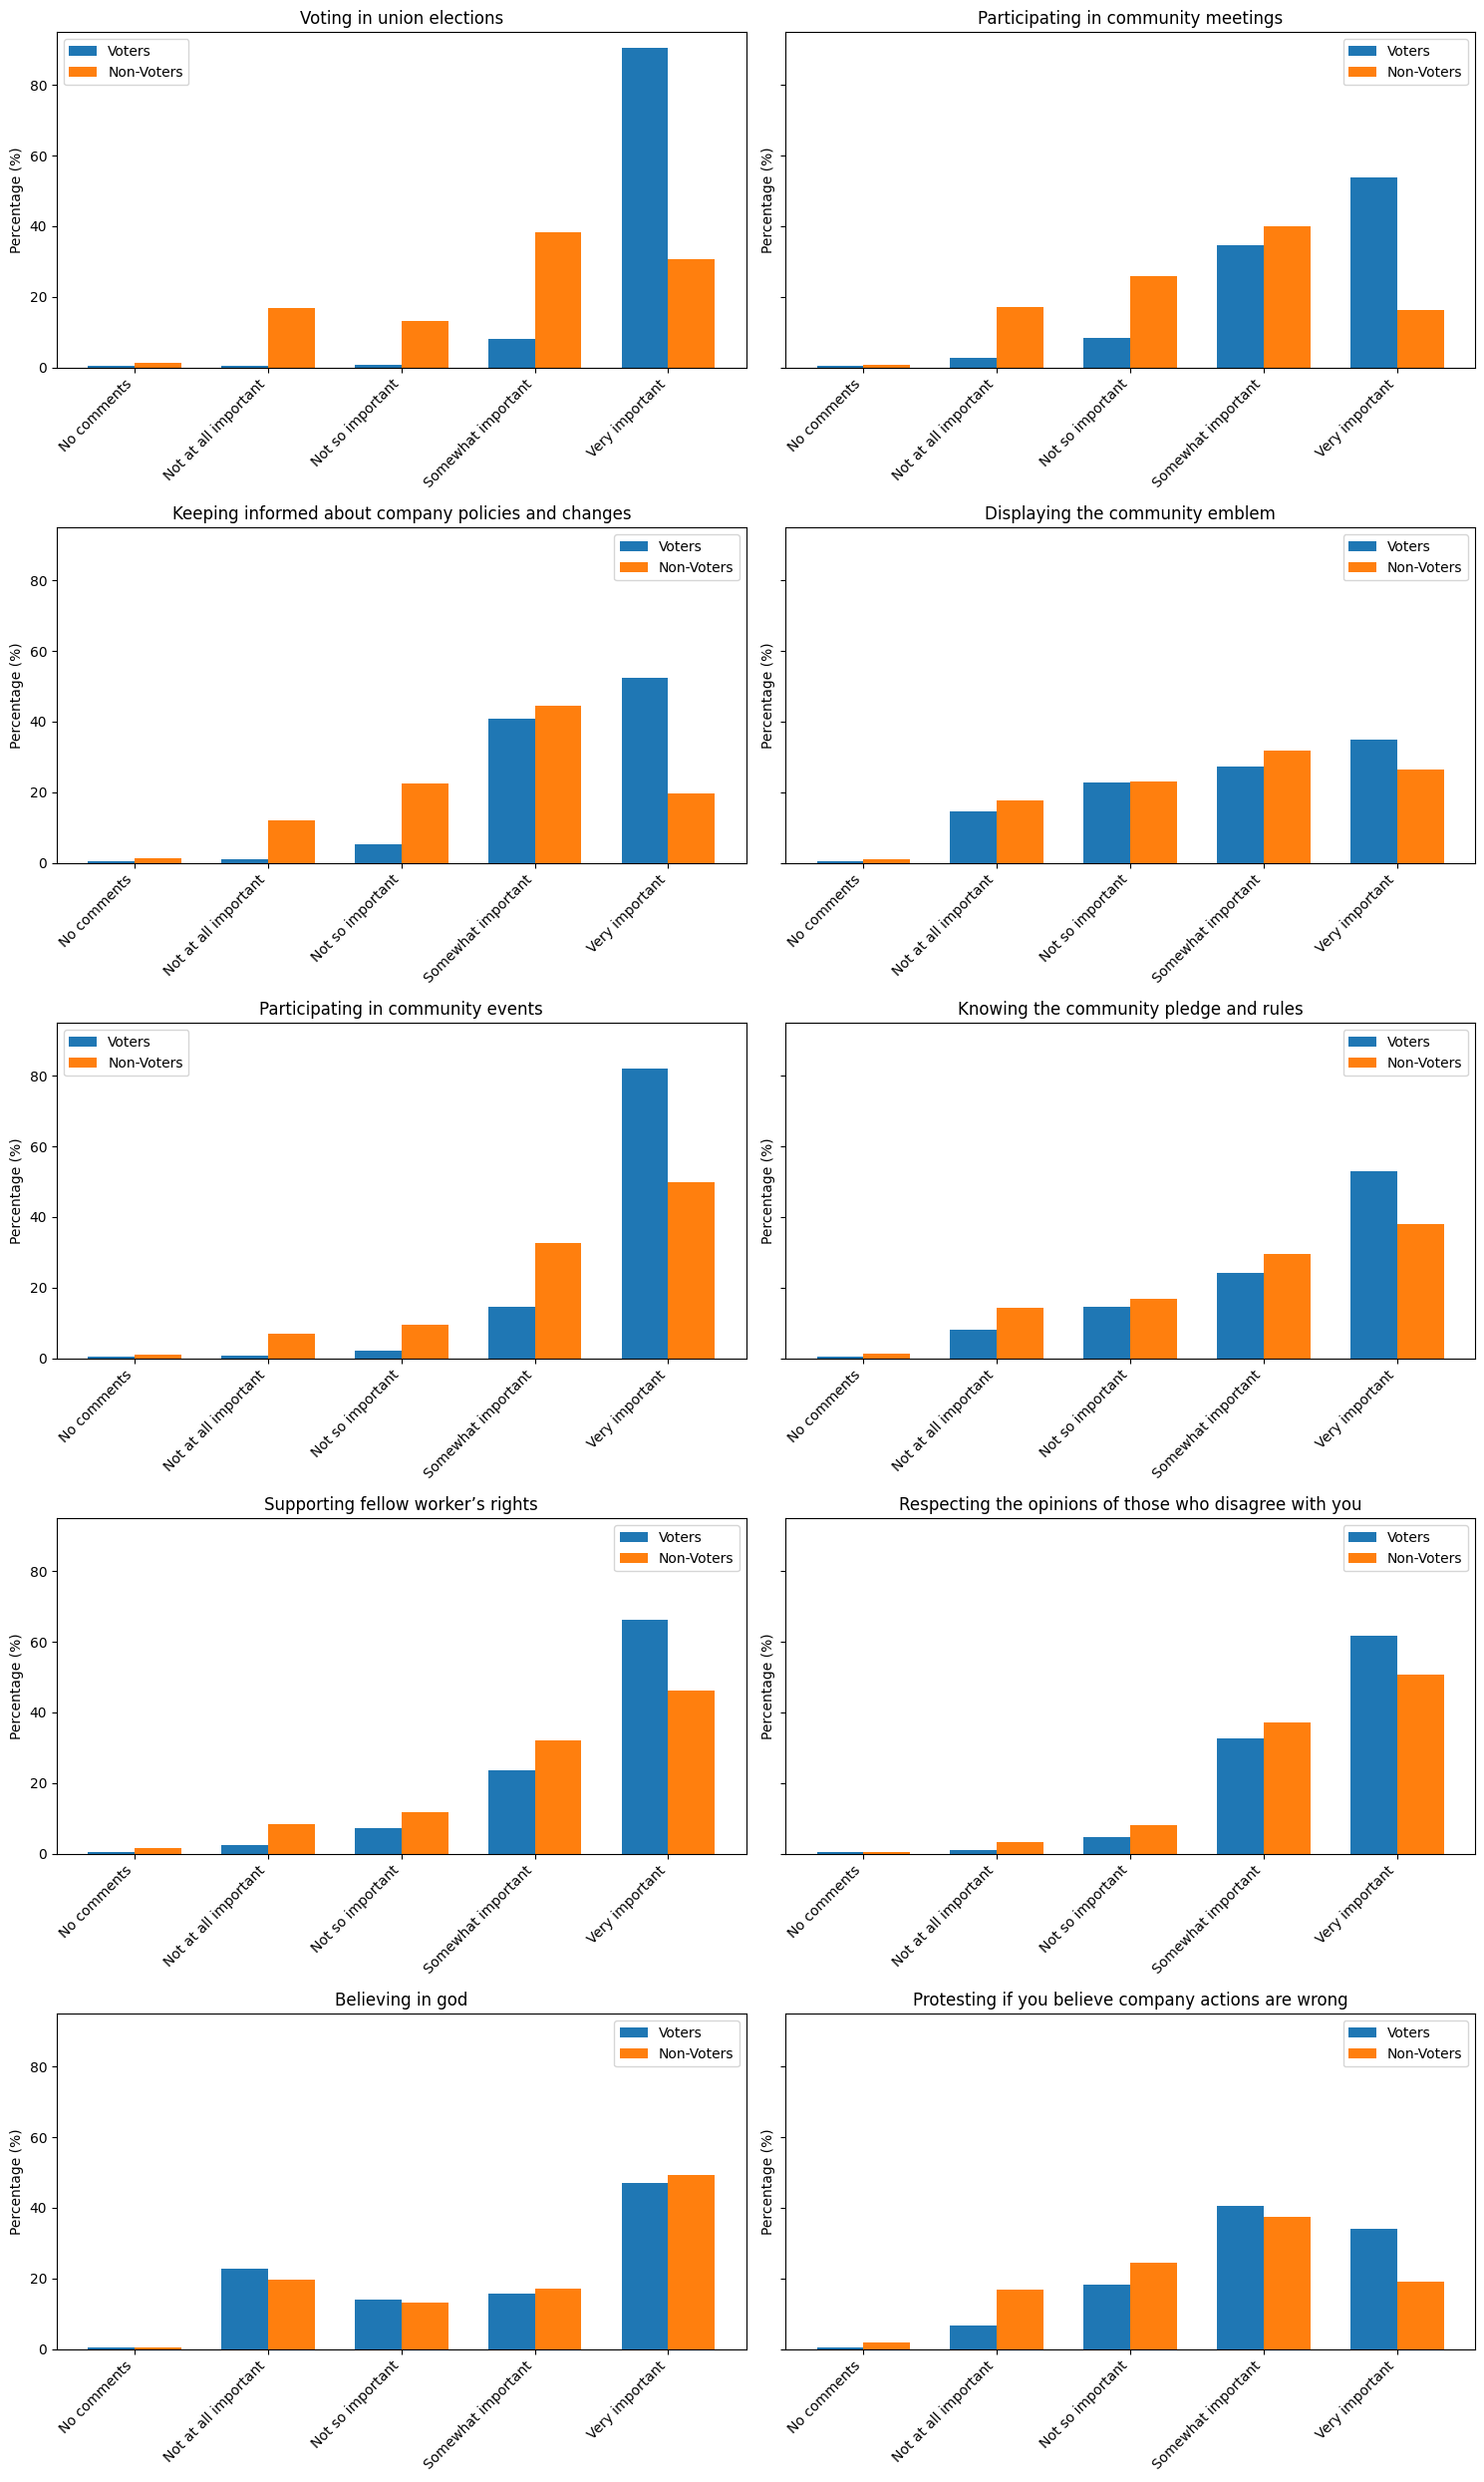

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation for voters
voter_data = {
    'Q2_1': [21, 18, 31, 404, 4487],
    'Q2_2': [24, 132, 421, 1719, 2665],
    'Q2_3': [22, 55, 256, 2029, 2599],
    'Q2_4': [22, 729, 1128, 1348, 1734],
    'Q2_5': [16, 38, 104, 728, 4075],
    'Q2_6': [17, 394, 726, 1195, 2629],
    'Q2_7': [27, 124, 355, 1172, 3283],
    'Q2_8': [16, 47, 229, 1613, 3056],
    'Q2_9': [27, 1126, 697, 779, 2332],
    'Q2_10': [19, 331, 912, 2016, 1683]
}

# Data preparation for non-voters
non_voter_data = {
    'Q2_1': [10, 142, 112, 326, 260],
    'Q2_2': [7, 145, 220, 340, 138],
    'Q2_3': [10, 103, 191, 378, 168],
    'Q2_4': [8, 150, 196, 271, 225],
    'Q2_5': [8, 59, 81, 277, 425],
    'Q2_6': [10, 122, 144, 252, 322],
    'Q2_7': [13, 71, 101, 272, 393],
    'Q2_8': [5, 29, 68, 316, 432],
    'Q2_9': [5, 168, 113, 145, 419],
    'Q2_10': [15, 144, 209, 319, 163]
}
# Total numbers
total_voters = 4961
total_non_voters = 850
# Convert counts to percentages
voter_percentages = {key: [count / total_voters * 100 for count in value] for key, value in voter_data.items()}
non_voter_percentages = {key: [count / total_non_voters * 100 for count in value] for key, value in non_voter_data.items()}

# Categories
categories = ['No comments', 'Not at all important', 'Not so important', 'Somewhat important', 'Very important']
questions = [
    "Voting in union elections",
    "Participating in community meetings",
    "Keeping informed about company policies and changes",
    "Displaying the community emblem",
    "Participating in community events",
    "Knowing the community pledge and rules",
    "Supporting fellow worker’s rights",
    "Respecting the opinions of those who disagree with you",
    "Believing in god",
    "Protesting if you believe company actions are wrong"
]

# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 25), sharey=True)
axes = axes.flatten()

# Plot data
for i, ax in enumerate(axes):
    q = f'Q2_{i+1}'
    voter_counts = voter_percentages[q]
    non_voter_counts = non_voter_percentages[q]

    bar_width = 0.35
    bar_positions = np.arange(len(categories))

    ax.bar(bar_positions - bar_width/2, voter_counts, bar_width, label='Voters')
    ax.bar(bar_positions + bar_width/2, non_voter_counts, bar_width, label='Non-Voters')

    ax.set_xticks(bar_positions)
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.set_title(questions[i])
    ax.set_ylabel('Percentage (%)')
    ax.legend()

fig.tight_layout()
plt.show()


#Agreement with Statements on Company and Community Issues:
#What are the most common sentiments about systemic racism, management issues, and company leadership among respondents?
#How do these sentiments affect voting behavior?

In [27]:
#Agreement with Statements on Company and Community Issues:
#What are the most common sentiments about systemic racism, management issues, and company leadership among respondents?
#How do these sentiments affect voting behavior?

# Create a dictionary mapping numeric values to text descriptions
sentiment_mapping = {
    1: "Strongly agree",
    2: "Somewhat agree",
    3: "Somewhat disagree",
    4: "Strongly disagree",
    0: "No comments"
}
# List of questions and their text descriptions
question_texts = {
    "Q3_1": "Systemic racism is a problem in the company.",
    "Q3_2": "Issues in management are a bigger problem than disruptions during protests.",
    "Q3_3": "The community has become too complacent.",
    "Q3_4": "The company's internal media is more interested in maintaining an image than telling the truth.",
    "Q3_5": "Company leadership doesn’t care about workers like me.",
    "Q3_6": "The way people interact needs to change with the times to be more sensitive to workers with different backgrounds."
}
# List of columns related to question 3
sentiment_columns = [f"Q3_{i}" for i in range(1, 7)]

# Apply the mapping to each of the columns
for column in sentiment_columns:
    df_cleaned.loc[:, column] = df_cleaned.loc[:, column].map(sentiment_mapping)


In [28]:
# Function to generate count and percentage table
def generate_summary_table(df, columns):
    summary_tables = {}
    for column in columns:
        # Count the occurrences of each response
        counts = df_cleaned[column].value_counts().sort_index()

        # Calculate the percentage of each response
        percentages = (counts / counts.sum()) * 100

        # Combine counts and percentages into a DataFrame
        summary_table = pd.DataFrame({
            'Count': counts,
            'Percentage': percentages
        }).round(2)  # Round percentages to 2 decimal places

        # Store the summary table in the dictionary
        summary_tables[column] = summary_table

    return summary_tables
summary_tables = generate_summary_table(df_cleaned, sentiment_columns)
# Display the perception of voters
for column, table in summary_tables.items():
    print(f"Summary for {column}:")
    print(table)
    print("\n")

Summary for Q3_1:
                   Count  Percentage
Q3_1                                
Somewhat agree      1594       27.50
Somewhat disagree    803       13.85
Strongly agree      2682       46.27
Strongly disagree    718       12.39


Summary for Q3_2:
                   Count  Percentage
Q3_2                                
Somewhat agree      1402       24.24
Somewhat disagree   1235       21.36
Strongly agree      1708       29.53
Strongly disagree   1438       24.87


Summary for Q3_3:
                   Count  Percentage
Q3_3                                
Somewhat agree      1618       27.98
Somewhat disagree   1519       26.27
Strongly agree       990       17.12
Strongly disagree   1655       28.62


Summary for Q3_4:
                   Count  Percentage
Q3_4                                
Somewhat agree      1800       31.01
Somewhat disagree    900       15.51
Strongly agree      2605       44.88
Strongly disagree    499        8.60


Summary for Q3_5:
              

In [29]:
categories = ["Somewhat agree",
"Somewhat disagree",
"Strongly agree",
"Strongly disagree"]

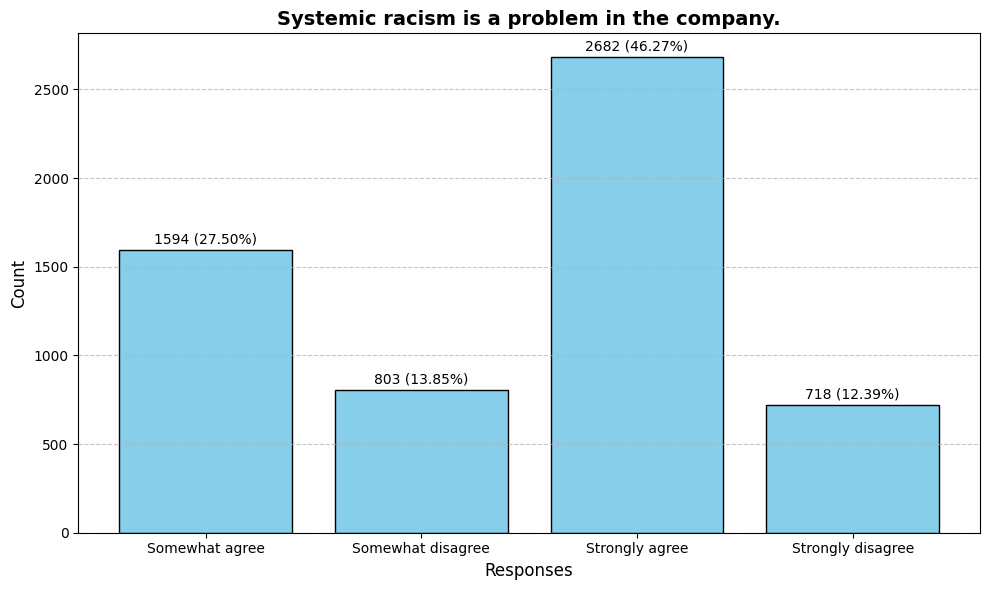

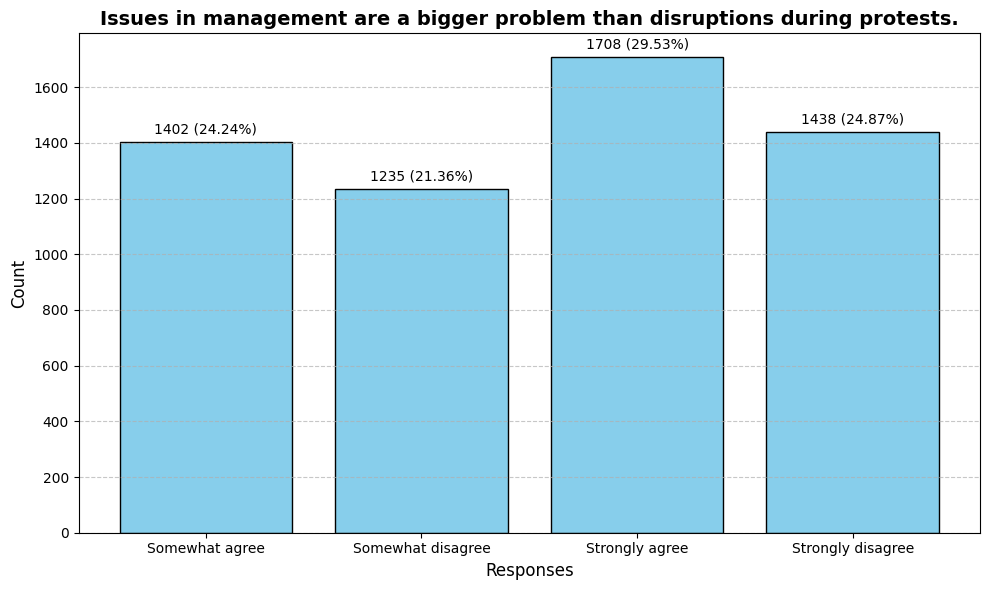

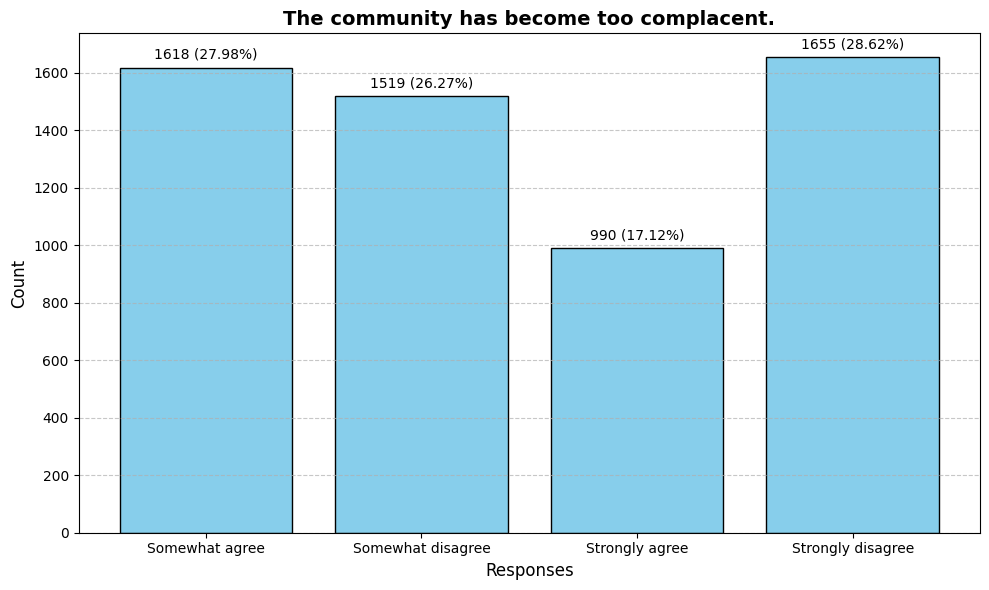

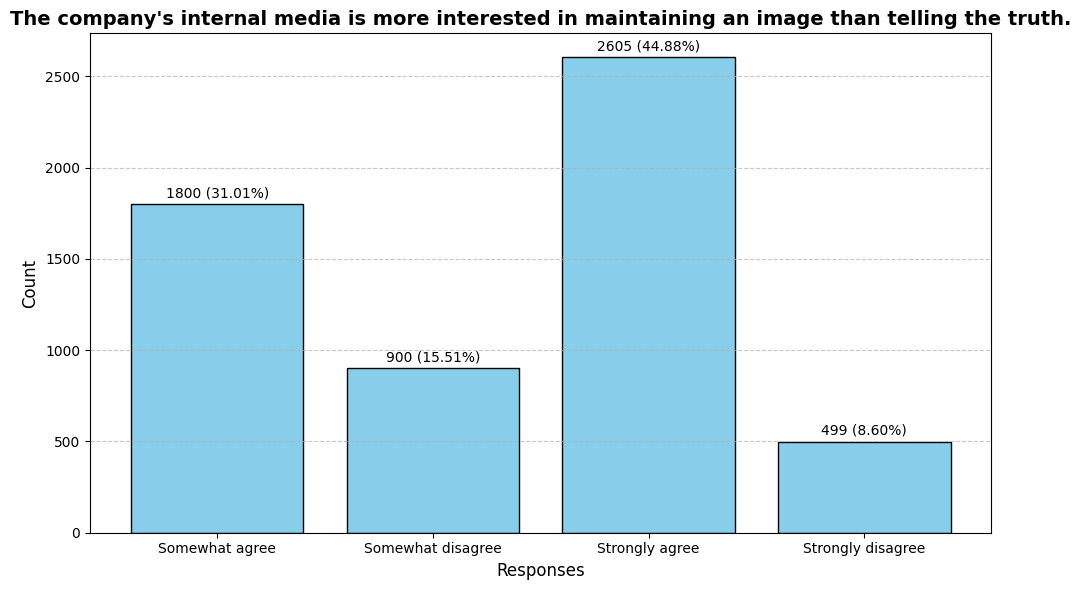

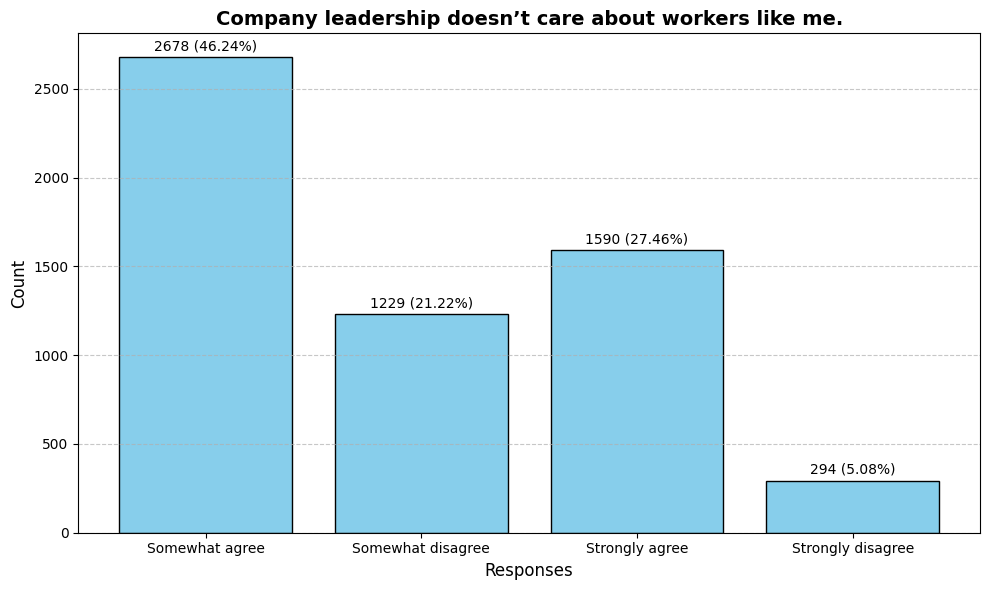

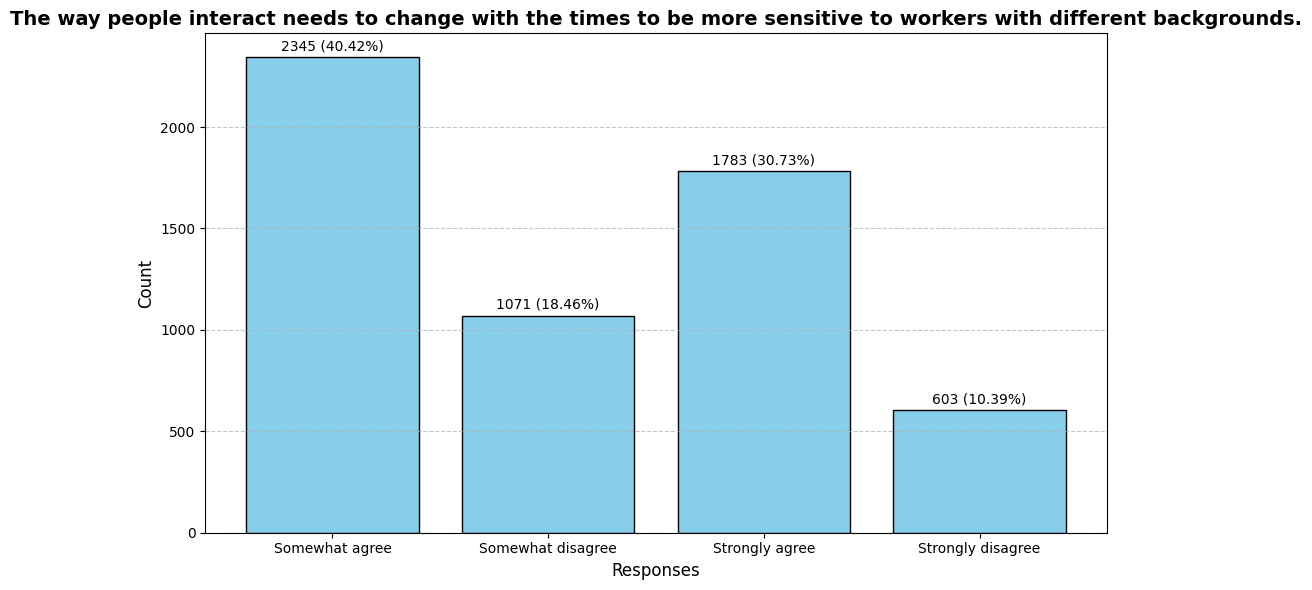

In [30]:
import matplotlib.pyplot as plt

# Provided data
question_texts = {
    "Q3_1": "Systemic racism is a problem in the company.",
    "Q3_2": "Issues in management are a bigger problem than disruptions during protests.",
    "Q3_3": "The community has become too complacent.",
    "Q3_4": "The company's internal media is more interested in maintaining an image than telling the truth.",
    "Q3_5": "Company leadership doesn’t care about workers like me.",
    "Q3_6": "The way people interact needs to change with the times to be more sensitive to workers with different backgrounds."
}

summary_data = {
    "Q3_1": {
        "Responses": ["Somewhat agree", "Somewhat disagree", "Strongly agree", "Strongly disagree"],
        "Count": [1594, 803, 2682, 718],
        "Percentage": [27.50, 13.85, 46.27, 12.39]
    },
    "Q3_2": {
        "Responses": ["Somewhat agree", "Somewhat disagree", "Strongly agree", "Strongly disagree"],
        "Count": [1402, 1235, 1708, 1438],
        "Percentage": [24.24, 21.36, 29.53, 24.87]
    },
    "Q3_3": {
        "Responses": ["Somewhat agree", "Somewhat disagree", "Strongly agree", "Strongly disagree"],
        "Count": [1618, 1519, 990, 1655],
        "Percentage": [27.98, 26.27, 17.12, 28.62]
    },
    "Q3_4": {
        "Responses": ["Somewhat agree", "Somewhat disagree", "Strongly agree", "Strongly disagree"],
        "Count": [1800, 900, 2605, 499],
        "Percentage": [31.01, 15.51, 44.88, 8.60]
    },
    "Q3_5": {
        "Responses": ["Somewhat agree", "Somewhat disagree", "Strongly agree", "Strongly disagree"],
        "Count": [2678, 1229, 1590, 294],
        "Percentage": [46.24, 21.22, 27.46, 5.08]
    },
    "Q3_6": {
        "Responses": ["Somewhat agree", "Somewhat disagree", "Strongly agree", "Strongly disagree"],
        "Count": [2345, 1071, 1783, 603],
        "Percentage": [40.42, 18.46, 30.73, 10.39]
    }
}

# Generate bar charts for each question
for question, data in summary_data.items():
    # Extract data for plotting
    responses = data["Responses"]
    counts = data["Count"]
    percentages = data["Percentage"]

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(responses, counts, color='skyblue', edgecolor='black')

    # Add text labels for counts and percentages on top of each bar
    for i in range(len(counts)):
        plt.text(i, counts[i] + 20, f'{counts[i]} ({percentages[i]:.2f}%)', ha='center', va='bottom', fontsize=10, color='black')

    # Set the title and labels
    plt.title(question_texts[question], fontsize=14, fontweight='bold')
    plt.xlabel('Responses', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Add a grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.tight_layout()
    plt.show()


# Exploratory Data Analysis Questions

EDA Question- 1 How racism and different attitudes impact Voting

In [31]:
#How racism is impacting Voting behaviour? And to what extent?
# Filter relevant columns
columns = ['RespId', 'voter_category', 'race', 'Q3_1', 'Q3_6']
data = df_cleaned[columns]
# Summary of voting behavior based on Q3_1 and Q3_6
summary_Q3_1 = data.groupby('Q3_1')['voter_category'].value_counts(normalize=True).unstack()
summary_Q3_6 = data.groupby('Q3_6')['voter_category'].value_counts(normalize=True).unstack()

summary_Q3_1

voter_category       always  rarely/never  sporadic
Q3_1                                               
Somewhat agree     0.273526      0.299875  0.426600
Somewhat disagree  0.347447      0.232877  0.419676
Strongly agree     0.314691      0.233408  0.451902
Strongly disagree  0.338440      0.196379  0.465181

In [32]:
data

RespId voter_category         race               Q3_1               Q3_6
0     470001         always        White     Strongly agree     Somewhat agree
1     470002         always        White  Somewhat disagree     Somewhat agree
2     470003       sporadic        White     Somewhat agree     Somewhat agree
3     470007       sporadic        Black     Strongly agree     Strongly agree
4     480008         always        White  Strongly disagree  Strongly disagree
...      ...            ...          ...                ...                ...
5831  477662         always     Hispanic     Strongly agree     Somewhat agree
5832  477663   rarely/never        White     Strongly agree     Strongly agree
5833  488322       sporadic  Other/Mixed     Strongly agree     Somewhat agree
5834  488325         always        Black  Strongly disagree  Somewhat disagree
5835  477666         always        Black     Strongly agree  Somewhat disagree

[5836 rows x 5 columns]

In [33]:
from scipy.stats import chi2_contingency
# Chi-square test
contingency_table = pd.crosstab(data['Q3_1'], data['voter_category'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-square Test Q3_1: p-value = {p}") # extremely small means there is a relation

contingency_table = pd.crosstab(data['Q3_6'], data['voter_category'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-square Test Q3_6: p-value = {p}") # not small not a very significant relationship


Chi-square Test Q3_1: p-value = 7.883759149670625e-08
Chi-square Test Q3_6: p-value = 0.252812593962577


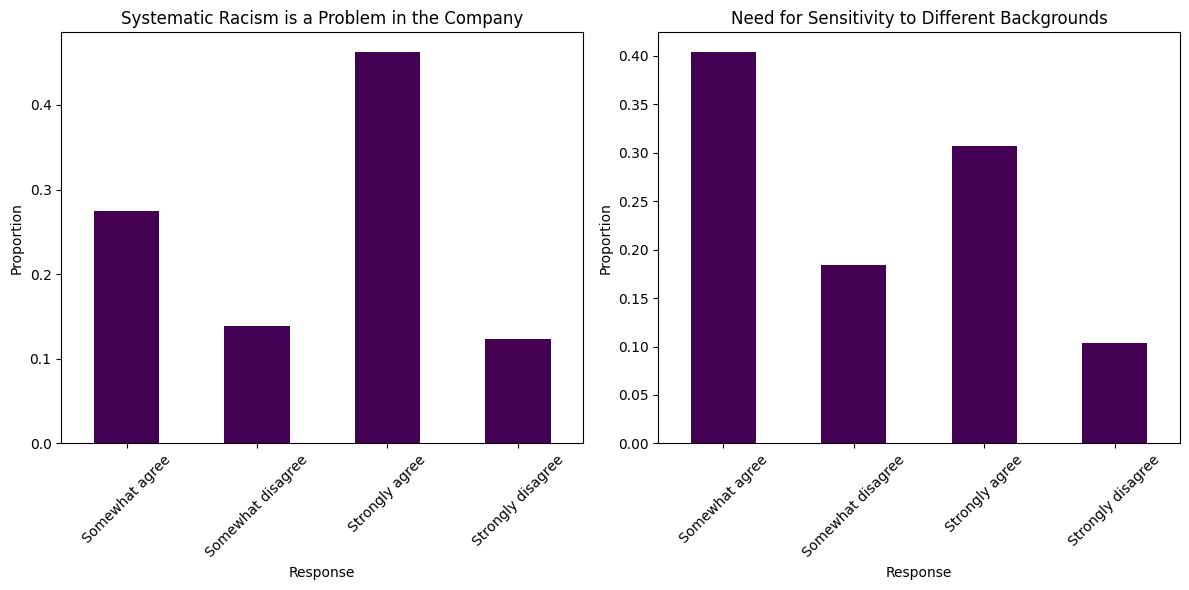

In [103]:
import matplotlib.pyplot as plt

# Filter relevant columns
columns = ['RespId', 'voter_category', 'race', 'Q3_1', 'Q3_6']
data = df_cleaned[columns]

# Calculate the proportion of agreement/disagreement for Q3_1 and Q3_6
summary_Q3_1 = data['Q3_1'].value_counts(normalize=True).sort_index()  # Proportion of each response in Q3_1
summary_Q3_6 = data['Q3_6'].value_counts(normalize=True).sort_index()  # Proportion of each response in Q3_6

# Set figure size
plt.figure(figsize=(12, 6))

# Bar plot for Q3_1
plt.subplot(1, 2, 1)
summary_Q3_1.plot(kind='bar', colormap='viridis', ax=plt.gca())
plt.title('Systematic Racism is a Problem in the Company')
plt.ylabel('Proportion')
plt.xlabel('Response')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Bar plot for Q3_6
plt.subplot(1, 2, 2)
summary_Q3_6.plot(kind='bar', colormap='viridis', ax=plt.gca())
plt.title('Need for Sensitivity to Different Backgrounds')
plt.ylabel('Proportion')
plt.xlabel('Response')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


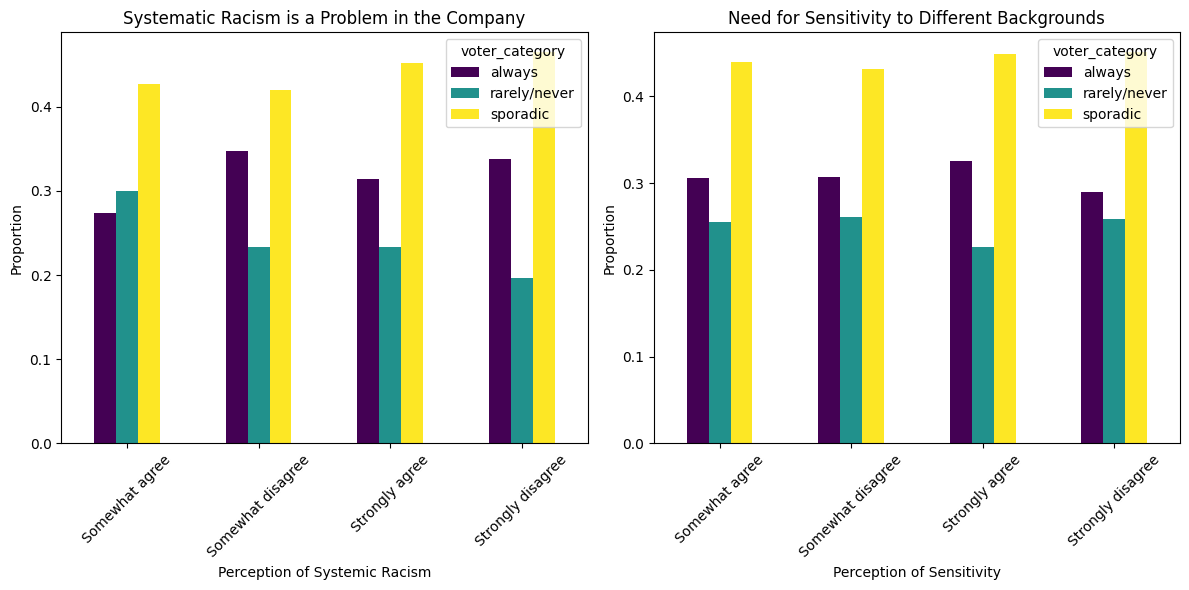

In [102]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Bar plot for Q3_1
plt.subplot(1, 2, 1)
summary_Q3_1.plot(kind='bar', colormap='viridis', ax=plt.gca())
plt.title('Systematic Racism is a Problem in the Company')
plt.ylabel('Proportion')
plt.xlabel('Perception of Systemic Racism')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Bar plot for Q3_6
plt.subplot(1, 2, 2)
summary_Q3_6.plot(kind='bar', colormap='viridis', ax=plt.gca())
plt.title('Need for Sensitivity to Different Backgrounds')
plt.ylabel('Proportion')
plt.xlabel('Perception of Sensitivity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


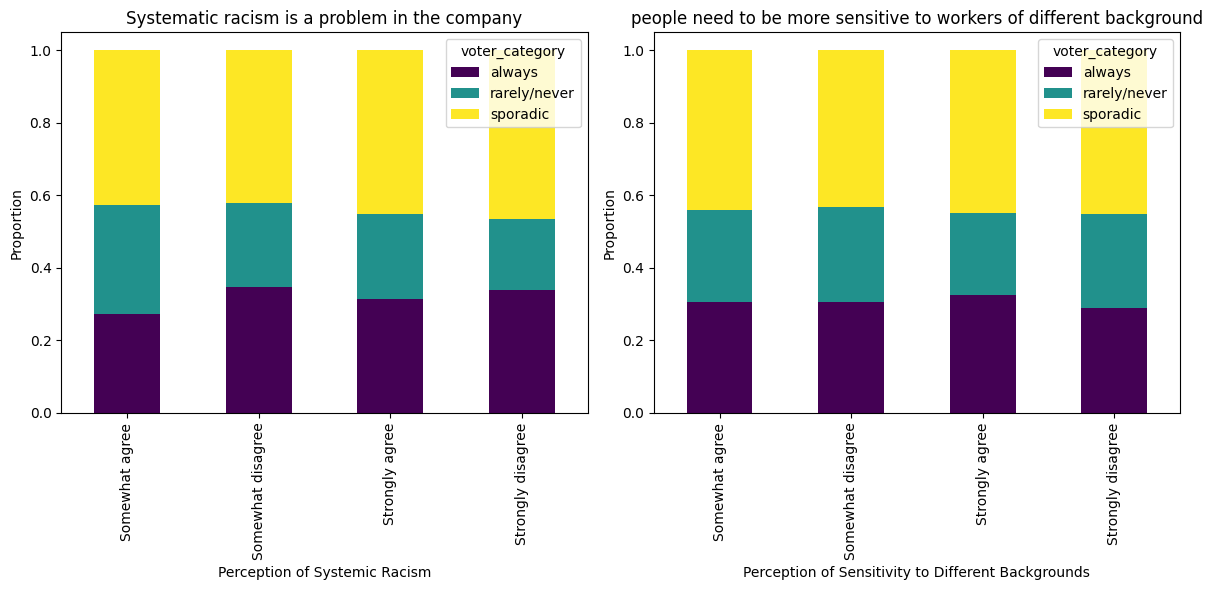

In [34]:
# Visualization
plt.figure(figsize=(12, 6))

# Bar plot for Q3_1
plt.subplot(1, 2, 1)
summary_Q3_1.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Systematic racism is a problem in the company')
plt.ylabel('Proportion')
plt.xlabel('Perception of Systemic Racism')

# Bar plot for Q3_6
plt.subplot(1, 2, 2)
summary_Q3_6.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('people need to be more sensitive to workers of different background')
plt.ylabel('Proportion')
plt.xlabel('Perception of Sensitivity to Different Backgrounds')

plt.tight_layout()
plt.show()

EDA Question -2 Is it true that workers feel neglected by the company management and union leaders? What is it’s impact on voting behaviour



In [35]:
relevant_columns = ['RespId', 'Q3_2', 'Q3_4', 'Q3_5', 'Q8_1', 'Q8_2','voter_category']
df_relevant = df_cleaned[relevant_columns]
df_relevant.head()

RespId               Q3_2               Q3_4               Q3_5  Q8_1  \
0  470001     Strongly agree  Strongly disagree  Somewhat disagree     3   
1  470002  Somewhat disagree  Somewhat disagree  Somewhat disagree     2   
2  470003     Somewhat agree  Somewhat disagree     Somewhat agree     3   
3  470007     Strongly agree  Strongly disagree     Somewhat agree     3   
4  480008                NaN     Strongly agree     Somewhat agree     1   

   Q8_2 voter_category  
0     4         always  
1     3         always  
2     2       sporadic  
3     2       sporadic  
4     3         always

In [36]:
response_map_Q8 = {
    1: "a lot" ,
    2: "some",
    3: "not much",
    4: "not at all",
    -1: "No comments"
}
#df_relevant['Q8_1'] = df_relevant['Q8_1'].map(response_map_Q8)
#df_relevant['Q8_2'] = df_relevant['Q8_2'].map(response_map_Q8)

df_cleaned.loc[:, 'Q8_1'] = df_cleaned.loc[:, 'Q8_1'].map(response_map_Q8)
df_cleaned.loc[:, 'Q8_2'] = df_cleaned.loc[:, 'Q8_2'].map(response_map_Q8)


In [37]:
# Frequency distribution for Q3_2, Q3_4, Q3_5
print(df_relevant['Q3_2'].value_counts(normalize=True)) #Issues in management are a bigger problem than disruptions during protests.

print(df_relevant['Q3_4'].value_counts(normalize=True)) # The company's internal media is more interested in maintaining an image than telling the truth.

print(df_relevant['Q3_5'].value_counts(normalize=True)) #Company leadership doesn’t care about workers like me.


# Frequency distribution for Q8_1, Q8_2
print(df_relevant['Q8_1'].value_counts(normalize=True)) # Trust in company leadership
print(df_relevant['Q8_2'].value_counts(normalize=True)) # Trust in Union leaders




Q3_2
Strongly agree       0.295348
Strongly disagree    0.248660
Somewhat agree       0.242435
Somewhat disagree    0.213557
Name: proportion, dtype: float64
Q3_4
Strongly agree       0.448828
Somewhat agree       0.310131
Somewhat disagree    0.155065
Strongly disagree    0.085975
Name: proportion, dtype: float64
Q3_5
Somewhat agree       0.462442
Strongly agree       0.274564
Somewhat disagree    0.212226
Strongly disagree    0.050768
Name: proportion, dtype: float64
Q8_1
 4    0.374400
 2    0.267820
 3    0.187286
 1    0.162440
-1    0.008053
Name: proportion, dtype: float64
Q8_2
 3    0.403358
 2    0.342700
 4    0.206477
 1    0.039068
-1    0.008396
Name: proportion, dtype: float64


In [38]:
df_cleaned['Q8_1']

0         not much
1             some
2         not much
3         not much
4            a lot
           ...    
5831    not at all
5832    not at all
5833          some
5834         a lot
5835      not much
Name: Q8_1, Length: 5836, dtype: object

In [39]:
perception_columns = ['Q3_2', 'Q3_4', 'Q3_5', 'Q8_1', 'Q8_2']
print(df_cleaned[perception_columns + ['voter_category']].isna().sum())
# Chi-Square tests
for col in perception_columns:
    contingency_table = pd.crosstab(df_cleaned[col], df_cleaned['voter_category'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f'Chi-square Test {col}: p-value = {p}')


Q3_2              53
Q3_4              32
Q3_5              45
Q8_1               0
Q8_2               0
voter_category     0
dtype: int64
Chi-square Test Q3_2: p-value = 8.324939558753877e-11
Chi-square Test Q3_4: p-value = 3.8041399830121166e-15
Chi-square Test Q3_5: p-value = 4.137226107277311e-08
Chi-square Test Q8_1: p-value = 4.905967516532328e-13
Chi-square Test Q8_2: p-value = 0.0036770363085915528


p-value = 8.324939558753877e-11: This very low p-value indicates a significant relationship between how workers perceive management issues and their voting behavior.

p-value = 3.8041399830121166e-15: This extremely low p-value suggests a very strong association between perceptions of the company's internal media and voting behavior.

p-value = 4.137226107277311e-08: This low p-value indicates a significant relationship between perceptions of neglect by company leadership and voting behavior.

p-value = 4.905967516532328e-13: This very low p-value suggests a significant association between trust in company leadership and voting behavior.

p-value = 0.0036770363085915528: This p-value indicates a significant relationship between trust in union representatives and voting behavior, though it is not as strong as the other factors.

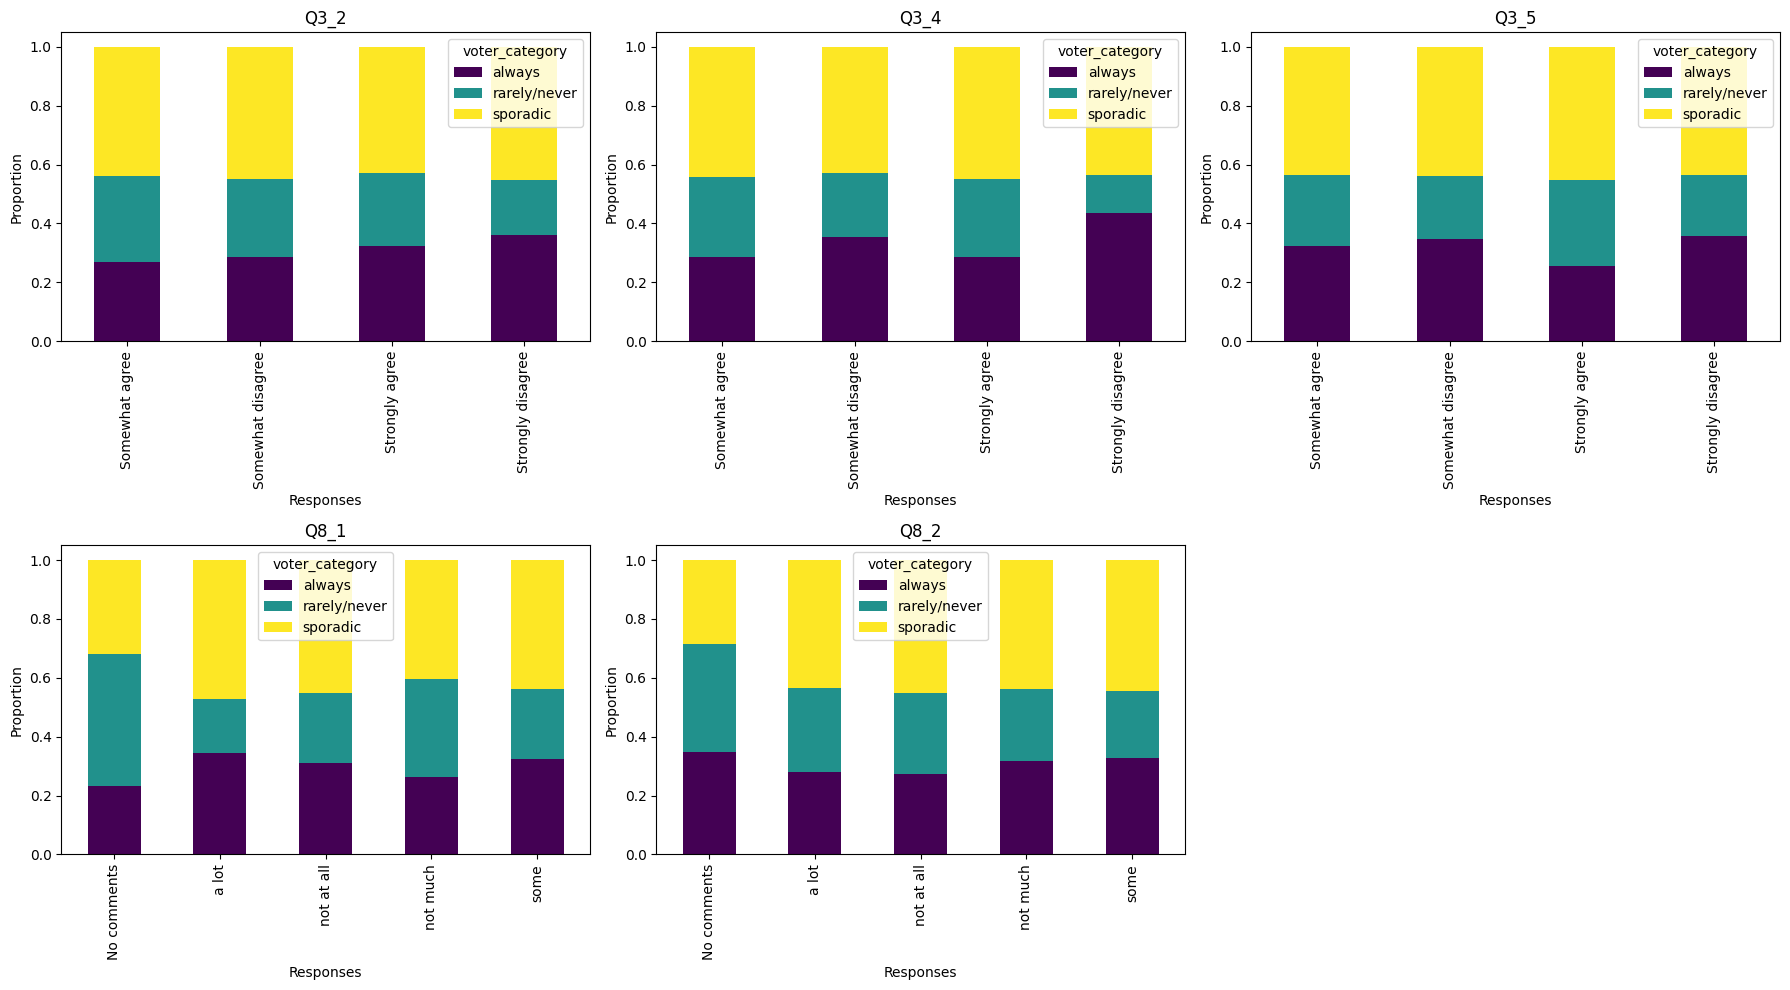

In [40]:
# Visualization
plt.figure(figsize=(18, 10))

# Bar plots for each perception column
for i, col in enumerate(perception_columns):
    plt.subplot(2, 3, i+1)
    summary = pd.crosstab(df_cleaned[col], df_cleaned['voter_category'], normalize='index')
    summary.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
    plt.title(col)
    plt.ylabel('Proportion')
    plt.xlabel('Responses')

plt.tight_layout()
plt.show()


In [41]:
# workers feel neglected Part -2
# Define the columns of interest
attitude_company = 'Q12'
attitude_union = 'Q13'
voter_category = 'voter_category'

# Replace response options with meaningful labels
attitude_mapping = {
    1: 'Works hard to earn votes',
    2: 'Wants votes but does not work hard',
    3: 'Does not care about votes',
    4: 'Does not want votes but does not prevent voting',
    5: 'Does not want votes and prevents voting'
}
df_cleaned[attitude_company] = df_cleaned[attitude_company].replace(attitude_mapping)
df_cleaned[attitude_union] = df_cleaned[attitude_union].replace(attitude_mapping)
# Create a crosstab for the chi-square test
contingency_table_company = pd.crosstab(df_cleaned[attitude_company], df_cleaned[voter_category])
contingency_table_union = pd.crosstab(df_cleaned[attitude_union], df_cleaned[voter_category])
# Perform chi-square test
chi2_company, p_company, dof_company, ex_company = chi2_contingency(contingency_table_company)
chi2_union, p_union, dof_union, ex_union = chi2_contingency(contingency_table_union)

print(f'Chi-square Test Company Attitude: p-value = {p_company}') # Strong relation
print(f'Chi-square Test Union Attitude: p-value = {p_union}') # strong relation


Chi-square Test Company Attitude: p-value = 1.8026886480240755e-39
Chi-square Test Union Attitude: p-value = 1.2856119964282136e-44


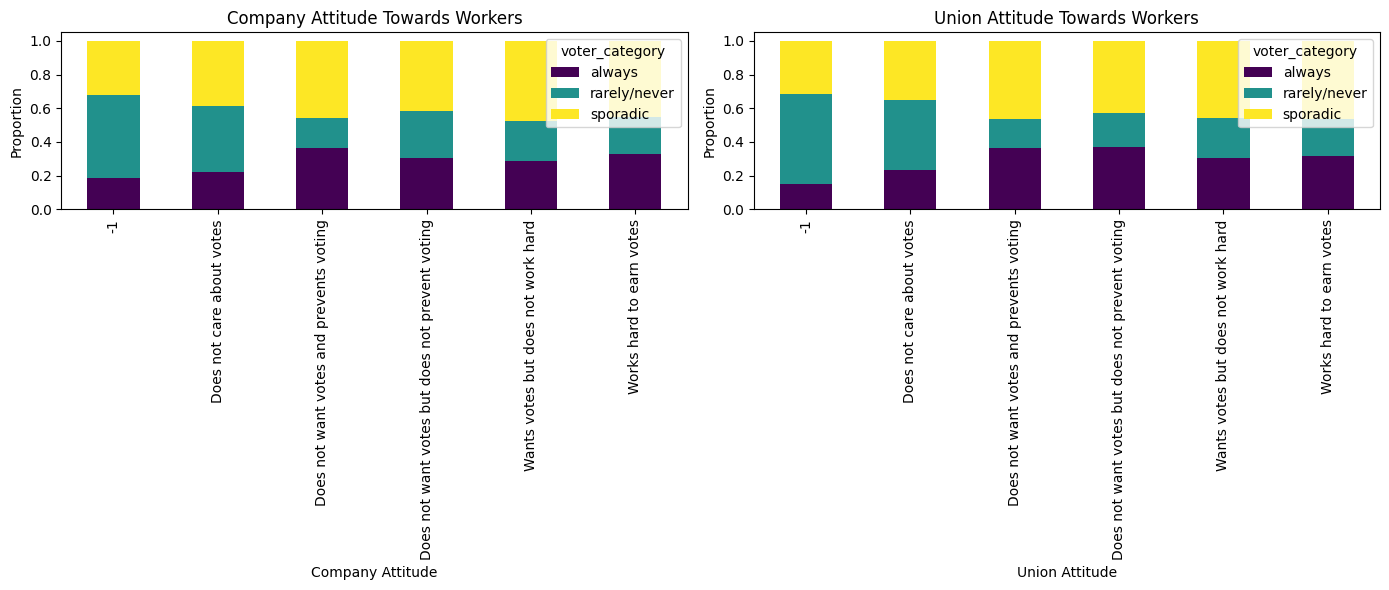

In [42]:
# Visualization
plt.figure(figsize=(14, 6))

# Bar plot for company attitude
plt.subplot(1, 2, 1)
summary_company = pd.crosstab(df_cleaned[attitude_company], df_cleaned[voter_category], normalize='index')
summary_company.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Company Attitude Towards Workers')
plt.ylabel('Proportion')
plt.xlabel('Company Attitude')

# Bar plot for union attitude
plt.subplot(1, 2, 2)
summary_union = pd.crosstab(df_cleaned[attitude_union], df_cleaned[voter_category], normalize='index')
summary_union.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Union Attitude Towards Workers')
plt.ylabel('Proportion')
plt.xlabel('Union Attitude')

plt.tight_layout()
plt.show()

EDA Question -3 To what extent workers feel that they are not understood by the leaders?



In [43]:
relevant_columns_new = ['RespId', 'Q6','Q7','Q13','voter_category']
df_relevant_new = df_cleaned[relevant_columns_new]
df_relevant_new.head()

RespId  Q6  Q7                                      Q13 voter_category
0  470001   2   1                 Works hard to earn votes         always
1  470002   2   2                 Works hard to earn votes         always
2  470003   1   1       Wants votes but does not work hard       sporadic
3  470007   3   1                 Works hard to earn votes       sporadic
4  480008   2   2  Does not want votes and prevents voting         always

In [44]:
# Create a crosstab to see the relationship between Q7 (Need for changes) and Q13 (Union leaders' attitude)
crosstab = pd.crosstab(df_relevant_new['Q7'], df_relevant_new['Q13'], margins=True)

# Add the counts and percentages for better understanding
crosstab_percentage = crosstab.div(crosstab.iloc[:, -1], axis=0) * 100
crosstab

Q13   -1  Does not care about votes  Does not want votes and prevents voting  \
Q7                                                                             
-1    33                          3                                        5   
1    138                        529                                      497   
2     21                        145                                      304   
All  192                        677                                      806   

Q13  Does not want votes but does not prevent voting  \
Q7                                                     
-1                                                 1   
1                                                275   
2                                                197   
All                                              473   

Q13  Wants votes but does not work hard  Works hard to earn votes   All  
Q7                                                                       
-1                                    8                        11    61  
1                                  1237                      1992  4668  
2                                   207                       233  1107  
All                                1452                      2236  5836

In [45]:
crosstab_percentage # 1 : changes are needed
                    # 2: changes are not needed

Q13         -1  Does not care about votes  \
Q7                                          
-1   54.098361                   4.918033   
1     2.956298                  11.332476   
2     1.897019                  13.098464   
All   3.289925                  11.600411   

Q13  Does not want votes and prevents voting  \
Q7                                             
-1                                  8.196721   
1                                  10.646958   
2                                  27.461608   
All                                13.810829   

Q13  Does not want votes but does not prevent voting  \
Q7                                                     
-1                                          1.639344   
1                                           5.891174   
2                                          17.795845   
All                                         8.104866   

Q13  Wants votes but does not work hard  Works hard to earn votes    All  
Q7                                                                        
-1                            13.114754                 18.032787  100.0  
1                             26.499572                 42.673522  100.0  
2                             18.699187                 21.047877  100.0  
All                           24.880055                 38.313914  100.0

In [46]:
like_me_mapping = {
    1: 'A lot',
    2: 'some',
    3: 'only few',
    4: 'None',

}
df_relevant_new['Q6'] = df_relevant_new['Q6'].replace(like_me_mapping)

<ipython-input-46-66d7cabc6480>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
df_relevant_new

RespId        Q6  Q7                                      Q13  \
0     470001      some   1                 Works hard to earn votes   
1     470002      some   2                 Works hard to earn votes   
2     470003     A lot   1       Wants votes but does not work hard   
3     470007  only few   1                 Works hard to earn votes   
4     480008      some   2  Does not want votes and prevents voting   
...      ...       ...  ..                                      ...   
5831  477662  only few   1       Wants votes but does not work hard   
5832  477663      some   1                 Works hard to earn votes   
5833  488322      some   2                 Works hard to earn votes   
5834  488325      None   1                Does not care about votes   
5835  477666      None   1                 Works hard to earn votes   

     voter_category  
0            always  
1            always  
2          sporadic  
3          sporadic  
4            always  
...             ...  
5831         always  
5832   rarely/never  
5833       sporadic  
5834         always  
5835         always  

[5836 rows x 5 columns]

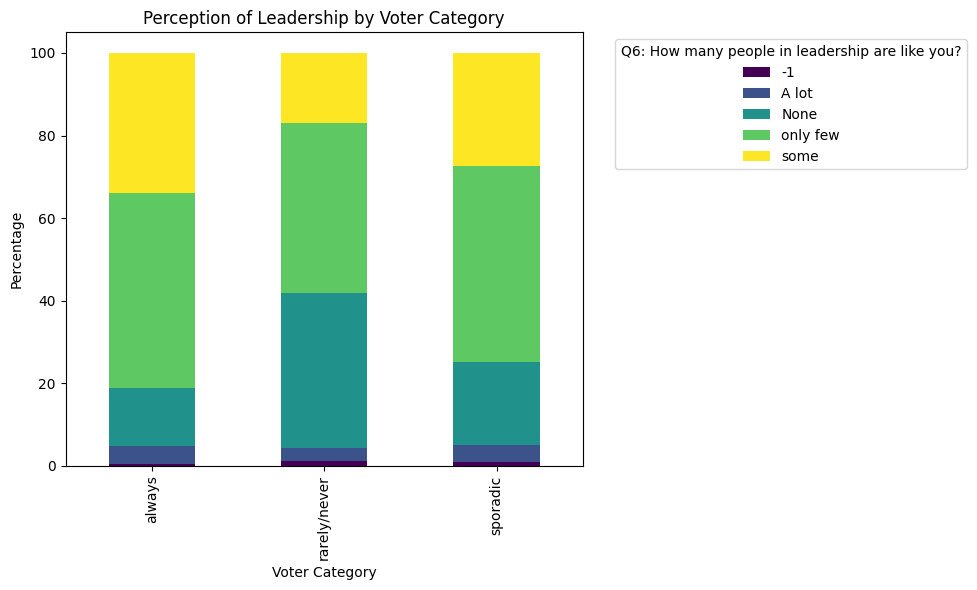

In [48]:
# voters think they are not understood enough?
# Group data by voter category and Q6 responses
grouped_data = df_relevant_new.groupby(['voter_category', 'Q6']).size().unstack(fill_value=0)

# Convert to percentage for better comparison
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
# Plotting
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Perception of Leadership by Voter Category')
plt.xlabel('Voter Category')
plt.ylabel('Percentage')
plt.legend(title='Q6: How many people in leadership are like you?', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

EDA - 4 How community activities impact voting behaviours? And if impact is significant what difficulties are faced to attend these community activities


In [49]:
# Create a crosstab to see the relationship between Q7 (Need for changes) and Q13 (Union leaders' attitude)
crosstab = pd.crosstab(df_cleaned['Q18'], df_cleaned['voter_category'], margins=True)

# Add the counts and percentages for better understanding
crosstab_percentage = crosstab.div(crosstab.iloc[:, -1], axis=0) * 100
crosstab_percentage # 1: participant of community activities
                    # 2: not participant of community activities

voter_category     always  rarely/never   sporadic    All
Q18                                                      
-1              25.000000      45.00000  30.000000  100.0
1               33.752345      18.36773  47.879925  100.0
2                1.440329      95.26749   3.292181  100.0
All             31.031528      24.86292  44.105552  100.0

In [50]:
import pandas as pd

# Assuming your dataset is loaded into a DataFrame called 'df'

# List of the columns corresponding to Q17 options
q17_columns = ['Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10']

# Define a function to combine the selected options into a single string
def merge_q17_options(row):
    selected_options = []
    for i, col in enumerate(q17_columns, start=1):
        if row[col] == 1:  # If the option is selected
            selected_options.append(str(i))  # Append the option number to the list
    return ', '.join(selected_options)  # Combine the selected options into a single string

# Apply the function to each row in the DataFrame and create a new column 'Q17_combined'
df_cleaned['Q17_combined'] = df.apply(merge_q17_options, axis=1)

# Display the first few rows to verify
df_cleaned[['Q17_combined']].head()


Q17_combined
0  3, 4, 5, 6, 7
1              2
2     2, 4, 8, 9
3       3, 8, 10
4

In [51]:
df_cleaned['Q17_10']

0      -1
1      -1
2      -1
3       1
4      -1
       ..
5831   -1
5832   -1
5833   -1
5834   -1
5835   -1
Name: Q17_10, Length: 5836, dtype: int64

In [52]:
import pandas as pd

# Assuming your dataset is loaded into a DataFrame called 'df'

# List of the columns corresponding to Q17 options
q17_columns = ['Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10']
df_cleaned[q17_columns] = df_cleaned[q17_columns].replace(-1, 0)

# Group the data by 'voter_category' and sum the +1 values for each Q17 option
q17_summary_counts = df_cleaned.groupby('voter_category')[q17_columns].sum()

# Count the total number of respondents in each voter category
voter_category_counts = df_cleaned['voter_category'].value_counts()

# Calculate the percentage for each Q17 option within each voter category
q17_summary_percentage = (q17_summary_counts.T / voter_category_counts).T * 100

# Rename the columns to be more descriptive
q17_summary_percentage.columns = [
    'More outreach to ordinary residents from organizers or officials',
    'More information about the activities from unbiased sources',
    'Making the event day a local holiday',
    'Being automatically registered to participate',
    'Automatically receiving a confirmation in the mail',
    'Being able to participate in-person before the main event day',
    'Being able to register and participate on the same day',
    'Being able to participate by phone or online',
    'Having more activities to choose from',
    'Others'
]
q17_summary_long = q17_summary_percentage.reset_index().melt(id_vars='voter_category', var_name='Option', value_name='Percentage')
# Display the summary in percentage
print(q17_summary_percentage)


                More outreach to ordinary residents from organizers or officials  \
voter_category                                                                     
always                                                  33.241303                  
rarely/never                                            24.810476                  
sporadic                                                28.554779                  

                More information about the activities from unbiased sources  \
voter_category                                                                
always                                                  55.162893             
rarely/never                                            45.899380             
sporadic                                                52.564103             

                Making the event day a local holiday  \
voter_category                                         
always                                     51.297626   
rarely/never   

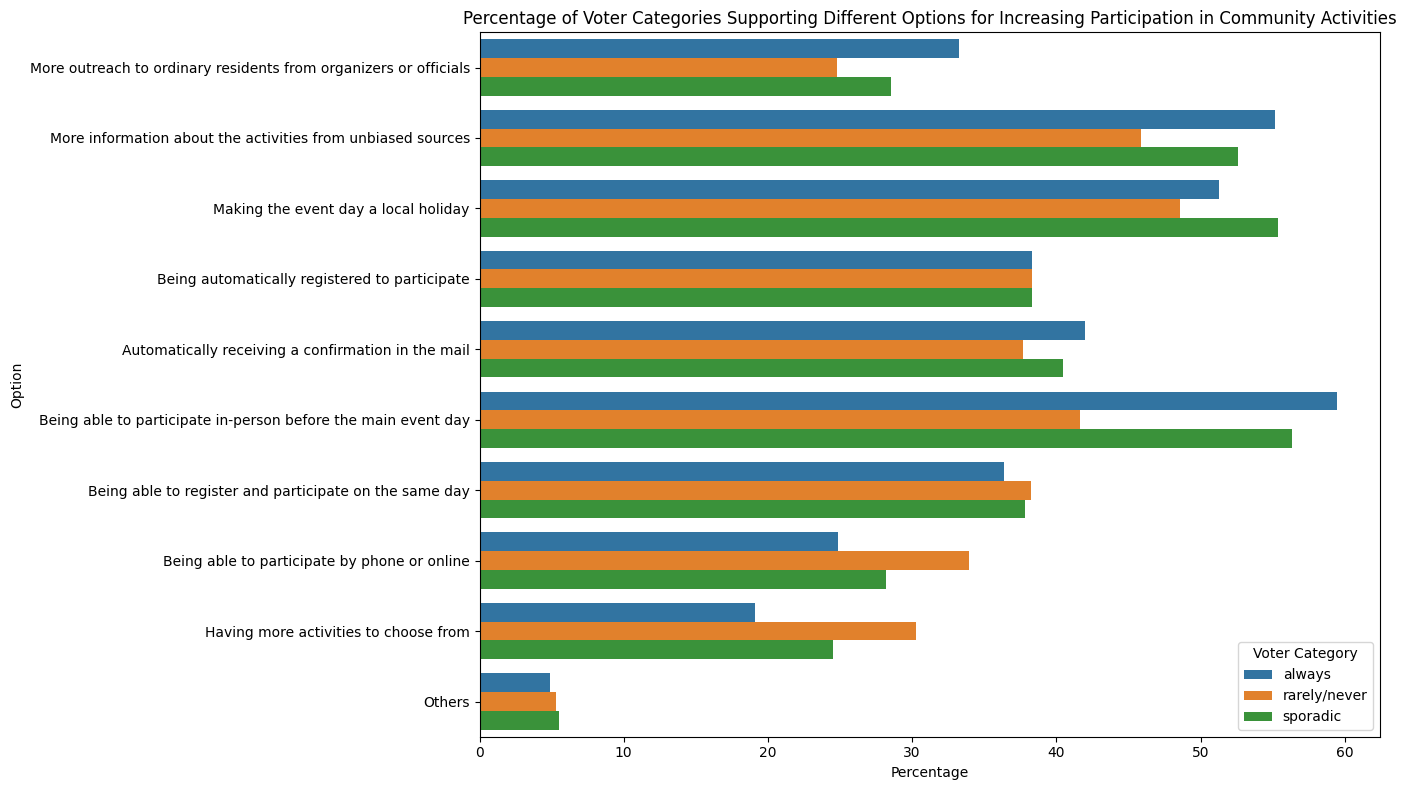

In [53]:
# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Percentage', y='Option', hue='voter_category', data=q17_summary_long, orient='h')

# Add title and labels
plt.title('Percentage of Voter Categories Supporting Different Options for Increasing Participation in Community Activities')
plt.xlabel('Percentage')
plt.ylabel('Option')

# Display the plot
plt.legend(title='Voter Category')
plt.tight_layout()
plt.show()

EDA Question 5 - How well organised the voting process is and if it is well organised then why some finding it difficult? Who all are finding it difficult?  Inspect with age, gender, weight, race




In [54]:
convenience = {
    1: 'very easy',
    2: 'somewhat easy',
    3: 'somewhat difficult',
    4: 'very difficult',
    -1: 'No comments'

}
df_cleaned['Q14'] = df_cleaned['Q14'].replace(convenience)

In [55]:
df_cleaned['Q10_1'].unique()

array([ 2,  1, -1])

In [56]:
import pandas as pd

# Replace Yes/No answers in Q16_1 to Q16_10 and Q10_1 to Q10_4 with 1/0
q16_columns = ['Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9', 'Q16_10']
q10_columns = ['Q10_1', 'Q10_2', 'Q10_3', 'Q10_4']
q16_issues = {
    'Q16_1': 'Was told they did not have the correct identification',
    'Q16_2': 'Could not find the polling place',
    'Q16_3': 'Missed the registration deadline',
    'Q16_4': 'Was unable to physically access the event location',
    'Q16_5': 'Could not obtain necessary assistance to participate',
    'Q16_6': 'Had to participate provisionally',
    'Q16_7': 'Couldn’t get off work to attend when the event was open',
    'Q16_8': 'Waited in line to participate for more than an hour',
    'Q16_9': 'Was told name was not on the list even though they were registered',
    'Q16_10': 'Did not receive absentee or mail-in confirmation in time'
}
q10_means = {'Q10_1':'Receiving long-term disability',
'Q10_2':'Having a chronic illness',
'Q10_3':'Been unemployed for more than a year',
'Q10_4':'Have been evicted from company-provided housing within the past year'
}


df_cleaned[q16_columns] = df_cleaned[q16_columns].replace({1: 1, 2: 0})
df_cleaned[q10_columns] = df_cleaned[q10_columns].replace({1: 1, 2: 0})

# Group by Q14 (voting difficulty)
difficulty_groups = df_cleaned.groupby('Q14')

# Summarize the number of issues faced for each difficulty level in voting (Q16_1 to Q16_10)
q16_summary = difficulty_groups[q16_columns].sum()
q16_summary = q16_summary.rename(columns=q16_issues)
# Summarize the demographic and challenge data (Q10_1 to Q10_4) for each difficulty level
q10_summary = difficulty_groups[q10_columns].sum()
q10_summary = q10_summary.rename(columns=q10_means)

# Combine the summaries for easier interpretation
#combined_summary = pd.concat([q16_summary, q10_summary], axis=1)

# Analyze the relationship between Q14 and demographic factors
age_summary = difficulty_groups['age'].mean()  # Example: Analyze the average age for each difficulty level

# Display the summary
print("Summary of Issues Faced by Voting Difficulty (Q14):")
#print(combined_summary)

print("\nAverage Age by Voting Difficulty (Q14):")
print(age_summary)


Summary of Issues Faced by Voting Difficulty (Q14):

Average Age by Voting Difficulty (Q14):
Q14
No comments           48.500000
somewhat difficult    47.179416
somewhat easy         48.200443
very difficult        47.030675
very easy             55.087646
Name: age, dtype: float64


In [57]:
import pandas as pd

# Replace Yes/No answers in Q16_1 to Q16_10 and Q10_1 to Q10_4 with 1/0
q16_columns = ['Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9', 'Q16_10']
q10_columns = ['Q10_1', 'Q10_2', 'Q10_3', 'Q10_4']
q16_issues = {
    'Q16_1': 'Was told they did not have the correct identification',
    'Q16_2': 'Could not find the polling place',
    'Q16_3': 'Missed the registration deadline',
    'Q16_4': 'Was unable to physically access the event location',
    'Q16_5': 'Could not obtain necessary assistance to participate',
    'Q16_6': 'Had to participate provisionally',
    'Q16_7': 'Couldn’t get off work to attend when the event was open',
    'Q16_8': 'Waited in line to participate for more than an hour',
    'Q16_9': 'Was told name was not on the list even though they were registered',
    'Q16_10': 'Did not receive absentee or mail-in confirmation in time'
}
q10_means = {
    'Q10_1': 'Receiving long-term disability',
    'Q10_2': 'Having a chronic illness',
    'Q10_3': 'Been unemployed for more than a year',
    'Q10_4': 'Have been evicted from company-provided housing within the past year'
}

# Replace Yes/No answers with 1/0
df_cleaned[q16_columns] = df_cleaned[q16_columns].replace({1: 1, 2: 0,-1: 0})
df_cleaned[q10_columns] = df_cleaned[q10_columns].replace({1: 1, 2: 0, -1: 0})

# Group by Q14 (voting difficulty)
difficulty_groups = df_cleaned.groupby('Q14')

# Calculate the total number of individuals with each issue in the entire dataset
total_q10_issues = df_cleaned[q10_columns].sum()

# Summarize the number of issues faced for each difficulty level in voting (Q16_1 to Q16_10)
q16_summary = difficulty_groups[q16_columns].sum()
q16_summary = q16_summary.rename(columns=q16_issues)

# Summarize the demographic and challenge data (Q10_1 to Q10_4) for each difficulty level
q10_summary = difficulty_groups[q10_columns].sum()
q10_summary = q10_summary.rename(columns=q10_means)

# Calculate the percentage of individuals with each issue who find voting difficult
q10_percentage_summary = q10_summary.div(total_q10_issues, axis=1) * 100

# Combine the summaries for easier interpretation
combined_summary = pd.concat([q16_summary, q10_percentage_summary], axis=1)

# Analyze the relationship between Q14 and demographic factors
age_summary = difficulty_groups['age'].mean()  # Example: Analyze the average age for each difficulty level

# Display the summary
print("Summary of Issues Faced by Voting Difficulty (Q14):")
print(combined_summary)

print("\nAverage Age by Voting Difficulty (Q14):")
print(age_summary)


Summary of Issues Faced by Voting Difficulty (Q14):
                    Was told they did not have the correct identification  \
Q14                                                                         
No comments                                                         0       
somewhat difficult                                                 52       
somewhat easy                                                      52       
very difficult                                                     15       
very easy                                                          46       

                    Could not find the polling place  \
Q14                                                    
No comments                                        0   
somewhat difficult                                77   
somewhat easy                                     95   
very difficult                                    29   
very easy                                         85   

               

In [58]:
q10_summary

Receiving long-term disability  Having a chronic illness  \
Q14                                                                            
No comments                                      5                        15   
somewhat difficult                              79                       172   
somewhat easy                                  151                       363   
very difficult                                  25                        46   
very easy                                      209                       582   

                    Been unemployed for more than a year  \
Q14                                                        
No comments                                           11   
somewhat difficult                                   152   
somewhat easy                                        305   
very difficult                                        39   
very easy                                            473   

                    Have been evicted from company-provided housing within the past year  
Q14                                                                                       
No comments                                                         1                     
somewhat difficult                                                 10                     
somewhat easy                                                      13                     
very difficult                                                      7                     
very easy                                                           5

In [59]:
q10_summary

Receiving long-term disability  Having a chronic illness  \
Q14                                                                            
No comments                                      5                        15   
somewhat difficult                              79                       172   
somewhat easy                                  151                       363   
very difficult                                  25                        46   
very easy                                      209                       582   

                    Been unemployed for more than a year  \
Q14                                                        
No comments                                           11   
somewhat difficult                                   152   
somewhat easy                                        305   
very difficult                                        39   
very easy                                            473   

                    Have been evicted from company-provided housing within the past year  
Q14                                                                                       
No comments                                                         1                     
somewhat difficult                                                 10                     
somewhat easy                                                      13                     
very difficult                                                      7                     
very easy                                                           5

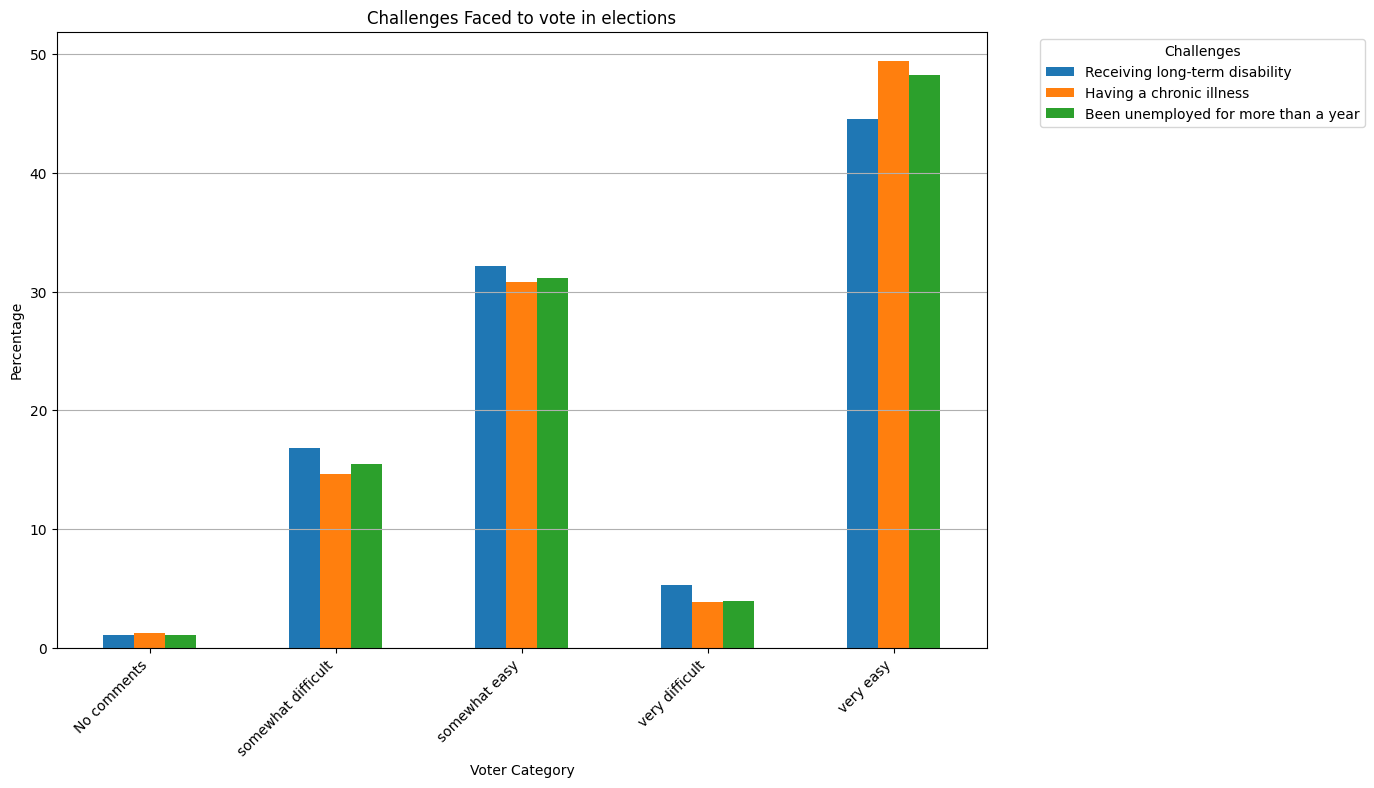

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame for the Q10_summary
data = {
    'Voter Category': ['No comments', 'somewhat difficult', 'somewhat easy', 'very difficult', 'very easy'],
    'Receiving long-term disability': [1.06, 16.84, 32.19, 5.33, 44.56],
    'Having a chronic illness': [1.27, 14.60, 30.81, 3.90, 49.40],
    'Been unemployed for more than a year': [1.12, 15.51, 31.11, 3.97, 48.26],
    #'Have been evicted from company-provided housing within the past year': [2.77, 27.77, 36.11, 19.44, 13.88]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Set the Voter Category as the index
df.set_index('Voter Category', inplace=True)

# Plotting the clustered bar chart
df.plot(kind='bar', figsize=(12, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.title('Challenges Faced to vote in elections')
plt.xlabel('Voter Category')
plt.ylabel('Percentage')
plt.legend(title='Challenges', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.show()


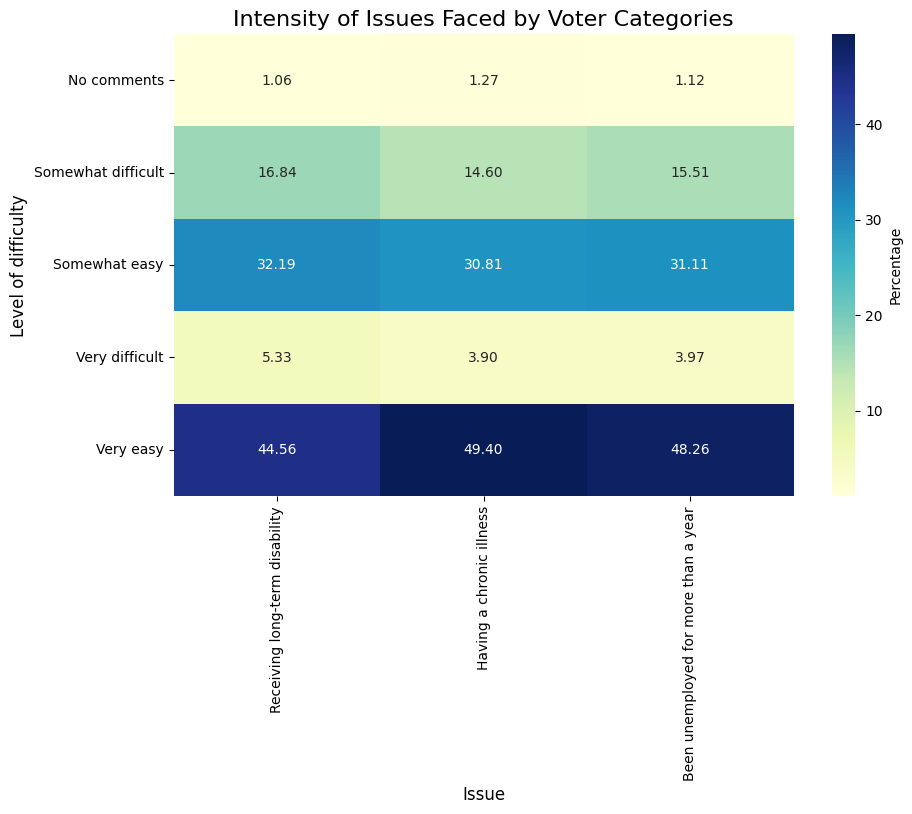

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame for the Q10_summary
data = {
    'Voter Category': ['No comments', 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy'],
    'Receiving long-term disability': [1.06, 16.84, 32.19, 5.33, 44.56],
    'Having a chronic illness': [1.27, 14.60, 30.81, 3.90, 49.40],
    'Been unemployed for more than a year': [1.12, 15.51, 31.11, 3.97, 48.26],
    #'Have been evicted from company-provided housing within the past year': [2.77, 27.77, 36.11, 19.44, 13.88]
}

df = pd.DataFrame(data)

# Set 'Voter Category' as the index
df.set_index('Voter Category', inplace=True)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Percentage'})

# Set the title and labels
plt.title('Intensity of Issues Faced by Voter Categories', fontsize=16)
plt.xlabel('Issue', fontsize=12)
plt.ylabel('Level of difficulty', fontsize=12)

# Show the plot
plt.show()


In [62]:
age_summary

Q14
No comments           48.500000
somewhat difficult    47.179416
somewhat easy         48.200443
very difficult        47.030675
very easy             55.087646
Name: age, dtype: float64

What people thinking of different kind of governance and how the responses are different among people who think many changes are requeired compared to those who think not much change is required

In [63]:
# Replace the response options with meaningful labels
management_mapping = {
    1: 'Very good way of managing the community',
    2: 'Fairly good way of managing the community',
    3: 'Fairly bad way of managing the community',
    4: 'Very bad way of managing the community'
}

# Apply the mapping to the relevant columns
df_cleaned['Q9_1'] = df_cleaned['Q9_1'].map(management_mapping)
df_cleaned['Q9_2'] = df_cleaned['Q9_2'].map(management_mapping)
df_cleaned['Q9_3'] = df_cleaned['Q9_3'].map(management_mapping)
df_cleaned['Q9_4'] = df_cleaned['Q9_4'].map(management_mapping)

# Map Q7 responses
df_cleaned['Q7'] = df_cleaned['Q7'].map({
    1: 'A lot of changes are needed',
    2: 'Not Many changes needed'
})

In [64]:
questions = {
    'Q9_1': 'Having a democratic process',
    'Q9_2': 'Having experts, not elected representatives',
    'Q9_3': 'Having a strong leader no election',
    'Q9_4': 'Having the security team rule'
}

In [65]:
# Calculate percentages for voters and non-voters
percentage_tables_voters = {}
for col in questions.keys():
    contingency_table = pd.crosstab(df_cleaned[voter_category], df_cleaned[col], normalize='index') * 100
    percentage_tables_voters[col] = contingency_table
# Display percentage tables for voters and non-voters with descriptions
for col, description in questions.items():
    print(f'\nPercentage Table for {description} (Voter Categories):')
    print(percentage_tables_voters[col])



Percentage Table for Having a democratic process (Voter Categories):
Q9_1            Fairly bad way of managing the community  \
voter_category                                             
always                                          2.611111   
rarely/never                                   11.473088   
sporadic                                        4.352941   

Q9_1            Fairly good way of managing the community  \
voter_category                                              
always                                          31.333333   
rarely/never                                    44.263456   
sporadic                                        34.509804   

Q9_1            Very bad way of managing the community  \
voter_category                                           
always                                        1.333333   
rarely/never                                  5.382436   
sporadic                                      1.921569   

Q9_1            Very good way of

In [66]:
# Calculate percentages for those who think many changes are needed vs. those who don't
percentage_tables_changes = {}
for col in questions.keys():
    contingency_table = pd.crosstab(df_cleaned['Q7'], df_cleaned[col], normalize='index') * 100
    percentage_tables_changes[col] = contingency_table
# Display percentage tables for those who think many changes are needed vs. those who don't with descriptions
for col, description in questions.items():
    print(f'\nPercentage Table for {description} (Changes Needed):')
    print(percentage_tables_changes[col])



Percentage Table for Having a democratic process (Changes Needed):
Q9_1                         Fairly bad way of managing the community  \
Q7                                                                      
A lot of changes are needed                                  6.032432   
Not Many changes needed                                      3.539020   

Q9_1                         Fairly good way of managing the community  \
Q7                                                                       
A lot of changes are needed                                  38.032432   
Not Many changes needed                                      27.132486   

Q9_1                         Very bad way of managing the community  \
Q7                                                                    
A lot of changes are needed                                2.637838   
Not Many changes needed                                    2.268603   

Q9_1                         Very good way of managing th

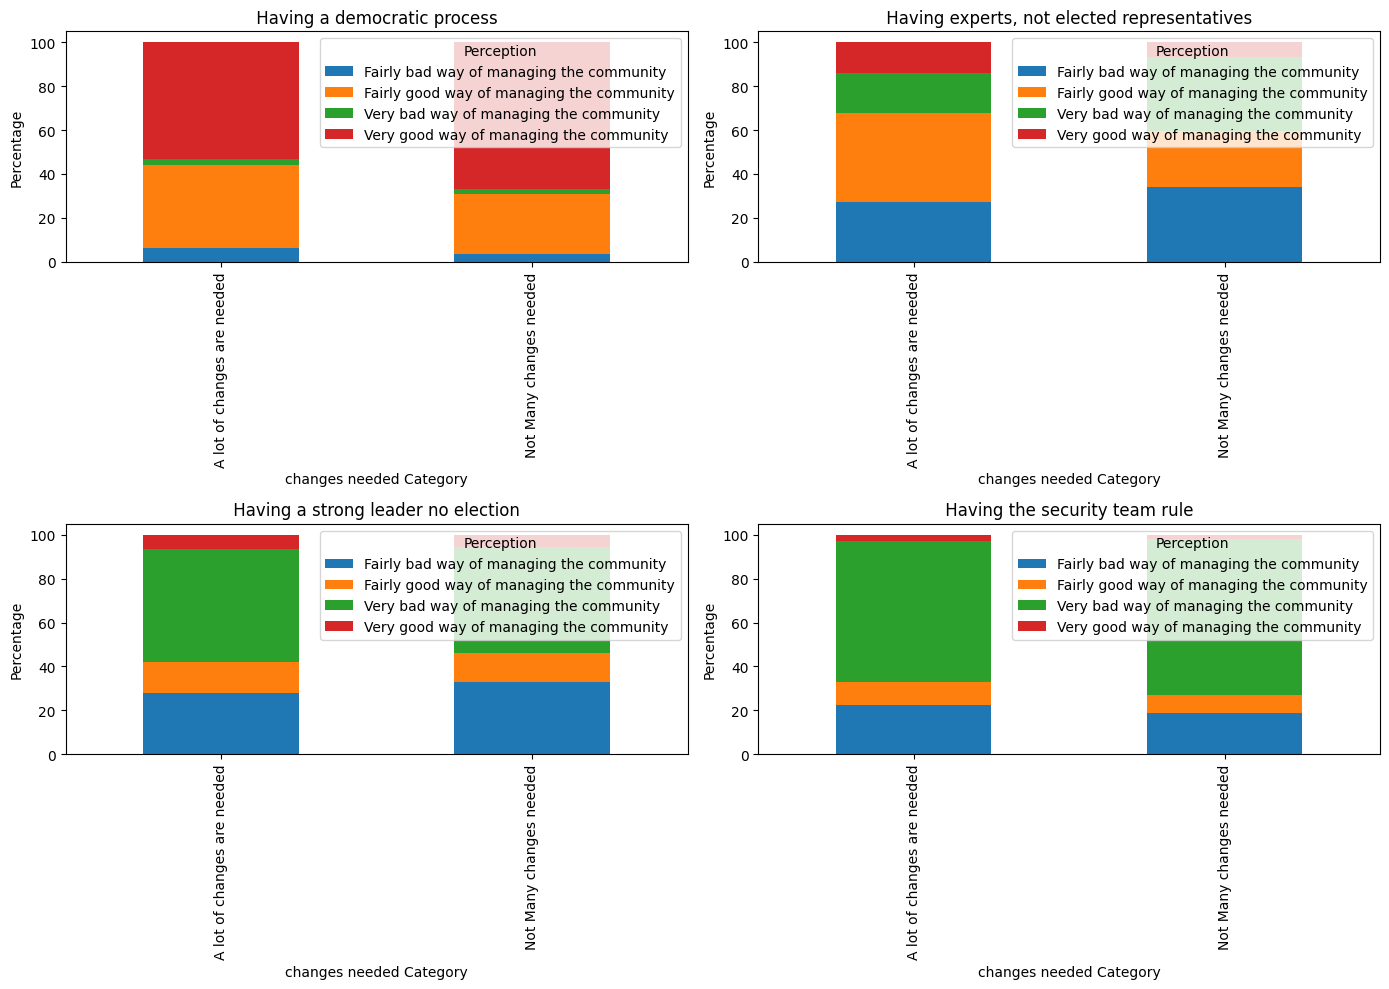

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization for Q9_1 to Q9_4 based on voter category
plt.figure(figsize=(14, 10))

for i, (col, description) in enumerate(questions.items()):
    plt.subplot(2, 2, i+1)
    percentage_table = percentage_tables_changes[col]
    percentage_table.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f' {description} ')
    plt.ylabel('Percentage')
    plt.xlabel('changes needed Category')
    plt.legend(title='Perception', loc='upper right')

plt.tight_layout()
plt.show()


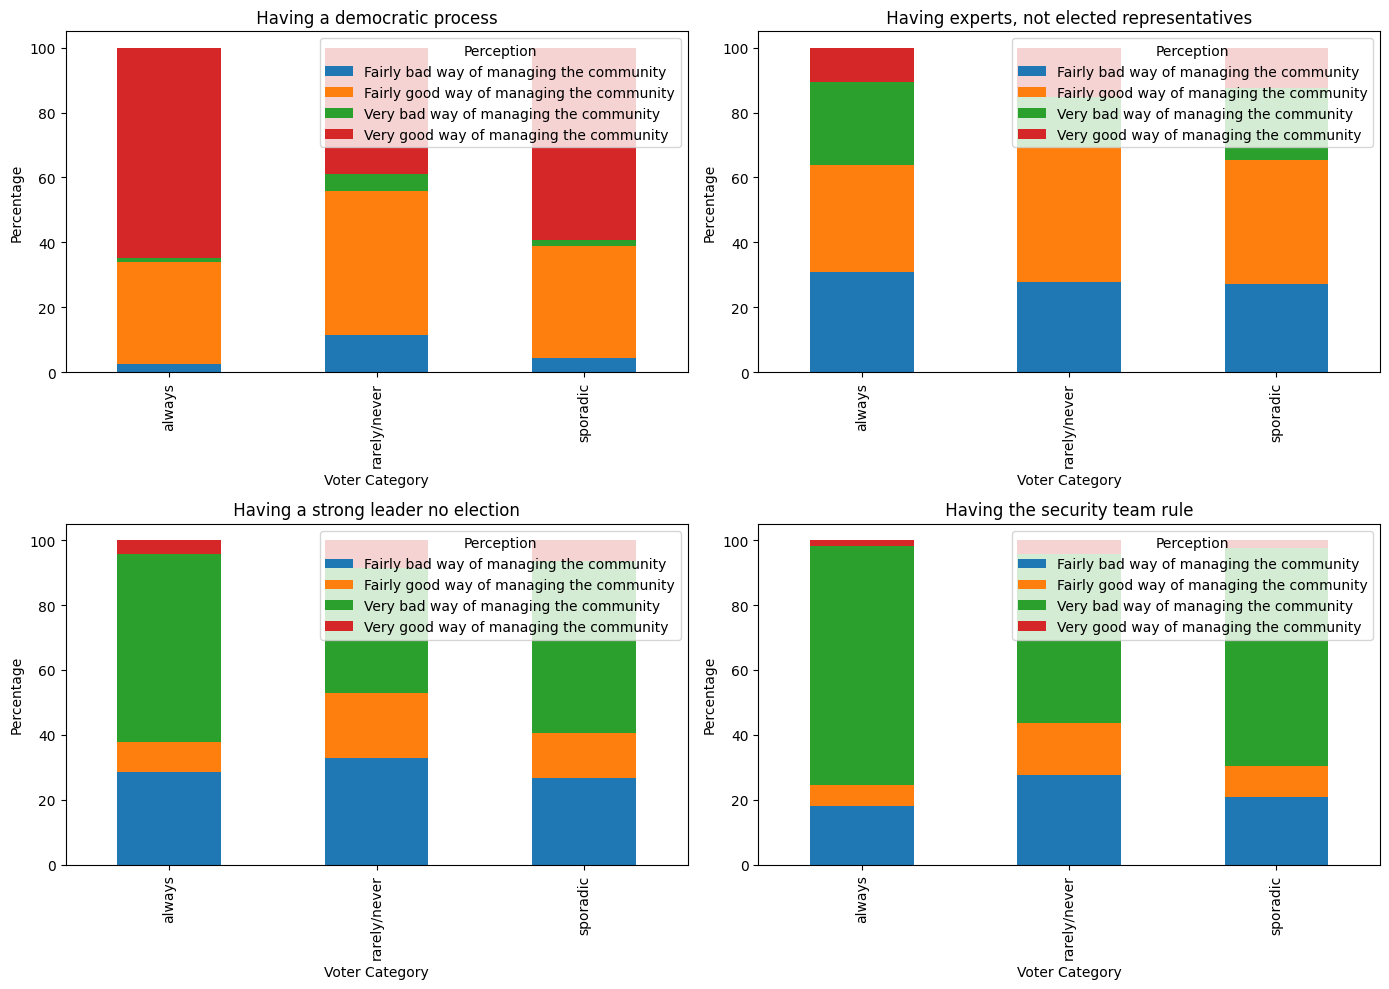

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization for Q9_1 to Q9_4 based on voter category
plt.figure(figsize=(14, 10))

for i, (col, description) in enumerate(questions.items()):
    plt.subplot(2, 2, i+1)
    percentage_table = percentage_tables_voters[col]
    percentage_table.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f' {description} ')
    plt.ylabel('Percentage')
    plt.xlabel('Voter Category')
    plt.legend(title='Perception', loc='upper right')

plt.tight_layout()
plt.show()


In [69]:
'''chi_square_results_voters = {}
for col, table in contingency_tables_voters.items():
    chi2, p, dof, ex = chi2_contingency(table)
    chi_square_results_voters[col] = p

chi_square_results_changes = {}
for col, table in contingency_tables_changes.items():
    chi2, p, dof, ex = chi2_contingency(table)
    chi_square_results_changes[col] = p'''


'chi_square_results_voters = {}\nfor col, table in contingency_tables_voters.items():\n    chi2, p, dof, ex = chi2_contingency(table)\n    chi_square_results_voters[col] = p\n\nchi_square_results_changes = {}\nfor col, table in contingency_tables_changes.items():\n    chi2, p, dof, ex = chi2_contingency(table)\n    chi_square_results_changes[col] = p'

In [70]:
#chi_square_results_voters

In [71]:
#chi_square_results_changes

In [72]:
df_cleaned

RespId  weight  age            Education         race  gender  \
0     470001  0.7516   73              College        White  Female   
1     470002  1.0267   90              College        White  Female   
2     470003  1.0844   53              College        White    Male   
3     470007  0.6817   58         Some college        Black  Female   
4     480008  0.9910   81  High school or less        White    Male   
...      ...     ...  ...                  ...          ...     ...   
5831  477662  1.1916   27         Some college     Hispanic    Male   
5832  477663  1.4623   59  High school or less        White  Female   
5833  488322  0.9252   51              College  Other/Mixed    Male   
5834  488325  2.6311   22  High school or less        Black  Female   
5835  477666  1.6218   22  High school or less        Black  Female   

          income_cat voter_category  Q1  Q2_1  ...  Q26_1  Q26_2  Q26_3  \
0           $75-125k         always   1     1  ...    1.0    1.0    1.0   
1      $125k or more         always   1     1  ...    1.0   -1.0   -1.0   
2      $125k or more       sporadic   1     1  ...    1.0   -1.0   -1.0   
3            $40-75k       sporadic   1     1  ...    1.0    1.0   -1.0   
4            $40-75k         always   1     1  ...    1.0    1.0    1.0   
...              ...            ...  ..   ...  ...    ...    ...    ...   
5831         $40-75k         always   1     1  ...    1.0    1.0    1.0   
5832   $125k or more   rarely/never   1     1  ...    1.0   -1.0    1.0   
5833   $125k or more       sporadic   1     1  ...    1.0    1.0    1.0   
5834  Less than $40k         always   1     2  ...   -1.0   -1.0   -1.0   
5835  Less than $40k         always   1     1  ...    1.0    1.0   -1.0   

      Q26_4  Q26_5  Q26_6  Q26_7  Q26_8  age_binned         Q17_combined  
0       1.0   -1.0   -1.0    1.0   -1.0       71-80        3, 4, 5, 6, 7  
1      -1.0   -1.0    1.0   -1.0   -1.0      91-100                    2  
2      -1.0   -1.0   -1.0    1.0   -1.0       51-60           2, 4, 8, 9  
3       1.0   -1.0   -1.0   -1.0   -1.0       51-60             3, 8, 10  
4      -1.0    1.0   -1.0    1.0   -1.0       81-90                       
...     ...    ...    ...    ...    ...         ...                  ...  
5831    1.0    1.0   -1.0   -1.0   -1.0       19-30  1, 3, 4, 5, 6, 7, 8  
5832   -1.0    1.0   -1.0   -1.0   -1.0       51-60                 1, 2  
5833    1.0    1.0   -1.0   -1.0   -1.0       51-60  1, 2, 3, 4, 5, 6, 7  
5834   -1.0   -1.0   -1.0    1.0   -1.0       19-30                    4  
5835   -1.0   -1.0   -1.0    1.0   -1.0       19-30        1, 2, 5, 6, 8  

[5836 rows x 106 columns]

In [73]:

# Filter non-voters
non_voters = df_cleaned[df_cleaned['voter_category'].isin(['rarely/never', 'sporadic'])]


# Group non-voters by their perception of needed changes
grouped_non_voters = non_voters.groupby('Q7')

In [74]:
# Cross-tabulation tables for non-voters based on changes needed
cross_tab_non_voters = {}
for col in ['Q9_1', 'Q9_2', 'Q9_3', 'Q9_4']:
    cross_tab_non_voters[col] = pd.crosstab(non_voters['Q7'], non_voters[col], margins=True, normalize='index')*100


In [75]:
cross_tab_non_voters

{'Q9_1': Q9_1                         Fairly bad way of managing the community  \
 Q7                                                                      
 A lot of changes are needed                                  7.371307   
 Not Many changes needed                                      4.414003   
 All                                                          6.878173   
 
 Q9_1                         Fairly good way of managing the community  \
 Q7                                                                       
 A lot of changes are needed                                  39.658849   
 Not Many changes needed                                      29.528158   
 All                                                          37.969543   
 
 Q9_1                         Very bad way of managing the community  \
 Q7                                                                    
 A lot of changes are needed                                3.198294   
 Not Many changes needed   

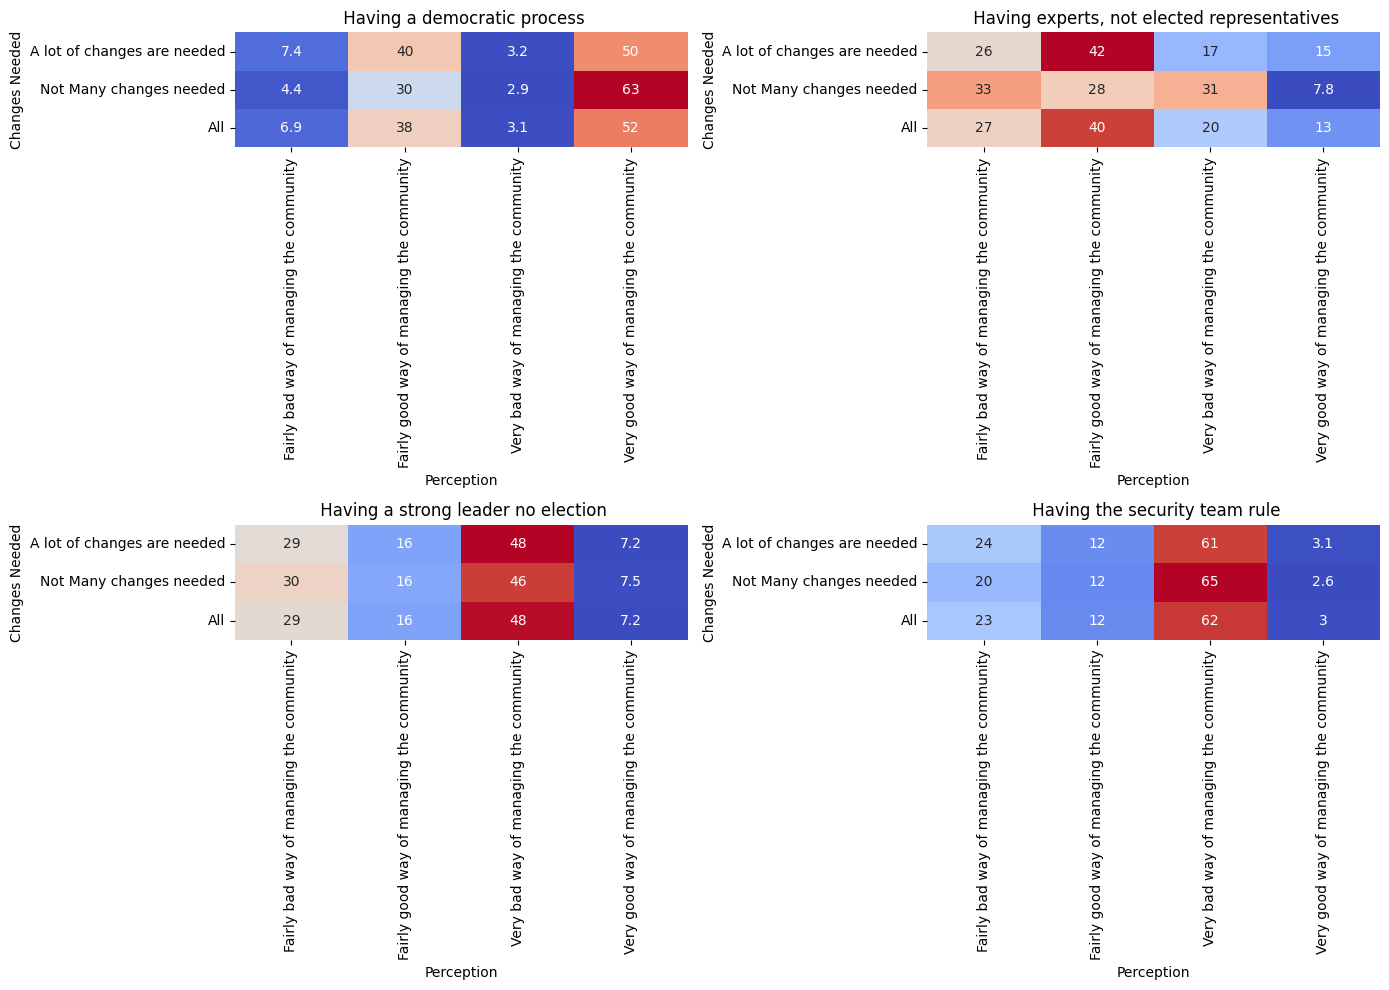

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization for Q9_1 to Q9_4 based on changes needed among non-voters
plt.figure(figsize=(14, 10))

for i, (col, description) in enumerate(questions.items()):
    plt.subplot(2, 2, i+1)
    sns.heatmap(cross_tab_non_voters[col], annot=True, cmap='coolwarm', cbar=False)
    plt.title(f' {description}')
    plt.xlabel('Perception')
    plt.ylabel('Changes Needed')

plt.tight_layout()
plt.show()


In [77]:

# Filter voters
voters_peeps = df_cleaned[df_cleaned['voter_category'].isin(['always'])]


# Group non-voters by their perception of needed changes
grouped_voters = voters_peeps.groupby('Q7')
grouped_voters.value_counts()

Q7                           RespId  weight  age  Education            race   gender  income_cat      voter_category  Q1  Q2_1  Q2_2  Q2_3  Q2_4  Q2_5  Q2_6  Q2_7  Q2_8  Q2_9  Q2_10  Q3_1               Q3_2               Q3_3               Q3_4               Q3_5               Q3_6               Q4_1  Q4_2  Q4_3  Q4_4  Q4_5  Q4_6  Q5  Q6  Q8_1      Q8_2        Q8_3  Q8_4  Q8_5  Q8_6  Q8_7  Q8_8  Q8_9  Q9_1                                       Q9_2                                       Q9_3                                       Q9_4                                       Q10_1  Q10_2  Q10_3  Q10_4  Q11_1  Q11_2  Q11_3  Q11_4  Q11_5  Q11_6  Q12                                      Q13                                              Q14                 Q15_1  Q15_2  Q15_3  Q15_4  Q16_1  Q16_2  Q16_3  Q16_4  Q16_5  Q16_6  Q16_7  Q16_8  Q16_9  Q16_10  Q17_1  Q17_2  Q17_3  Q17_4  Q17_5  Q17_6  Q17_7  Q17_8  Q17_9  Q17_10  Q18  Q19  Q21  Q22  Q23  Q24                                                  Q25_1  Q25_2  Q25_3  Q25_4  Q25_5  Q25_6  Q26_1  Q26_2  Q26_3  Q26_4  Q26_5  Q26_6  Q26_7  Q26_8  age_binned  Q17_combined 
A lot of changes are needed  470001  0.7516  73   College              White  Female  $75-125k        always          1   1     1     2     4     1     4     2     2     4     2      Strongly agree     Strongly agree     Strongly disagree  Strongly disagree  Somewhat disagree  Somewhat agree     2     1     2     2     2     2     1   2   not much  not at all  2     1     1     1     1     2      4    Fairly good way of managing the community  Fairly good way of managing the community  Very bad way of managing the community     Very bad way of managing the community     0      0      0      0      2      2      2      2      2      2      Does not want votes and prevents voting  Works hard to earn votes                         very easy           1      1      1      3      0      0      0      0      0      0      0      0      0      0       0      0      1      1      1      1      1      0      0      0       1    1    2    1    1    I always, or almost always, vote in union elections  1      1      1      1      1      1      1.0     1.0    1.0    1.0   -1.0   -1.0    1.0   -1.0   71-80       3, 4, 5, 6, 7    1
                             477054  1.1441  67   High school or less  White  Female  $40-75k         always          1   1     1     2     1     1     1     1     1     1     4      Somewhat disagree  Strongly disagree  Strongly agree     Somewhat agree     Somewhat agree     Somewhat disagree  3     2     2     3     1     1     1   3   some      not much    3     3     3     2     3     1      3    Very good way of managing the community    Fairly bad way of managing the community   Fairly good way of managing the community  Fairly good way of managing the community  0      0      1      0      2      2      2      2      2      2      Works hard to earn votes                 Does not want votes and prevents voting          somewhat difficult  3      2      4      3      0      0      0      0      0      0      0      0      0      0       1      1      0      0      0      0      0      0      0      0       1    1    1    3    3    I always, or almost always, vote in union elections  1      1      1      1      1      1      1.0    -1.0    1.0    1.0    1.0   -1.0    1.0   -1.0   61-70       1, 2             1
                             477118  0.6647  62   Some college         Black  Female  $125k or more   always          1   1     1     1     2     1     1     1     1     1     1      Strongly agree     Strongly agree     Somewhat disagree  Somewhat agree     Somewhat disagree  Somewhat agree     1     1     1     3     1     2     1   2   some      some        2     1     2     2     2     2      2    Very good way of managing the community    Very good way of managing the community    Fairly good way of managing the community  Fairly good way of managing the community  0      0      0      0    

In [78]:
voters_peeps['Q7'].unique()

array(['A lot of changes are needed', 'Not Many changes needed', nan],
      dtype=object)

In [79]:
# Cross-tabulation tables for non-voters based on changes needed
cross_tab_voters = {}
for col in ['Q9_1', 'Q9_2', 'Q9_3', 'Q9_4']:
    cross_tab_voters[col] = pd.crosstab(voters_peeps['Q7'], voters_peeps[col], margins=True, normalize='index')*100


In [80]:
cross_tab_voters

{'Q9_1': Q9_1                         Fairly bad way of managing the community  \
 Q7                                                                      
 A lot of changes are needed                                  2.757079   
 Not Many changes needed                                      2.247191   
 All                                                          2.630106   
 
 Q9_1                         Fairly good way of managing the community  \
 Q7                                                                       
 A lot of changes are needed                                  34.053651   
 Not Many changes needed                                      23.595506   
 All                                                          31.449356   
 
 Q9_1                         Very bad way of managing the community  \
 Q7                                                                    
 A lot of changes are needed                                1.266766   
 Not Many changes needed   

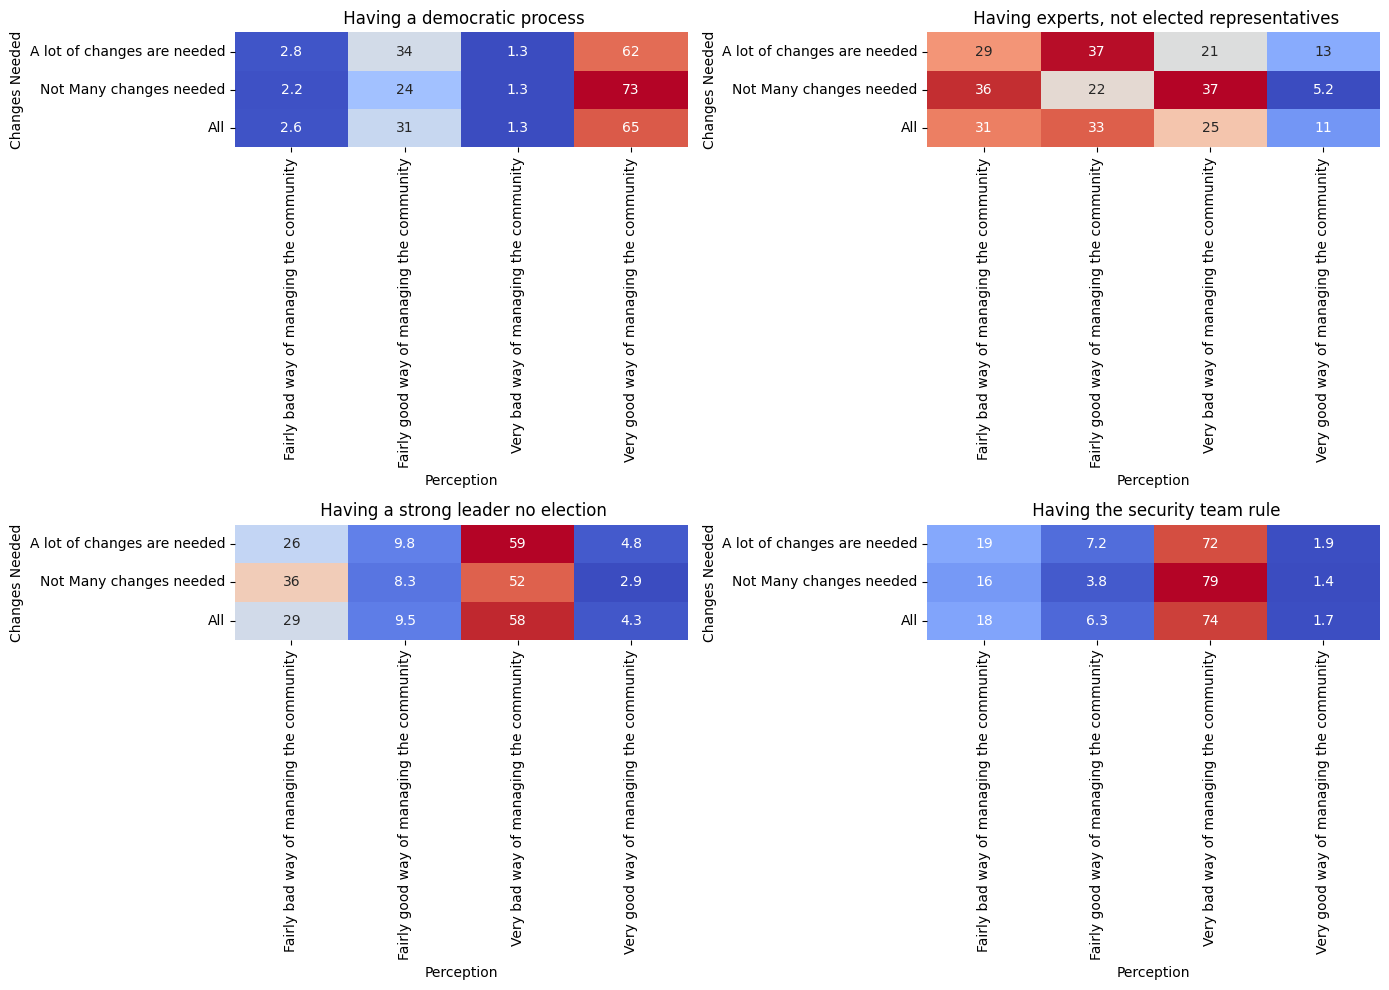

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization for Q9_1 to Q9_4 based on changes needed among non-voters
plt.figure(figsize=(14, 10))

for i, (col, description) in enumerate(questions.items()):
    plt.subplot(2, 2, i+1)
    sns.heatmap(cross_tab_voters[col], annot=True, cmap='coolwarm', cbar=False)
    plt.title(f' {description}')
    plt.xlabel('Perception')
    plt.ylabel('Changes Needed')

plt.tight_layout()
plt.show()

Does the perception of "who wins the election matters" drive voter turnout?

In [82]:
# Replace the response options with meaningful labels for Q5
election_impact_mapping = {
    1: 'Who wins the election really matters',
    2: 'Things will be pretty much the same'
}

# Apply the mapping to Q5
df_cleaned['Q5'] = df_cleaned['Q5'].map(election_impact_mapping)

# Create a cross-tabulation table
cross_tab_voting_impact = pd.crosstab(df_cleaned['voter_category'], df_cleaned['Q5'], margins=True, normalize='index')*100

# Display the cross-tabulation table
cross_tab_voting_impact

Q5              Things will be pretty much the same  \
voter_category                                        
always                                     9.196676   
rarely/never                              33.054976   
sporadic                                  13.811939   
All                                       17.140396   

Q5              Who wins the election really matters  
voter_category                                        
always                                     90.803324  
rarely/never                               66.945024  
sporadic                                   86.188061  
All                                        82.859604

In [83]:
# Create a cross-tabulation table
cross_tab_voting_impact = pd.crosstab(df_cleaned['voter_category'], df_cleaned['Q5'], margins=True, normalize='index')*100

# Display the cross-tabulation table
cross_tab_voting_impact

Q5              Things will be pretty much the same  \
voter_category                                        
always                                     9.196676   
rarely/never                              33.054976   
sporadic                                  13.811939   
All                                       17.140396   

Q5              Who wins the election really matters  
voter_category                                        
always                                     90.803324  
rarely/never                               66.945024  
sporadic                                   86.188061  
All                                        82.859604

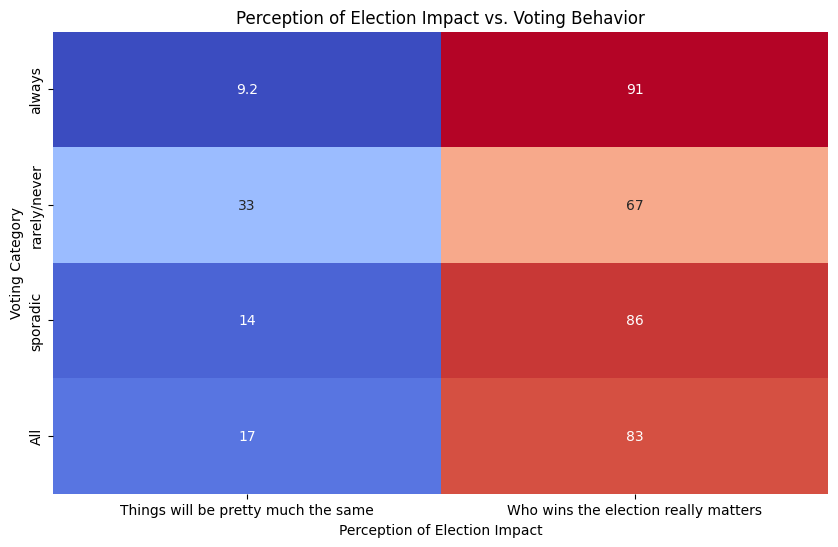

In [84]:
# Visualization for election impact perception vs. voting behavior
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_voting_impact, annot=True, cmap='coolwarm', cbar=False)
plt.title('Perception of Election Impact vs. Voting Behavior')
plt.xlabel('Perception of Election Impact')
plt.ylabel('Voting Category')
plt.show()



If everyone thinks that "who wins election really matters" than why some still do not vote is it because people do not trust in  less voters :- High school or less, hispanic,81-90

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv('your_dataset.csv')

# Define mappings for Q15_1 to Q15_4 responses
confidence_mapping = {
    1: 'Very confident',
    2: 'Somewhat confident',
    3: 'Not very confident',
    4: 'Not at all confident'
}

# Apply the mapping to Q15_1 to Q15_4
df_cleaned['Q15_1'] = df_cleaned['Q15_1'].map(confidence_mapping)
df_cleaned['Q15_2'] = df_cleaned['Q15_2'].map(confidence_mapping)
df_cleaned['Q15_3'] = df_cleaned['Q15_3'].map(confidence_mapping)
df_cleaned['Q15_4'] = df_cleaned['Q15_4'].map(confidence_mapping)


In [86]:
non_voters = df_cleaned[df_cleaned['voter_category'].isin(['rarely/never', 'sporadic','always'])]
# Cross-tabulations for confidence in voting methods among non-voters
cross_tab_Q15_1 = pd.crosstab(non_voters['Q15_1'], non_voters['voter_category'], margins=True, normalize='index')*100
cross_tab_Q15_2 = pd.crosstab(non_voters['Q15_2'], non_voters['voter_category'], margins=True, normalize='index')*100
cross_tab_Q15_3 = pd.crosstab(non_voters['Q15_3'], non_voters['voter_category'], margins=True, normalize='index')*100
cross_tab_Q15_4 = pd.crosstab(non_voters['Q15_4'], non_voters['voter_category'], margins=True, normalize='index')*100


<Figure size 1000x600 with 0 Axes>

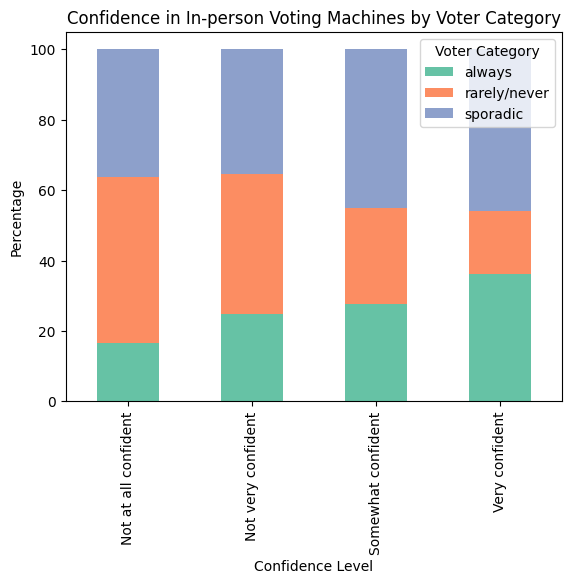

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization for In-person Voting Machines
plt.figure(figsize=(10, 6))
cross_tab_Q15_1.drop('All', axis=0).plot(kind='bar', stacked=True, color=sns.color_palette("Set2"))

plt.title('Confidence in In-person Voting Machines by Voter Category')
plt.xlabel('Confidence Level')
plt.ylabel('Percentage')
plt.legend(title='Voter Category')
plt.show()


<Figure size 1000x600 with 0 Axes>

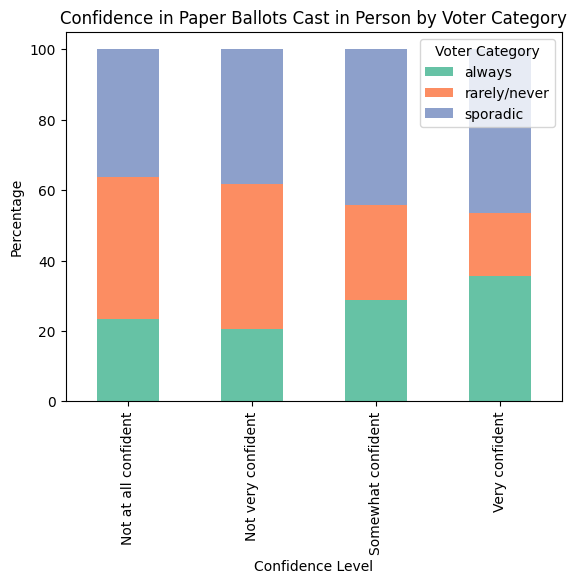

In [88]:
# Visualization for Paper Ballots Cast in Person
plt.figure(figsize=(10, 6))
cross_tab_Q15_2.drop('All', axis=0).plot(kind='bar', stacked=True, color=sns.color_palette("Set2"))

plt.title('Confidence in Paper Ballots Cast in Person by Voter Category')
plt.xlabel('Confidence Level')
plt.ylabel('Percentage')
plt.legend(title='Voter Category')
plt.show()


<Figure size 1000x600 with 0 Axes>

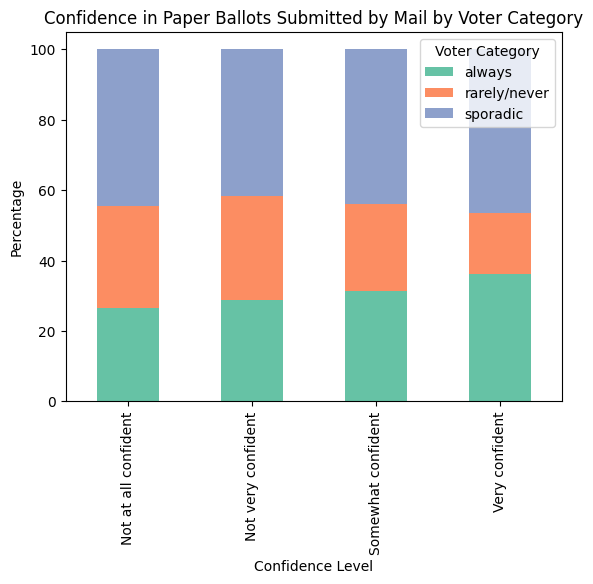

In [89]:
# Visualization for Paper Ballots Submitted by Mail
plt.figure(figsize=(10, 6))
cross_tab_Q15_3.drop('All', axis=0).plot(kind='bar', stacked=True, color=sns.color_palette("Set2"))

plt.title('Confidence in Paper Ballots Submitted by Mail by Voter Category')
plt.xlabel('Confidence Level')
plt.ylabel('Percentage')
plt.legend(title='Voter Category')
plt.show()


<Figure size 1000x600 with 0 Axes>

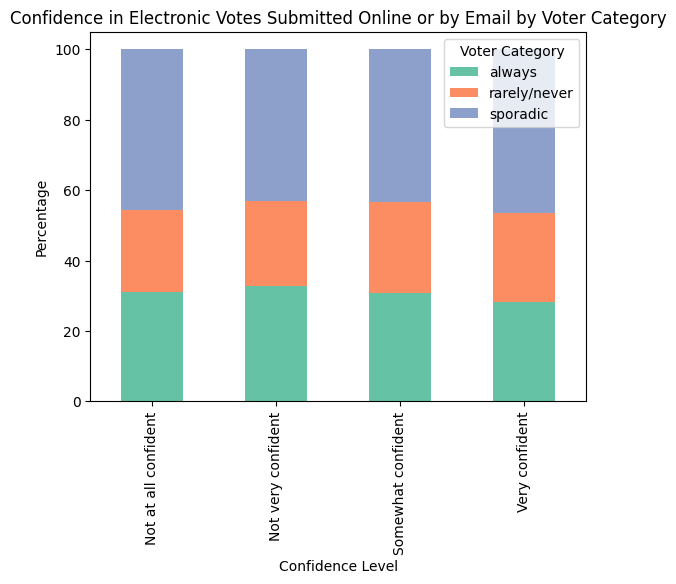

In [90]:
# Visualization for Electronic Votes Submitted Online or by Email
plt.figure(figsize=(10, 6))
cross_tab_Q15_4.drop('All', axis=0).plot(kind='bar', stacked=True, color=sns.color_palette("Set2"))

plt.title('Confidence in Electronic Votes Submitted Online or by Email by Voter Category')
plt.xlabel('Confidence Level')
plt.ylabel('Percentage')
plt.legend(title='Voter Category')
plt.show()


In [91]:
cross_tab_Q15_1

voter_category           always  rarely/never   sporadic
Q15_1                                                   
Not at all confident  16.666667     47.222222  36.111111
Not very confident    24.735729     39.957717  35.306554
Somewhat confident    27.730337     27.191011  45.078652
Very confident        36.087866     18.131102  45.781032
All                   31.217572     24.489796  44.292632

In [92]:
cross_tab_Q15_2

voter_category           always  rarely/never   sporadic
Q15_2                                                   
Not at all confident  23.310811     40.540541  36.148649
Not very confident    20.676692     41.165414  38.157895
Somewhat confident    28.917379     26.970560  44.112061
Very confident        35.701724     17.868449  46.429828
All                   31.209971     24.493682  44.296348

In [93]:
cross_tab_Q15_3

voter_category           always  rarely/never   sporadic
Q15_3                                                   
Not at all confident  26.661060     28.847771  44.491169
Not very confident    28.883291     29.387070  41.729639
Somewhat confident    31.442464     24.527283  44.030254
Very confident        36.129032     17.290323  46.580645
All                   31.188376     24.476734  44.334890

In [94]:
cross_tab_Q15_4

voter_category           always  rarely/never   sporadic
Q15_4                                                   
Not at all confident  31.227437     23.225030  45.547533
Not very confident    32.772622     24.071926  43.155452
Somewhat confident    30.856124     25.743163  43.400713
Very confident        28.129395     25.457103  46.413502
All                   31.199169     24.485205  44.315626

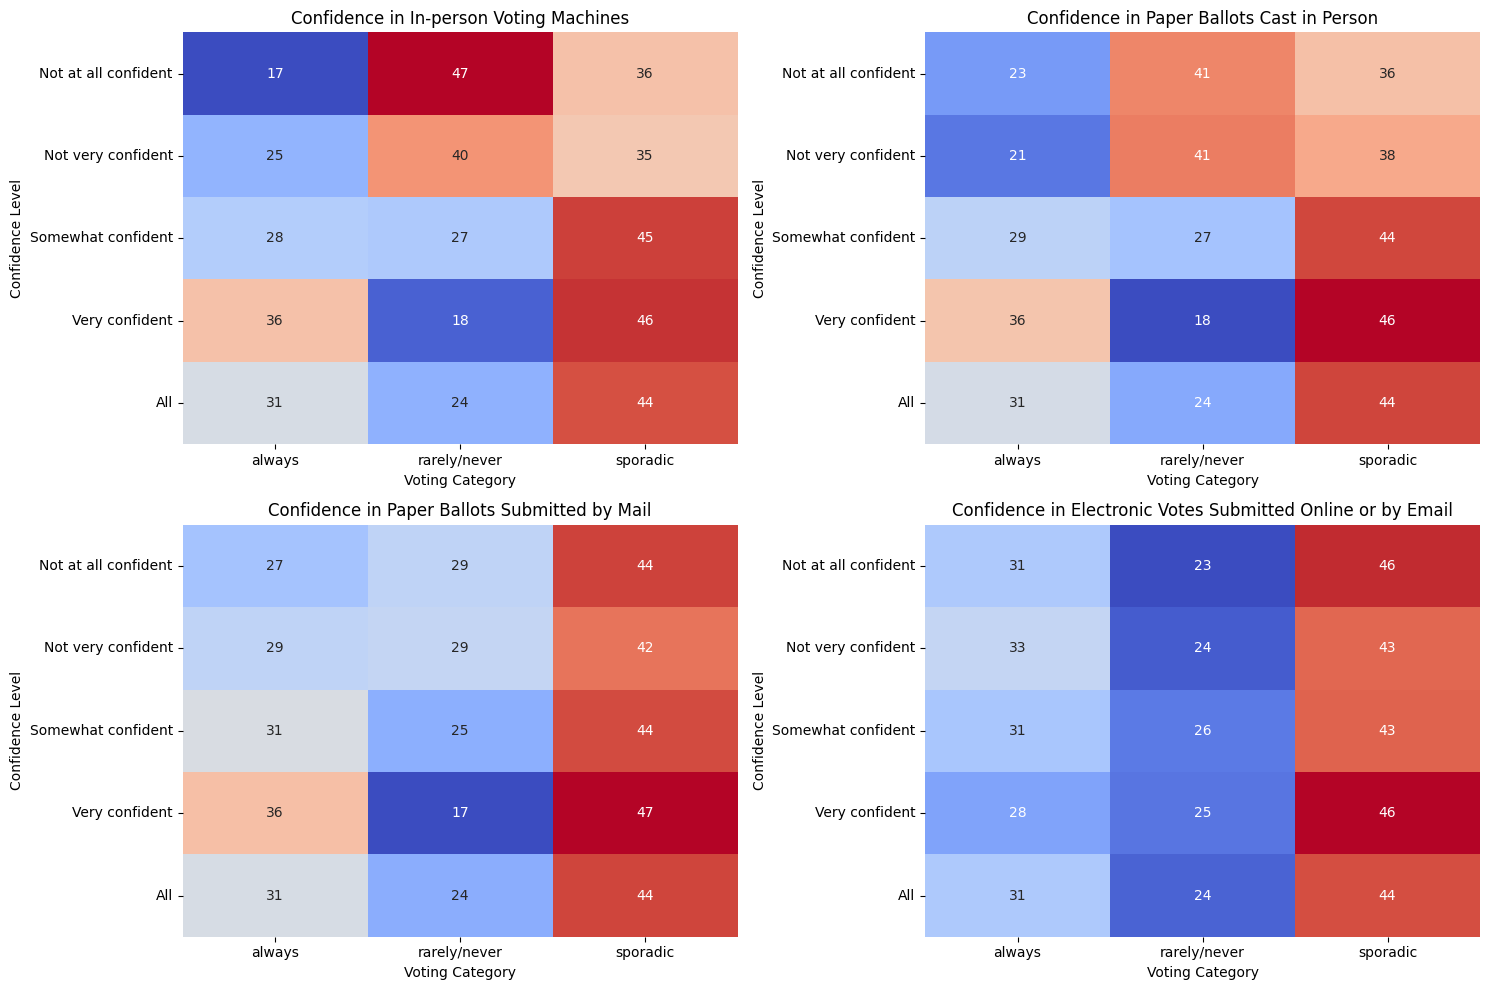

In [95]:
# Visualization for confidence in voting methods
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.heatmap(cross_tab_Q15_1, annot=True, cmap='coolwarm', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Confidence in In-person Voting Machines')
axes[0, 0].set_xlabel('Voting Category')
axes[0, 0].set_ylabel('Confidence Level')

sns.heatmap(cross_tab_Q15_2, annot=True, cmap='coolwarm', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title('Confidence in Paper Ballots Cast in Person')
axes[0, 1].set_xlabel('Voting Category')
axes[0, 1].set_ylabel('Confidence Level')

sns.heatmap(cross_tab_Q15_3, annot=True, cmap='coolwarm', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title('Confidence in Paper Ballots Submitted by Mail')
axes[1, 0].set_xlabel('Voting Category')
axes[1, 0].set_ylabel('Confidence Level')

sns.heatmap(cross_tab_Q15_4, annot=True, cmap='coolwarm', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title('Confidence in Electronic Votes Submitted Online or by Email')
axes[1, 1].set_xlabel('Voting Category')
axes[1, 1].set_ylabel('Confidence Level')

plt.tight_layout()
plt.show()


In [96]:
# Group non-voters by their confidence levels in each voting method
low_confidence_Q15_1 = non_voters[non_voters['Q15_1'].isin(['Not very confident', 'Not at all confident'])]
low_confidence_Q15_2 = non_voters[non_voters['Q15_2'].isin(['Not very confident', 'Not at all confident'])]
low_confidence_Q15_3 = non_voters[non_voters['Q15_3'].isin(['Not very confident', 'Not at all confident'])]
low_confidence_Q15_4 = non_voters[non_voters['Q15_4'].isin(['Not very confident', 'Not at all confident'])]

# Demographic analysis
demographics = ['Education', 'race', 'age_binned']

for demo in demographics:
    print(f"Demographic analysis for low confidence in Q15_1 ({demo}):")
    print(low_confidence_Q15_1[demo].value_counts(normalize=True))
    print("\n")

    print(f"Demographic analysis for low confidence in Q15_2 ({demo}):")
    print(low_confidence_Q15_2[demo].value_counts(normalize=True))
    print("\n")

    print(f"Demographic analysis for low confidence in Q15_3 ({demo}):")
    print(low_confidence_Q15_3[demo].value_counts(normalize=True))
    print("\n")

    print(f"Demographic analysis for low confidence in Q15_4 ({demo}):")
    print(low_confidence_Q15_4[demo].value_counts(normalize=True))
    print("\n")


Demographic analysis for low confidence in Q15_1 (Education):
Education
High school or less    0.375907
College                0.336720
Some college           0.287373
Name: proportion, dtype: float64


Demographic analysis for low confidence in Q15_2 (Education):
Education
High school or less    0.432367
Some college           0.292271
College                0.275362
Name: proportion, dtype: float64


Demographic analysis for low confidence in Q15_3 (Education):
Education
High school or less    0.384874
Some college           0.313025
College                0.302101
Name: proportion, dtype: float64


Demographic analysis for low confidence in Q15_4 (Education):
Education
College                0.376846
High school or less    0.321028
Some college           0.302126
Name: proportion, dtype: float64


Demographic analysis for low confidence in Q15_1 (race):
race
White          0.525399
Black          0.217707
Hispanic       0.179971
Other/Mixed    0.076923
Name: proportion, dtype: float

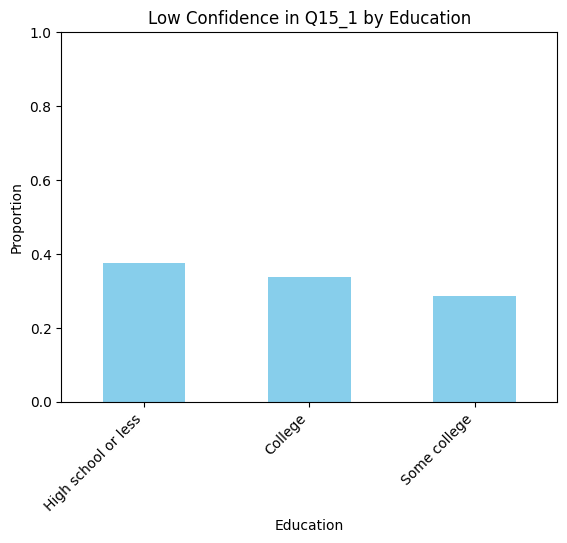

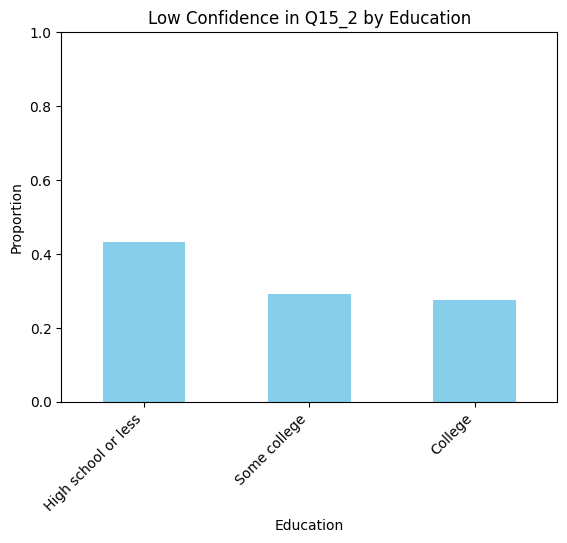

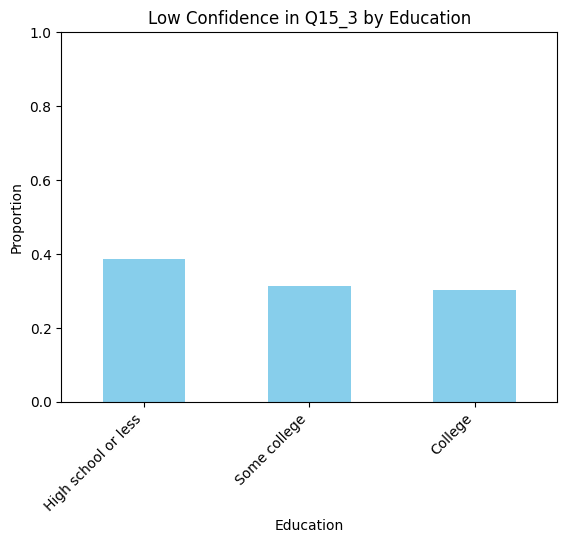

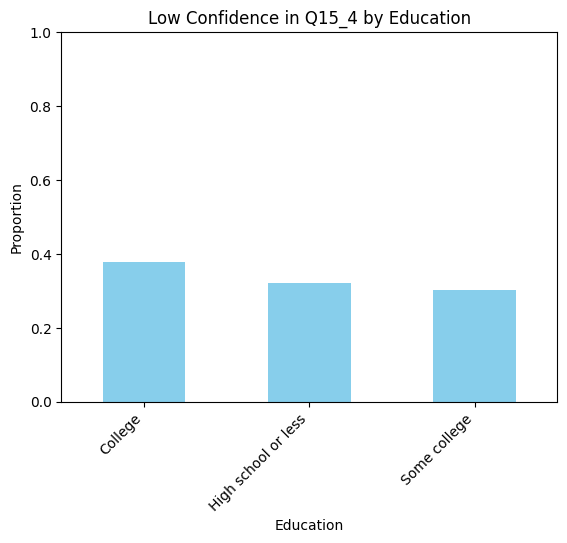

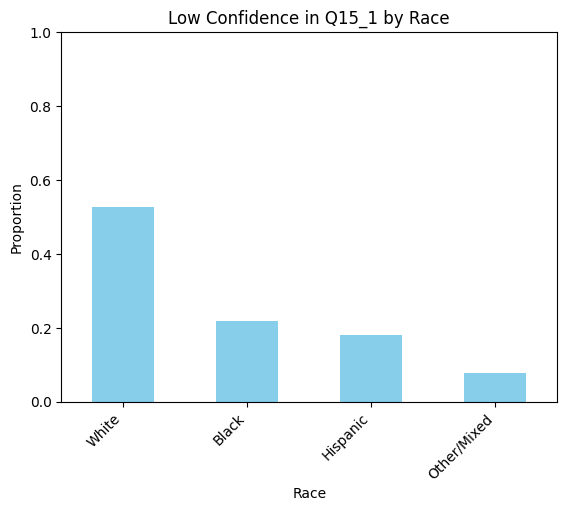

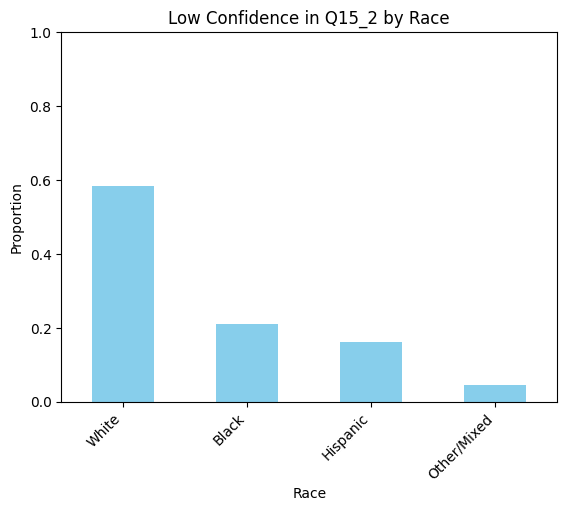

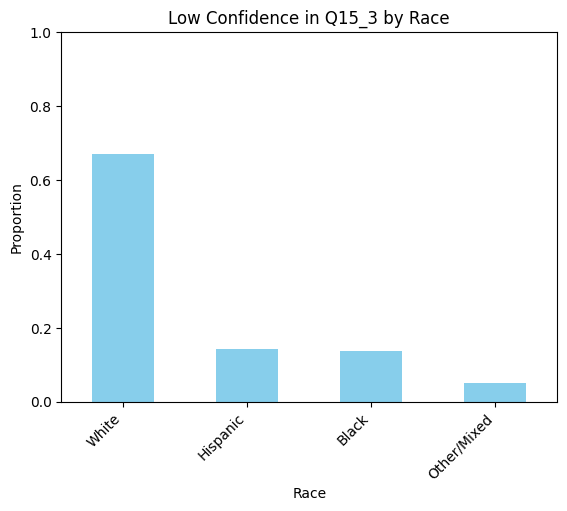

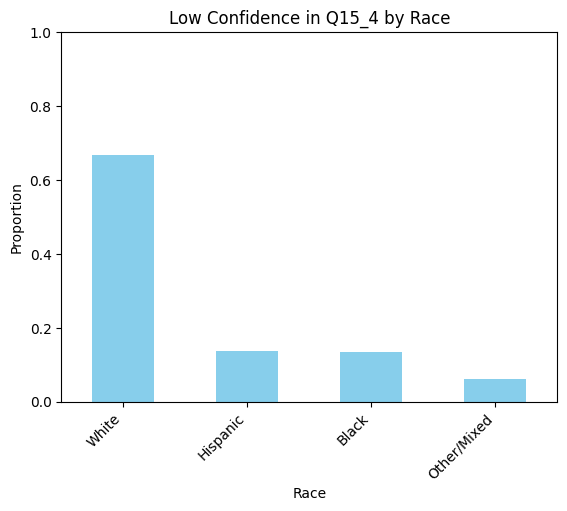

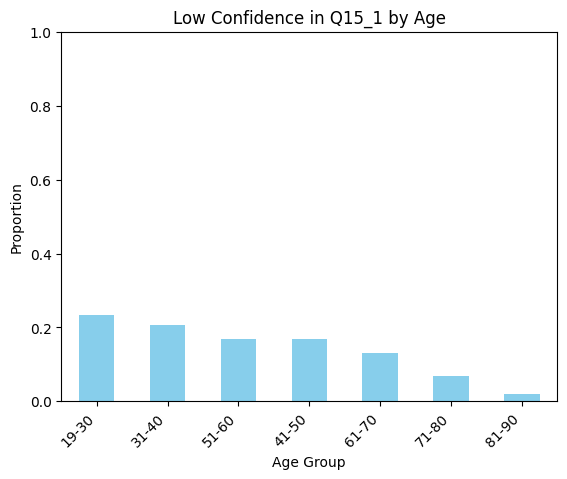

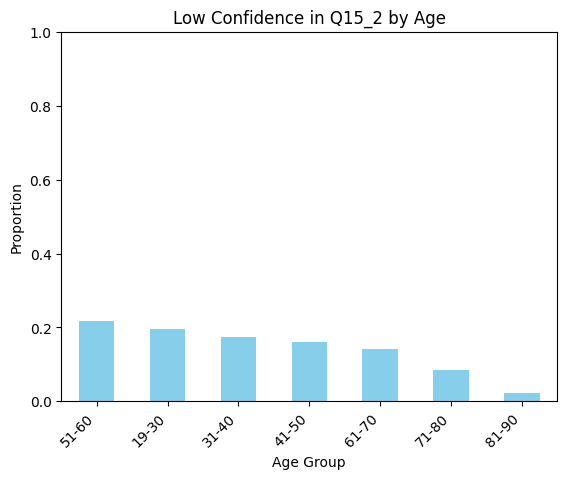

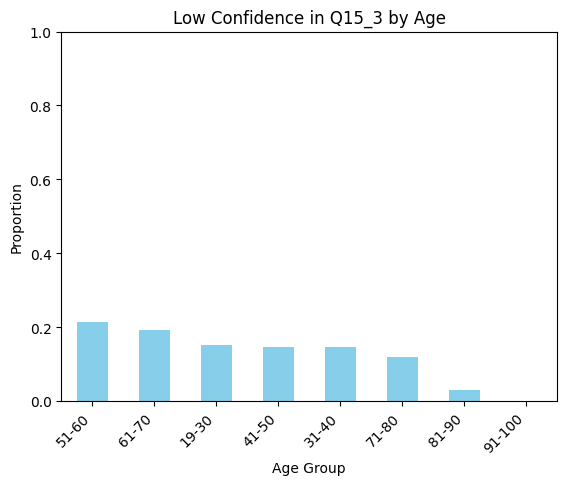

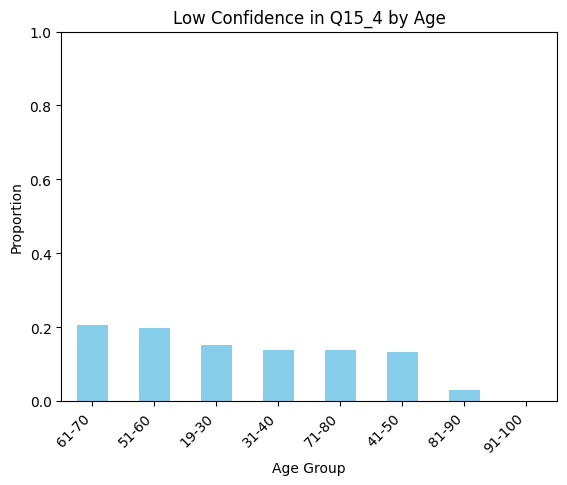

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for each demographic analysis
education_q15_1 = pd.Series([0.375907, 0.336720, 0.287373], index=["High school or less", "College", "Some college"])
education_q15_2 = pd.Series([0.432367, 0.292271, 0.275362], index=["High school or less", "Some college", "College"])
education_q15_3 = pd.Series([0.384874, 0.313025, 0.302101], index=["High school or less", "Some college", "College"])
education_q15_4 = pd.Series([0.376846, 0.321028, 0.302126], index=["College", "High school or less", "Some college"])

race_q15_1 = pd.Series([0.525399, 0.217707, 0.179971, 0.076923], index=["White", "Black", "Hispanic", "Other/Mixed"])
race_q15_2 = pd.Series([0.582126, 0.211353, 0.160628, 0.045894], index=["White", "Black", "Hispanic", "Other/Mixed"])
race_q15_3 = pd.Series([0.669748, 0.142017, 0.136975, 0.051261], index=["White", "Hispanic", "Black", "Other/Mixed"])
race_q15_4 = pd.Series([0.666273, 0.137035, 0.135558, 0.061134], index=["White", "Hispanic", "Black", "Other/Mixed"])

age_q15_1 = pd.Series([0.233672, 0.207547, 0.169811, 0.168360, 0.130624, 0.069666, 0.020319], index=["19-30", "31-40", "51-60", "41-50", "61-70", "71-80", "81-90"])
age_q15_2 = pd.Series([0.217391, 0.195652, 0.175121, 0.161836, 0.141304, 0.085749, 0.022947], index=["51-60", "19-30", "31-40", "41-50", "61-70", "71-80", "81-90"])
age_q15_3 = pd.Series([0.215546, 0.192857, 0.150840, 0.146639, 0.145378, 0.119328, 0.028992, 0.000420], index=["51-60", "61-70", "19-30", "41-50", "31-40", "71-80", "81-90", "91-100"])
age_q15_4 = pd.Series([0.205552, 0.197283, 0.152097, 0.139102, 0.138807, 0.134377, 0.031010, 0.001772], index=["61-70", "51-60", "19-30", "31-40", "71-80", "41-50", "81-90", "91-100"])

# Function to plot a bar chart for the demographic data
def plot_demographic_analysis(data, title, xlabel):
    data.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Proportion')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plotting the charts
plot_demographic_analysis(education_q15_1, 'Low Confidence in Q15_1 by Education', 'Education')
plot_demographic_analysis(education_q15_2, 'Low Confidence in Q15_2 by Education', 'Education')
plot_demographic_analysis(education_q15_3, 'Low Confidence in Q15_3 by Education', 'Education')
plot_demographic_analysis(education_q15_4, 'Low Confidence in Q15_4 by Education', 'Education')

plot_demographic_analysis(race_q15_1, 'Low Confidence in Q15_1 by Race', 'Race')
plot_demographic_analysis(race_q15_2, 'Low Confidence in Q15_2 by Race', 'Race')
plot_demographic_analysis(race_q15_3, 'Low Confidence in Q15_3 by Race', 'Race')
plot_demographic_analysis(race_q15_4, 'Low Confidence in Q15_4 by Race', 'Race')

plot_demographic_analysis(age_q15_1, 'Low Confidence in Q15_1 by Age', 'Age Group')
plot_demographic_analysis(age_q15_2, 'Low Confidence in Q15_2 by Age', 'Age Group')
plot_demographic_analysis(age_q15_3, 'Low Confidence in Q15_3 by Age', 'Age Group')
plot_demographic_analysis(age_q15_4, 'Low Confidence in Q15_4 by Age', 'Age Group')


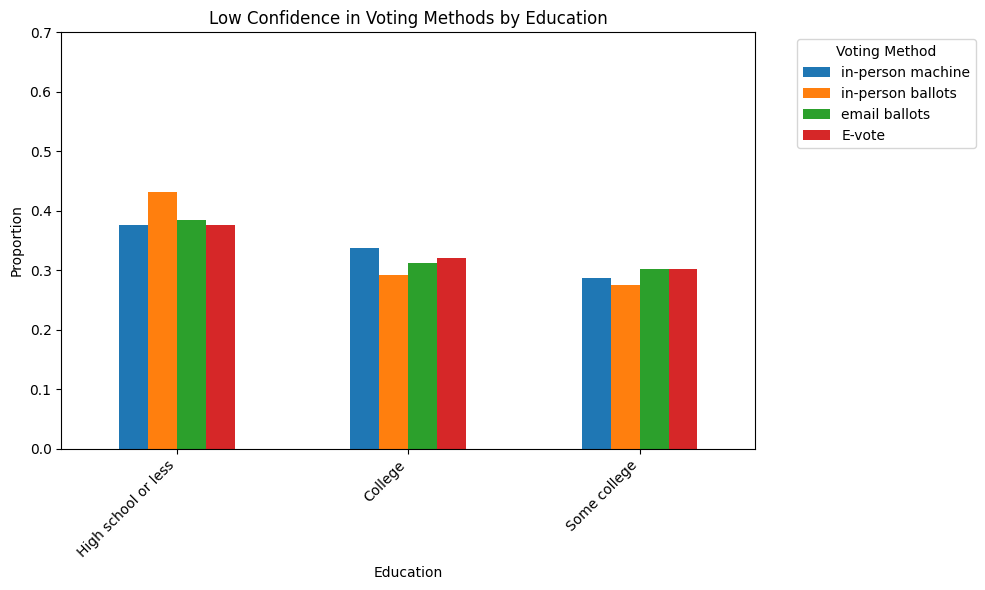

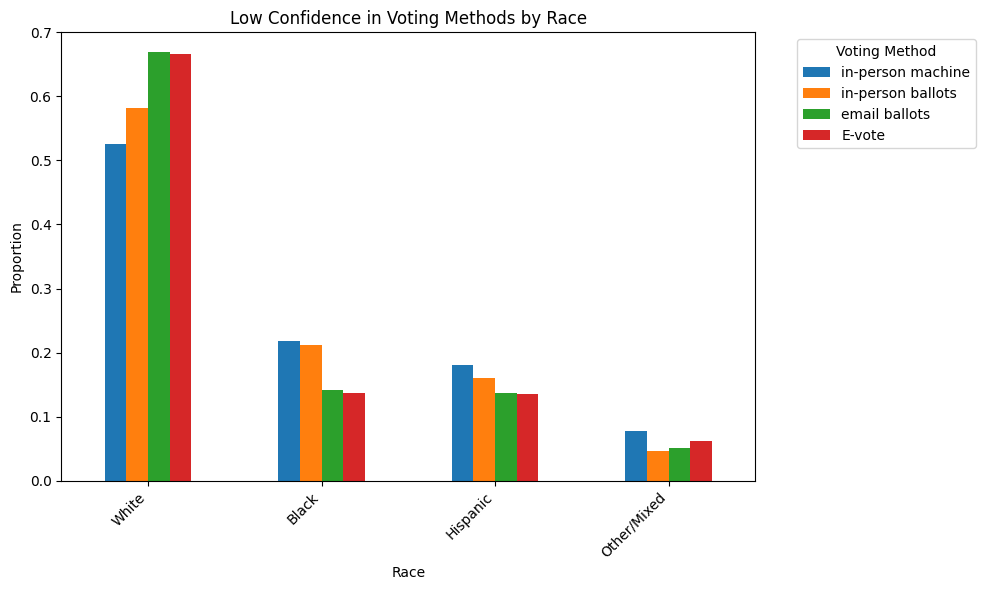

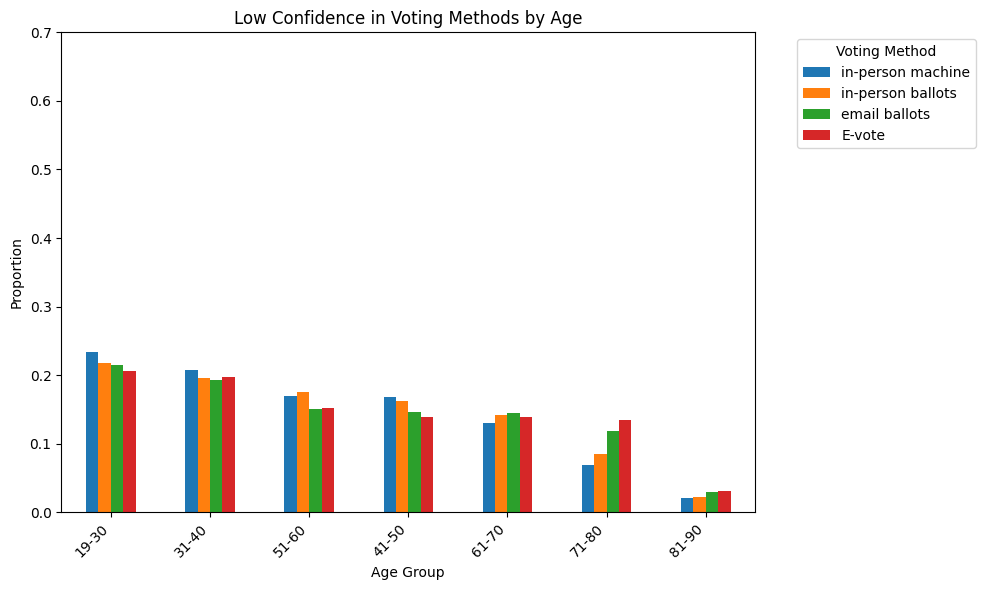

In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data preparation
education_data = pd.DataFrame({
    'in-person machine': [0.375907, 0.336720, 0.287373],
    'in-person ballots': [0.432367, 0.292271, 0.275362],
    'email ballots': [0.384874, 0.313025, 0.302101],
    'E-vote': [0.376846, 0.321028, 0.302126]
}, index=["High school or less", "College", "Some college"])

race_data = pd.DataFrame({
    'in-person machine': [0.525399, 0.217707, 0.179971, 0.076923],
    'in-person ballots': [0.582126, 0.211353, 0.160628, 0.045894],
    'email ballots': [0.669748, 0.142017, 0.136975, 0.051261],
    'E-vote': [0.666273, 0.137035, 0.135558, 0.061134]
}, index=["White", "Black", "Hispanic", "Other/Mixed"])

age_data = pd.DataFrame({
    'in-person machine': [0.233672, 0.207547, 0.169811, 0.168360, 0.130624, 0.069666, 0.020319],
    'in-person ballots': [0.217391, 0.195652, 0.175121, 0.161836, 0.141304, 0.085749, 0.022947],
    'email ballots': [0.215546, 0.192857, 0.150840, 0.146639, 0.145378, 0.119328, 0.02899],
    'E-vote': [0.205552, 0.197283, 0.152097, 0.139102, 0.138807, 0.134377, 0.031010]
}, index=["19-30", "31-40", "51-60", "41-50", "61-70", "71-80", "81-90"])

# Function to plot grouped bar charts
def plot_grouped_bar(data, title, xlabel):
    data.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Proportion')
    plt.ylim(0, 0.7)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Voting Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plotting the charts
plot_grouped_bar(education_data, 'Low Confidence in Voting Methods by Education', 'Education')
plot_grouped_bar(race_data, 'Low Confidence in Voting Methods by Race', 'Race')
plot_grouped_bar(age_data, 'Low Confidence in Voting Methods by Age', 'Age Group')


In [104]:
# Columns corresponding to the elections
election_columns = ['Q25_1', 'Q25_2', 'Q25_3', 'Q25_4', 'Q25_5', 'Q25_6']

# Replace 2 with 0 in the specified columns
df_cleaned[election_columns] = df_cleaned[election_columns].replace({2: 0})

# Calculate the number of 1s (votes) for each election year
voter_turnout = df_cleaned[election_columns].sum()

# Create a DataFrame for plotting
election_years = ['2008', '2009', '2010', '2011', '2012', '2014']
voter_turnout_df = pd.DataFrame({'Year': election_years, 'Votes': voter_turnout.values})

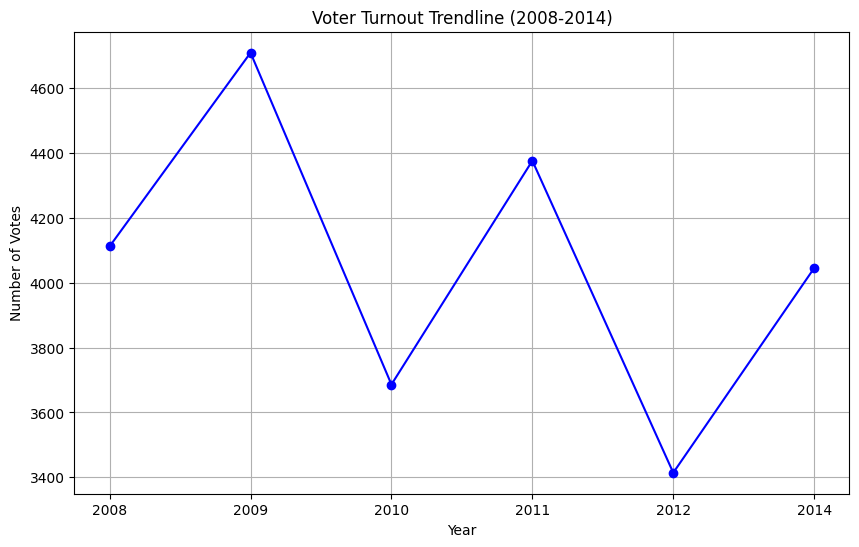

In [105]:
# Plot the trendline
plt.figure(figsize=(10, 6))
plt.plot(voter_turnout_df['Year'], voter_turnout_df['Votes'], marker='o', linestyle='-', color='b')
plt.title('Voter Turnout Trendline (2008-2014)')
plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.grid(True)
plt.show()


In [101]:
# Percentage of different voter category